In [1]:
#Variabilil globali
width = 256
height = 256

In [5]:
from AlexNet import *
from torch.utils.data.dataset import Dataset
from PIL import Image
from os import path
from torchvision import transforms
import numpy as np
import torch
from torch.utils.data import DataLoader

np.random.seed(1234)
torch.random.manual_seed(1234);

class ScenesDataset(Dataset):
    def __init__(self,base_path,txt_list,transform=None):
        #conserviamo il path alla cartella contenente le immagini
        self.base_path=base_path
        #carichiamo la lista dei file
        #sarà una matrice con n righe (numero di immagini) e 2 colonne (path, etichetta)
        self.images = np.loadtxt(txt_list,dtype=str,delimiter=',')
        #print("self.images ha i seguenti elementi:", len(self.images))
        #conserviamo il riferimento alla trasformazione da applicare
        self.transform = transform
    def __getitem__(self, index):
        #print("Get item numero -->", index)
        #recuperiamo il path dell'immagine di indice index e la relativa etichetta
        f,c = self.images[index]
        #carichiamo l'immagine utilizzando PIL e facciamo il resize a 3 canali.
        im = Image.open(path.join(self.base_path, f)).convert("RGB")
        
        #Resize:
        im = im.resize((width,height))
        #se la trasfromazione è definita, applichiamola all'immagine
        if self.transform is not None:
            im = self.transform(im)
        
        
        #convertiamo l'etichetta in un intero
        label = int(c)
        #restituiamo un dizionario contenente immagine etichetta
        print("Mentre creo il tutto, label vale-->", label, ", name vale -->", f)
        return {'image' : im, 'label':label, 'name': f}
    #restituisce il numero di campioni: la lunghezza della lista "images"
    def __len__(self):
        print("Ho invocato len, vale-->", len(self.images))
        return len(self.images)

In [6]:
dataset = ScenesDataset('Dataset','train.txt',transform=transforms.ToTensor())
#for i in range(0, len(dataset)):
    #print(dataset[i]['image'].shape, dataset[i]['label'])



In [7]:
#Normalizziamo i dati:
#dataset = ScenesDataset('8scenes','8scenes/train.txt',transform=transforms.ToTensor())
m = np.zeros(3)
for sample in dataset:
    m+= np.array(sample['image'].sum(1).sum(1)) #accumuliamo la somma dei pixel canale per canale
#dividiamo per il numero di immagini moltiplicato per il numero di pixel
m=m/(len(dataset)*width*height)
#procedura simile per calcolare la deviazione standard
s = np.zeros(3)
for sample in dataset:
    s+= np.array(((sample['image']-torch.Tensor(m).view(3,1,1))**2).sum(1).sum(1))
s=np.sqrt(s/(len(dataset)*width*height))

Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Right.png
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Left.png
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Right.png
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Left.png
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Right.png
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Front.png
Mentre creo il tutto, label vale--> 4 , name 

Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Left.png
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Right.png
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Front.png
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Right.png
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Right.png
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Front.png
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Right.png
Mentre cr

Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Right.png
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Left.png
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Left.png
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Right.png
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Front.png


Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Left.png
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Right.png
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Front.png
Mentre creo il tutto, label vale--> 101 , name

Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Left.png
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Right.png
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Left.png
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Right.png
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Right.png
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_

Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Right.png
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Left.png
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Left.png
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Left.png
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Mentre creo il tutto, label vale--> 19

Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Left.png
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Right.png
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Front.png
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Right.png
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Front.png
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Right.png
Mentre creo i

Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Right.png
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Right.png
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Right.png
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfa

Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Right.png
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Front.png
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Front.png
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Right.png
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Front.png
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Right.png
Mentre creo il tutto, labe

Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Right.png
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Front.png
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Right.png
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Front.png
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Left.png
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voi

In [8]:
print("Medie",m)
print("Dev.Std.",s)

Medie [0.53432863 0.50716533 0.5028028 ]
Dev.Std. [0.35351087 0.32069801 0.2918144 ]


In [9]:
#Per evitare di  ricalcolare nuovamente le medie provare a salvarle qui.
#Medie [0.53426401 0.5071057  0.50278591]
#Dev.Std. [0.35348395 0.32069717 0.29183253]

In [10]:
transformss = transforms.Compose([transforms.ToTensor(), transforms.Normalize(m,s)])

barilla_train = ScenesDataset('Dataset','train.txt',transform=transformss)
barilla_test = ScenesDataset('Dataset','test.txt',transform=transformss)
print()
barilla_train_loader = torch.utils.data.DataLoader(barilla_train, batch_size=1, num_workers=0, shuffle=True)
barilla_test_loader = torch.utils.data.DataLoader(barilla_test, batch_size=1, num_workers=0)



Ho invocato len, vale--> 302
Ho invocato len, vale--> 302


In [11]:
net = AlexNet()
sum([p.numel() for p in net.parameters()])

57626584

In [12]:
from sklearn.metrics import accuracy_score
from torch.optim import SGD
from torch.autograd import Variable
def train_classification(model, train_loader, test_loader, lr=0.01, epochs=20, momentum=0.9):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(),lr, momentum=momentum)
    loaders = {'train':train_loader, 'test':test_loader}
    losses = {'train':[], 'test':[]}
    accuracies = {'train':[], 'test':[]}
    if torch.cuda.is_available():
        model=model.cuda()
    for e in range(epochs):
        #print("Primo ciclo for.")
        for mode in ['train', 'test']:
            #print("Secondo ciclo for.")
            if mode=='train':
                model.train()
            else:
                model.eval()
            epoch_loss = 0
            epoch_acc = 0
            samples = 0
            #print("Mode-->",mode)
            #print("Enumerate-->", loaders[mode])
            for i, batch in enumerate(loaders[mode]):
                #trasformiamo i tensori in variabili
                x=Variable(batch['image'], requires_grad=(mode=='train'))
                y=Variable(batch['label'])
                if torch.cuda.is_available():
                    x, y = x.cuda(), y.cuda()
                    print("Con cuda")
                #else:
                    #print("Senza cuda")
                output = model(x)
                #print(type(output))
                #print(output)
                l = criterion(output,y)
                if mode=='train':
                    l.backward()
                    optimizer.step()
                    optimizer.zero_grad()
                #print("L-->",l.item())
                acc = accuracy_score(y.cpu().data,output.cpu().max(1)[1].data)
                epoch_loss+=l.data.item()*x.shape[0]
                epoch_acc+=acc*x.shape[0]
                samples+=x.shape[0]
                print ("\r[%s] Epoch %d/%d. Iteration %d/%d. Loss: %0.2f. Accuracy: %0.2f\t\t\t\t\t" % \
                (mode, e+1, epochs, i, len(loaders[mode]), epoch_loss/samples, epoch_acc/samples),
                epoch_loss/samples,
                epoch_acc/samples,
                losses[mode].append(epoch_loss))
                accuracies[mode].append(epoch_acc)
            #print("Fine secondo ciclo for")
        print("\r[%s] Epoch %d/%d. Iteration %d/%d. Loss: %0.2f. Accuracy: %0.2f\t\t\t\t\t" % \
        (mode, e+1, epochs, i, len(loaders[mode]), epoch_loss, epoch_acc))

    print("Ho finito.")
    #restituiamo il modello e i vari log
    return model, (losses, accuracies)

# Con nostro dataset

In [13]:
lenet_mnist, lenet_mnist_logs = train_classification(net, epochs=50, train_loader = barilla_train_loader,
                                                     test_loader = barilla_test_loader)

Ho invocato len, vale--> 302
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 0/302. Loss: 5.03. Accuracy: 0.00					 5.02742862701416 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 1/302. Loss: 5.02. Accuracy: 0.00					 5.020767688751221 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 2/302. Loss: 5.02. Accuracy: 0.00					 5.021445274353027 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 3/302. Loss: 5.0

Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 31/302. Loss: 5.03. Accuracy: 0.00					 5.029827922582626 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 32/302. Loss: 5.03. Accuracy: 0.00					 5.029631325692842 0.0 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 33/302. Loss: 5.03. Accuracy: 0.00					 5.031097187715418 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 34/302. Loss: 5.03. Accuracy: 0.00					 5.032476806640625 0.0 None
Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizz

Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 63/302. Loss: 5.05. Accuracy: 0.00					 5.046821817755699 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 64/302. Loss: 5.05. Accuracy: 0.00					 5.047165239774264 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 65/302. Loss: 5.05. Accuracy: 0.00					 5.047604199611779 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 66/302. Loss: 5.05. Accur

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 94/302. Loss: 5.05. Accuracy: 0.00					 5.050954382043136 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 95/302. Loss: 5.05. Accuracy: 0.00					 5.051370268066724 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 96/302. Loss: 5.05. Accuracy: 0.00					 5.050258498830893 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 97/302. Loss: 5.05. Accuracy: 0.00					 5.050823289520887 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution

Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 126/302. Loss: 5.06. Accuracy: 0.00					 5.057991568497785 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 127/302. Loss: 5.06. Accuracy: 0.00					 5.058549769222736 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 128/302. Loss: 5.06. Accuracy: 0.00					 5.059133666430333 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 129/302. Loss: 5.06. Accuracy: 0.00					 5.05974442408

[train] Epoch 1/50. Iteration 157/302. Loss: 5.06. Accuracy: 0.00					 5.063641768467577 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 158/302. Loss: 5.06. Accuracy: 0.00					 5.0632959701730025 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 159/302. Loss: 5.06. Accuracy: 0.00					 5.0637062072753904 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 160/302. Loss: 5.06. Accuracy: 0.00					 5.063554118138663 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con 

Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 189/302. Loss: 5.07. Accuracy: 0.00					 5.067193503128855 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 190/302. Loss: 5.07. Accuracy: 0.00					 5.067048397363792 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 191/302. Loss: 5.07. Accuracy: 0.00					 5.067510741452376 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 192/302

Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 220/302. Loss: 5.07. Accuracy: 0.00					 5.06948989980361 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 221/302. Loss: 5.07. Accuracy: 0.00					 5.06948987213341 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 222/302. Loss: 5.07. Accuracy: 0.00					 5.069513246082939 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 223/302. Loss: 5.07. Accuracy: 0.00					 5.0699194243

[train] Epoch 1/50. Iteration 251/302. Loss: 5.07. Accuracy: 0.00					 5.071558857720996 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 252/302. Loss: 5.07. Accuracy: 0.00					 5.071937214244496 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 253/302. Loss: 5.07. Accuracy: 0.00					 5.071961575605738 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 254/302. Loss: 5.07. Accuracy: 0.00					 5.072061058119232 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Right.png
Con cuda
Ho

[train] Epoch 1/50. Iteration 282/302. Loss: 5.08. Accuracy: 0.00					 5.075155799043474 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 283/302. Loss: 5.08. Accuracy: 0.00					 5.075254247222148 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 284/302. Loss: 5.08. Accuracy: 0.00					 5.0753191345616395 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1/50. Iteration 285/302. Loss: 5.08. Accuracy: 0.00					 5.07540604117867 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Con cud

Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinafardello4Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 13/152. Loss: 5.03. Accuracy: 0.00					 5.032206637518747 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 14/152. Loss: 5.03. Accuracy: 0.00					 5.031030941009521 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 15/152. Loss: 5.03. Accuracy: 0.00					 5.029649406671524 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 16/152. Loss: 5.03. Accuracy: 0.00				

Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 44/152. Loss: 5.03. Accuracy: 0.00					 5.028146574232314 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 45/152. Loss: 5.03. Accuracy: 0.00					 5.027841785679692 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.00					 5.027681868127051 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.00	

Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 75/152. Loss: 5.03. Accuracy: 0.00					 5.026186635619716 0.0 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 76/152. Loss: 5.03. Accuracy: 0.00					 5.026345358266459 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 77/152. Loss: 5.03. Accuracy: 0.00					 5.026320873162685 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 78/152. Loss: 5.03. Accuracy: 0.00					 5.026007688498195 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox

Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.00					 5.023978768108047 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.00					 5.023821084587662 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 108/152. Loss: 5.02. Accuracy: 0.00					 5.023807871232339 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50.

Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 138/152. Loss: 5.03. Accuracy: 0.00					 5.025071936545612 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 139/152. Loss: 5.02. Accuracy: 0.00					 5.024894435065133 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 140/152. Loss: 5.02. Accuracy: 0.00					 5.024856854837837 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1/50. Iteration 141/152. Loss: 5.02. Accuracy: 0.00					 5.0247051547950425 0.0 None
Mentre creo 

Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 17/302. Loss: 5.02. Accuracy: 0.00					 5.024020009570652 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 18/302. Loss: 5.02. Accuracy: 0.00					 5.023068628813091 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 19/302. Loss: 5.02. Accuracy: 0.00					 5.023987364768982 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 20/302. Loss: 

Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 48/302. Loss: 5.03. Accuracy: 0.00					 5.027296601509561 0.0 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 49/302. Loss: 5.03. Accuracy: 0.00					 5.027525386810303 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 50/302. Loss: 5.03. Accuracy: 0.00					 5.027579831142051 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 51/302. Loss: 5.03. Accuracy: 0.00					 5.028636143757747 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_

Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 80/302. Loss: 5.03. Accuracy: 0.00					 5.03243523468206 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 81/302. Loss: 5.03. Accuracy: 0.00					 5.032816572887142 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 82/302. Loss: 5.03. Accuracy: 0.00					 5.033611498683332 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 83/302. Loss: 5.03. Accura

Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 111/302. Loss: 5.04. Accuracy: 0.00					 5.037153618676322 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 112/302. Loss: 5.04. Accuracy: 0.00					 5.036966745832325 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 113/302. Loss: 5.04. Accuracy: 0.00					 5.036515231718097 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 114/302. Loss: 5.04. Accuracy:

[train] Epoch 2/50. Iteration 142/302. Loss: 5.04. Accuracy: 0.00					 5.044883838066688 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 143/302. Loss: 5.05. Accuracy: 0.00					 5.045297102795707 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 144/302. Loss: 5.05. Accuracy: 0.00					 5.045114342919711 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 145/302. Loss: 5.05. Accuracy: 0.00					 5.045775870754294 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Front.png
Con cuda
Ho 

Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.00					 5.04994902747018 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 175/302. Loss: 5.05. Accuracy: 0.00					 5.049928789789027 0.0 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 176/302. Loss: 5.05. Accuracy: 0.00					 5.049886751983125 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 177/302. Loss: 5.05. Accuracy: 0.00					 5.04981310983

Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 205/302. Loss: 5.05. Accuracy: 0.00					 5.0539110331859405 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 206/302. Loss: 5.05. Accuracy: 0.00					 5.053935488640974 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 207/302. Loss: 5.05. Accuracy: 0.00					 5.0539528750456295 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 208/302. 

Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 236/302. Loss: 5.06. Accuracy: 0.00					 5.058911546876159 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 237/302. Loss: 5.06. Accuracy: 0.00					 5.058993742245586 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 238/302. Loss: 5.06. Accuracy: 0.00					 5.059467888277445 0.0 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 239/302. Loss: 5.06. Accuracy: 0.00					 5.059982419013977 0.

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 268/302. Loss: 5.06. Accuracy: 0.00					 5.06494856412526 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 269/302. Loss: 5.07. Accuracy: 0.00					 5.065248321603845 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 270/302. Loss: 5.07. Accuracy: 0.00					 5.065380599665906 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 271/302. Loss: 5.07. Accuracy:

[train] Epoch 2/50. Iteration 299/302. Loss: 5.07. Accuracy: 0.00					 5.069820909500122 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 300/302. Loss: 5.07. Accuracy: 0.00					 5.069975021273591 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 2/50. Iteration 301/302. Loss: 5.07. Accuracy: 0.00					 5.070106556873448 0.0 None
Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 0/152. Loss: 5.02. Accuracy: 0.00					 5.017131805419922 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png


Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 28/152. Loss: 5.03. Accuracy: 0.03					 5.028117097657303 0.034482758620689655 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 29/152. Loss: 5.03. Accuracy: 0.03					 5.027557913462321 0.03333333333333333 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 30/152. Loss: 5.03. Accuracy: 0.03					 5.028031872164819 0.03225806451612903 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 31/152. Loss: 5.03. Accuracy: 0.03					 5.027957737445831 0.03125 None
Mentre creo il tutt

Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 58/152. Loss: 5.03. Accuracy: 0.02					 5.027818429268013 0.01694915254237288 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 59/152. Loss: 5.03. Accuracy: 0.02					 5.02779811223348 0.016666666666666666 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 60/152. Loss: 5.03. Accuracy: 0.02					 5.0276923883156694 0.01639344262295082 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 1

[test] Epoch 2/50. Iteration 87/152. Loss: 5.03. Accuracy: 0.01					 5.026105907830325 0.011363636363636364 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 88/152. Loss: 5.03. Accuracy: 0.01					 5.026072411054976 0.011235955056179775 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 89/152. Loss: 5.03. Accuracy: 0.01					 5.026106929779052 0.011111111111111112 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 90/152. Loss: 5.03. Accuracy: 0.01					 5.026197836949275 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , nam

[test] Epoch 2/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.024350113338894 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.024401115158857 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.01					 5.024373086560674 0.008403361344537815 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.024396534760793 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla

Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 147/152. Loss: 5.02. Accuracy: 0.01					 5.024423715230581 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 148/152. Loss: 5.02. Accuracy: 0.01					 5.024383068084717 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 149/152. Loss: 5.02. Accuracy: 0.01					 5.024338862101237 0.006666666666666667 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2/50. Iteration 150/152. Loss: 5

[train] Epoch 3/50. Iteration 25/302. Loss: 5.03. Accuracy: 0.00					 5.026884152339055 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 26/302. Loss: 5.02. Accuracy: 0.00					 5.024583375012433 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 27/302. Loss: 5.02. Accuracy: 0.00					 5.024999414171491 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 28/302. Loss: 5.02. Accuracy: 0.00					 5.0214794750871325 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, val

Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 57/302. Loss: 5.03. Accuracy: 0.00					 5.028867368040414 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 58/302. Loss: 5.03. Accuracy: 0.00					 5.0292976023787155 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 59/302. Loss: 5.03. Accuracy: 0.00					 5.0297832727432255 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 60/302. Loss: 

[train] Epoch 3/50. Iteration 88/302. Loss: 5.04. Accuracy: 0.00					 5.036187707708123 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 89/302. Loss: 5.04. Accuracy: 0.00					 5.036628972159492 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 90/302. Loss: 5.04. Accuracy: 0.00					 5.036771564693241 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 91/302. Loss: 5.04. Accuracy: 0.00					 5.037290464276853 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] E

[train] Epoch 3/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.042969254422779 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.042839069835475 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 122/302. Loss: 5.04. Accuracy: 0.00					 5.043326656992843 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 123/302. Loss: 5.04. Accuracy: 0.00					 5.0436891740368255 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegr

[train] Epoch 3/50. Iteration 151/302. Loss: 5.05. Accuracy: 0.00					 5.045187818376641 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 152/302. Loss: 5.04. Accuracy: 0.00					 5.044961692461001 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 153/302. Loss: 5.04. Accuracy: 0.00					 5.044792825525457 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 154/302. Loss: 5.04. Accuracy: 0.00					 5.044648739599412 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_

Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.049106473508089 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 184/302. Loss: 5.05. Accuracy: 0.00					 5.049021635828791 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 185/302. Loss: 5.05. Accuracy: 0.00					 5.049525819798951 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 186/302. Loss: 5.05. Accuracy: 0.0

Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 214/302. Loss: 5.05. Accuracy: 0.00					 5.0541680535604785 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 215/302. Loss: 5.05. Accuracy: 0.00					 5.054174853695764 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 216/302. Loss: 5.05. Accuracy: 0.00					 5.054189413923273 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 

Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.05938600330818 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.059870264308173 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 247/302. Loss: 5.06. Accuracy: 0.00					 5.060333098134687 0.0 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00

Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.063995762422197 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 277/302. Loss: 5.06. Accuracy: 0.00					 5.064066734245356 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 278/302. Loss: 5.06. Accuracy: 0.00					 5.0641640847729095 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 3/50. Iteration 279/302. Loss: 5.06. Accuracy: 0.00					 5.064229275499072 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidile

Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 6/152. Loss: 5.02. Accuracy: 0.00					 5.018478121076312 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 7/152. Loss: 5.02. Accuracy: 0.00					 5.019474685192108 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 8/152. Loss: 5.02. Accuracy: 0.11					 5.01659811867608 0.1111111111111111 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 9/152. Loss: 5.02. Accuracy: 0.10					 5.017312669754029 0.1 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Left.png
Con cuda
Ho invocato len, v

[test] Epoch 3/50. Iteration 36/152. Loss: 5.03. Accuracy: 0.03					 5.032759498905492 0.02702702702702703 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 37/152. Loss: 5.03. Accuracy: 0.03					 5.032235396535773 0.02631578947368421 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 38/152. Loss: 5.03. Accuracy: 0.03					 5.031386888944185 0.02564102564102564 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 39/152. Loss: 5.03. Accuracy: 0.03					 5.030713045597077 0.025 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla

Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.01					 5.02898889513158 0.014925373134328358 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 67/152. Loss: 5.03. Accuracy: 0.01					 5.028821412254782 0.014705882352941176 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.01					 5.028450136599333 0.014492753623188406 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 95/152. Loss: 5.03. Accuracy: 0.01					 5.026006941994031 0.010416666666666666 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 96/152. Loss: 5.03. Accuracy: 0.01					 5.0257234376730375 0.010309278350515464 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 97/152. Loss: 5.03. Accuracy: 0.01					 5.025489515187789 0.01020408163265306 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 98/152. Loss: 5.03. Accuracy: 0.01					 5.025175

[test] Epoch 3/50. Iteration 124/152. Loss: 5.02. Accuracy: 0.01					 5.023593074798584 0.008 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 125/152. Loss: 5.02. Accuracy: 0.01					 5.023621740795317 0.007936507936507936 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 126/152. Loss: 5.02. Accuracy: 0.01					 5.02355616111455 0.007874015748031496 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3/50. Iteration 127/152. Loss: 5.02. Accuracy: 0.01					 5.023548908531666 0.0078125 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Amb

[train] Epoch 4/50. Iteration 2/302. Loss: 5.02. Accuracy: 0.00					 5.02225383122762 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 3/302. Loss: 5.03. Accuracy: 0.00					 5.025204062461853 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 4/302. Loss: 5.03. Accuracy: 0.00					 5.032073879241944 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 5/302. Loss: 5.03. Accuracy: 0.00					 5.0325954755147295 0.0 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Right.png
Con cuda
Ho invocat

Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 34/302. Loss: 5.02. Accuracy: 0.00					 5.024337114606585 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 35/302. Loss: 5.02. Accuracy: 0.00					 5.024362431632148 0.0 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 36/302. Loss: 5.02. Accuracy: 0.00					 5.0232003315075024 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 37/302. Loss: 5.02. Accurac

Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 65/302. Loss: 5.03. Accuracy: 0.00					 5.0285906285950634 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 66/302. Loss: 5.03. Accuracy: 0.00					 5.028875820672334 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 67/302. Loss: 5.03. Accuracy: 0.00					 5.029574934174033 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 68/302. Loss: 5.03. Accuracy: 0.00					 5.030187012492746 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccoli

Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 97/302. Loss: 5.04. Accuracy: 0.00					 5.037101132529123 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 98/302. Loss: 5.04. Accuracy: 0.00					 5.037408602358115 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 99/302. Loss: 5.04. Accuracy: 0.00					 5.037053914070129 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 100/302. Loss: 5.04. Accuracy: 0.00					 5.037560274105261 0.0 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemol

Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 129/302. Loss: 5.04. Accuracy: 0.00					 5.043588572282058 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 130/302. Loss: 5.04. Accuracy: 0.00					 5.043237071000893 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 131/302. Loss: 5.04. Accuracy: 0.00					 5.043720751097708 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 132/302. Loss: 5.04. Accuracy: 0.00					 5.043491922

[train] Epoch 4/50. Iteration 160/302. Loss: 5.05. Accuracy: 0.00					 5.048330330700608 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 161/302. Loss: 5.05. Accuracy: 0.00					 5.048798278526023 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 162/302. Loss: 5.05. Accuracy: 0.00					 5.048640040532211 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 163/302. Loss: 5.05. Accuracy: 0.00					 5.0484103458683665 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Right.png
Con cuda
Ho invocato len

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 192/302. Loss: 5.05. Accuracy: 0.00					 5.052759632545432 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 193/302. Loss: 5.05. Accuracy: 0.00					 5.053171642047843 0.0 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 194/302. Loss: 5.05. Accuracy: 0.00					 5.053055244837052 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 195/302. Loss: 5.05. Accuracy: 0.00					 5.052959646497454 0.0 N

[train] Epoch 4/50. Iteration 223/302. Loss: 5.06. Accuracy: 0.00					 5.0561633088759015 0.0 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 224/302. Loss: 5.06. Accuracy: 0.00					 5.057487216525607 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 225/302. Loss: 5.06. Accuracy: 0.00					 5.057579293715215 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 226/302. Loss: 5.06. Accuracy: 0.00					 5.05768971296134 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastasp

[train] Epoch 4/50. Iteration 254/302. Loss: 5.06. Accuracy: 0.00					 5.061992701362161 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 255/302. Loss: 5.06. Accuracy: 0.00					 5.062461430206895 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 256/302. Loss: 5.06. Accuracy: 0.00					 5.0625600221092135 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 257/302. Loss: 5.06. Accuracy: 0.00					 5.062690930773122 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato 

[train] Epoch 4/50. Iteration 285/302. Loss: 5.07. Accuracy: 0.00					 5.066240155613506 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 286/302. Loss: 5.07. Accuracy: 0.00					 5.0663586377266805 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 287/302. Loss: 5.07. Accuracy: 0.00					 5.066500734951761 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 4/50. Iteration 288/302. Loss: 5.07. Accuracy: 0.00					 5.0666396972629855 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Left.png
Con cuda
Ho in

[test] Epoch 4/50. Iteration 15/152. Loss: 5.03. Accuracy: 0.00					 5.029356449842453 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 16/152. Loss: 5.03. Accuracy: 0.00					 5.028973915997674 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 17/152. Loss: 5.03. Accuracy: 0.00					 5.02750481499566 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 18/152. Loss: 5.03. Accuracy: 0.00					 5.0308735998053296 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Left.png
Con cuda
Ho invocato 

[test] Epoch 4/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.00					 5.0250496559954705 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.00					 5.025126338005066 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 48/152. Loss: 5.02. Accuracy: 0.00					 5.024945473184391 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 49/152. Loss: 5.02. Accuracy: 0.00					 5.024559507369995 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Left.png
Con cuda
H

Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 78/152. Loss: 5.02. Accuracy: 0.00					 5.0236879240108445 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 79/152. Loss: 5.02. Accuracy: 0.00					 5.024306309223175 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 80/152. Loss: 5.02. Accuracy: 0.00					 5.024336161436858 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 81/152. Loss: 5.02. Accur

Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 108/152. Loss: 5.02. Accuracy: 0.01					 5.022591761492808 0.009174311926605505 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 109/152. Loss: 5.02. Accuracy: 0.01					 5.022544266960837 0.00909090909090909 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 110/152. Loss: 5.02. Accuracy: 0.01					 5.022613637082212 0.009009009009009009 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Left.png
Con cuda
Ho invocato len, vale--> 15

Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 138/152. Loss: 5.03. Accuracy: 0.01					 5.025140999032439 0.007194244604316547 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 139/152. Loss: 5.03. Accuracy: 0.01					 5.025076774188451 0.007142857142857143 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 140/152. Loss: 5.02. Accuracy: 0.01					 5.024999834966998 0.0070921985815602835 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 4/50. Iteration 141/152. Loss: 5.02. Accuracy

[train] Epoch 5/50. Iteration 16/302. Loss: 5.02. Accuracy: 0.00					 5.018099167767693 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 17/302. Loss: 5.02. Accuracy: 0.00					 5.018470923105876 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 18/302. Loss: 5.02. Accuracy: 0.00					 5.019556271402459 0.0 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 19/302. Loss: 5.02. Accuracy: 0.00					 5.019650936126709 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cu

Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 48/302. Loss: 5.02. Accuracy: 0.00					 5.018174998614253 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 49/302. Loss: 5.02. Accuracy: 0.00					 5.01903190612793 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 50/302. Loss: 5.02. Accuracy: 0.00					 5.019265100067737 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 51/302. Loss: 5.02. Accur

Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 79/302. Loss: 5.03. Accuracy: 0.00					 5.02757083773613 0.0 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 80/302. Loss: 5.03. Accuracy: 0.00					 5.027944717878177 0.0 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 81/302. Loss: 5.03. Accuracy: 0.00					 5.028259736735646 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 82/302. Loss: 5.03. Accuracy: 0.00					 5.02

[train] Epoch 5/50. Iteration 110/302. Loss: 5.04. Accuracy: 0.00					 5.036547858435829 0.0 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 111/302. Loss: 5.04. Accuracy: 0.00					 5.036912543433053 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 112/302. Loss: 5.04. Accuracy: 0.00					 5.037429028907709 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 113/302. Loss: 5.04. Accuracy: 0.00					 5.03800342375772 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda

Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 142/302. Loss: 5.04. Accuracy: 0.00					 5.043847410828917 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 143/302. Loss: 5.04. Accuracy: 0.00					 5.043711549705929 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 144/302. Loss: 5.04. Accuracy: 0.00					 5.044204873052137 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 145/302. Loss: 5.0

Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 173/302. Loss: 5.05. Accuracy: 0.00					 5.049592448377061 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.00					 5.0500768906729565 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 175/302. Loss: 5.05. Accuracy: 0.00					 5.050013040954417 0.0 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 176/302. Loss: 5.05. Accuracy: 0

Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 204/302. Loss: 5.06. Accuracy: 0.00					 5.055378313762386 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 205/302. Loss: 5.06. Accuracy: 0.00					 5.055402677036026 0.0 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 206/302. Loss: 5.06. Accuracy: 0.00					 5.055901672529138 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 207/302. Loss: 5.06. Accuracy: 0.00					 5.055945245119242 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fu

Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 236/302. Loss: 5.06. Accuracy: 0.00					 5.0605101706106455 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 237/302. Loss: 5.06. Accuracy: 0.00					 5.060561095967012 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 238/302. Loss: 5.06. Accuracy: 0.00					 5.060574942552893 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 239/302. Loss: 5

[train] Epoch 5/50. Iteration 267/302. Loss: 5.06. Accuracy: 0.00					 5.064293450383998 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 268/302. Loss: 5.06. Accuracy: 0.00					 5.064378793354814 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 269/302. Loss: 5.06. Accuracy: 0.00					 5.064520664568301 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 270/302. Loss: 5.06. Accuracy: 0.00					 5.064628389928614 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_R

Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 299/302. Loss: 5.07. Accuracy: 0.00					 5.067918976147969 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 300/302. Loss: 5.07. Accuracy: 0.00					 5.068095619100273 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 5/50. Iteration 301/302. Loss: 5.07. Accuracy: 0.00					 5.068200446122529 0.0 None
Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. It

Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 29/152. Loss: 5.03. Accuracy: 0.00					 5.030883169174194 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 30/152. Loss: 5.03. Accuracy: 0.00					 5.031252599531604 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 31/152. Loss: 5.03. Accuracy: 0.00					 5.030751004815102 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iter

Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 59/152. Loss: 5.03. Accuracy: 0.02					 5.025162156422933 0.016666666666666666 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 60/152. Loss: 5.03. Accuracy: 0.02					 5.025112965067879 0.01639344262295082 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 61/152. Loss: 5.03. Accuracy: 0.02					 5.025131364022532 0.016129032258064516 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Left.png
Con cuda
Ho invocato len, vale--> 15

[test] Epoch 5/50. Iteration 88/152. Loss: 5.02. Accuracy: 0.01					 5.023178631000304 0.011235955056179775 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 89/152. Loss: 5.02. Accuracy: 0.01					 5.023137696584066 0.011111111111111112 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 90/152. Loss: 5.02. Accuracy: 0.01					 5.024023213229337 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 91/152. Loss: 5.02. Accuracy: 0.01					 5.023805239926213 0.010869565217391304 None
Mentre creo il tutto, label vale--> 92

[test] Epoch 5/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.024261434199446 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.01					 5.024174726309896 0.008403361344537815 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.0241248647371926 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 120/152. Loss: 5.02. Accuracy: 0.01					 5.024226196541274 0.008264462809917356 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi

Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 148/152. Loss: 5.02. Accuracy: 0.01					 5.024722899366545 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 149/152. Loss: 5.02. Accuracy: 0.01					 5.024728056589763 0.006666666666666667 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 150/152. Loss: 5.02. Accuracy: 0.01					 5.024556330497691 0.006622516556291391 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 5/50. Iteration 151/152. Loss: 5.02. Ac

Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 26/302. Loss: 5.02. Accuracy: 0.04					 5.023058926617658 0.037037037037037035 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 27/302. Loss: 5.02. Accuracy: 0.04					 5.0217370476041525 0.03571428571428571 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 28/302. Loss: 5.02. Accuracy: 0.03					 5.022880406215273 0.034482758620689655 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 29/302. Loss

[train] Epoch 6/50. Iteration 55/302. Loss: 5.03. Accuracy: 0.02					 5.030992380210331 0.017857142857142856 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 56/302. Loss: 5.03. Accuracy: 0.02					 5.029547900484319 0.017543859649122806 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 57/302. Loss: 5.03. Accuracy: 0.02					 5.027856226625113 0.017241379310344827 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 58/302. Loss: 5.03. Accuracy: 0.02					 5.028263892157603 0.01694915254237288 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_

Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 85/302. Loss: 5.03. Accuracy: 0.01					 5.030681305153426 0.011627906976744186 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 86/302. Loss: 5.03. Accuracy: 0.01					 5.030533237018805 0.011494252873563218 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 87/302. Loss: 5.03. Accuracy: 0.01					 5.029985400763425 0.011363636363636364 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 302

[train] Epoch 6/50. Iteration 114/302. Loss: 5.04. Accuracy: 0.01					 5.036645939039148 0.008695652173913044 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 115/302. Loss: 5.04. Accuracy: 0.01					 5.036206820915485 0.008620689655172414 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 116/302. Loss: 5.04. Accuracy: 0.01					 5.036621774363722 0.008547008547008548 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 117/302. Loss: 5.04. Accuracy: 0.01					 5.037161119913651 0.00847457627118644 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolut

Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 144/302. Loss: 5.05. Accuracy: 0.01					 5.04627277111185 0.006896551724137931 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 145/302. Loss: 5.05. Accuracy: 0.01					 5.045948410687381 0.00684931506849315 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 146/302. Loss: 5.05. Accuracy: 0.01					 5.0458623341151645 0.006802721088435374 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 147/302. Loss: 5.05. Accuracy: 0.01					 5.046444602914758 0.006756756756756757 None
Mentre creo il tutto, label vale--> 11 , name 

Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.01					 5.05145416532244 0.005714285714285714 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 175/302. Loss: 5.05. Accuracy: 0.01					 5.051255231553858 0.005681818181818182 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 176/302. Loss: 5.05. Accuracy: 0.01					 5.051752082372116 0.005649717514124294 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoc

[train] Epoch 6/50. Iteration 203/302. Loss: 5.06. Accuracy: 0.00					 5.0556480253444 0.004901960784313725 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 204/302. Loss: 5.06. Accuracy: 0.00					 5.055578517913818 0.004878048780487805 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 205/302. Loss: 5.06. Accuracy: 0.00					 5.055511680621545 0.0048543689320388345 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 206/302. Loss: 5.06. Accuracy: 0.00					 5.0553675066445765 0.004830917874396135 None
Mentre creo il tutto, label vale--> 74 , nam

Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.059200767777924 0.004273504273504274 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 234/302. Loss: 5.06. Accuracy: 0.00					 5.059233929248566 0.00425531914893617 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 235/302. Loss: 5.06. Accuracy: 0.00					 5.059288711871131 0.00423728813559322 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Ep

[train] Epoch 6/50. Iteration 262/302. Loss: 5.06. Accuracy: 0.00					 5.0624381888502 0.0038022813688212928 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.062542808778359 0.003787878787878788 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.06256278775773 0.0037735849056603774 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 265/302. Loss: 5.06. Accuracy: 0.00					 5.062665446360309 0.0037593984962406013 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mea

Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 292/302. Loss: 5.07. Accuracy: 0.00					 5.0663164011854365 0.0034129692832764505 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 293/302. Loss: 5.07. Accuracy: 0.00					 5.066428839754896 0.003401360544217687 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteration 294/302. Loss: 5.07. Accuracy: 0.00					 5.066533185667911 0.003389830508474576 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 6/50. Iteratio

[test] Epoch 6/50. Iteration 21/152. Loss: 5.03. Accuracy: 0.00					 5.033313989639282 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 22/152. Loss: 5.03. Accuracy: 0.00					 5.0326930336330244 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 23/152. Loss: 5.03. Accuracy: 0.00					 5.032140254974365 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 24/152. Loss: 5.03. Accuracy: 0.00					 5.030449619293213 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pas

[test] Epoch 6/50. Iteration 52/152. Loss: 5.03. Accuracy: 0.00					 5.025859175987963 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 53/152. Loss: 5.03. Accuracy: 0.00					 5.026837790453875 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.00					 5.0268060337413445 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.00					 5.026316676821027 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Fro

Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 84/152. Loss: 5.02. Accuracy: 0.00					 5.024195199854233 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 85/152. Loss: 5.02. Accuracy: 0.00					 5.0244062445884525 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 86/152. Loss: 5.02. Accuracy: 0.00					 5.024510186294029 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 87/152. Loss: 5.02. 

[test] Epoch 6/50. Iteration 114/152. Loss: 5.02. Accuracy: 0.00					 5.024146461486817 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 115/152. Loss: 5.02. Accuracy: 0.00					 5.024107480871266 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.0237705035087385 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.023839792962802 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle30

Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 145/152. Loss: 5.03. Accuracy: 0.01					 5.025579543962871 0.00684931506849315 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.025505396784569 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.0253312329988225 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 6/50. Iteration 148/152. Loss: 5.

[train] Epoch 7/50. Iteration 23/302. Loss: 5.04. Accuracy: 0.00					 5.040481249491374 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 24/302. Loss: 5.04. Accuracy: 0.00					 5.040099754333496 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 25/302. Loss: 5.04. Accuracy: 0.00					 5.040213768298809 0.0 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 26/302. Loss: 5.04. Accuracy: 0.00					 5.040614463664867 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticch

Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 54/302. Loss: 5.04. Accuracy: 0.02					 5.0369173916903405 0.01818181818181818 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 55/302. Loss: 5.04. Accuracy: 0.02					 5.037182816437313 0.017857142857142856 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 56/302. Loss: 5.04. Accuracy: 0.02					 5.037410384730289 0.017543859649122806 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteratio

[train] Epoch 7/50. Iteration 83/302. Loss: 5.04. Accuracy: 0.01					 5.037261287371318 0.011904761904761904 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 84/302. Loss: 5.04. Accuracy: 0.01					 5.037753783955294 0.011764705882352941 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 85/302. Loss: 5.04. Accuracy: 0.01					 5.0380916040997175 0.011627906976744186 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 86/302. Loss: 5.04. Accuracy: 0.01					 5.0383212264926955 0.011494252873563218 None
Mentre creo il tutto, label vale--> 94 , n

Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 113/302. Loss: 5.04. Accuracy: 0.01					 5.040070525386877 0.008771929824561403 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 114/302. Loss: 5.04. Accuracy: 0.01					 5.040431495334791 0.008695652173913044 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 115/302. Loss: 5.04. Accuracy: 0.01					 5.040190199325824 0.008620689655172414 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 30

[train] Epoch 7/50. Iteration 142/302. Loss: 5.04. Accuracy: 0.01					 5.0440594733178195 0.006993006993006993 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 143/302. Loss: 5.04. Accuracy: 0.01					 5.044025563531452 0.006944444444444444 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 144/302. Loss: 5.04. Accuracy: 0.01					 5.044509470051732 0.006896551724137931 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 145/302. Loss: 5.04. Accuracy: 0.01					 5.044854193517606 0.00684931506849315 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barill

Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 172/302. Loss: 5.05. Accuracy: 0.01					 5.048471572082167 0.005780346820809248 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 173/302. Loss: 5.05. Accuracy: 0.01					 5.04884367701651 0.005747126436781609 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.01					 5.048665455409458 0.005714285714285714 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 175/302. Loss: 5.0

[train] Epoch 7/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.053280174142063 0.0049504950495049506 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 202/302. Loss: 5.05. Accuracy: 0.00					 5.05362197565915 0.0049261083743842365 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 203/302. Loss: 5.05. Accuracy: 0.00					 5.054063850758123 0.004901960784313725 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 204/302. Loss: 5.05. Accuracy: 0.00					 5.05401369653097 0.004878048780487805 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Past

Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.058749815513348 0.004310344827586207 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.059024194791082 0.004291845493562232 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.059416420439369 0.004273504273504274 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cu

[train] Epoch 7/50. Iteration 260/302. Loss: 5.06. Accuracy: 0.00					 5.062469215685381 0.0038314176245210726 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 261/302. Loss: 5.06. Accuracy: 0.00					 5.062574146358111 0.003816793893129771 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 262/302. Loss: 5.06. Accuracy: 0.00					 5.062607689048854 0.0038022813688212928 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.0626237211805405 0.003787878787878788 None
Mentre creo il tutto, label vale--> 145 , name vale --> M

Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 290/302. Loss: 5.07. Accuracy: 0.00					 5.06652292762835 0.003436426116838488 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 291/302. Loss: 5.07. Accuracy: 0.00					 5.066734047785197 0.003424657534246575 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 7/50. Iteration 292/302. Loss: 5.07. Accuracy: 0.00					 5.066798896919745 0.0034129692832764505 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Front.png
Con cuda
Ho invo

[test] Epoch 7/50. Iteration 19/152. Loss: 5.03. Accuracy: 0.00					 5.0334635257720945 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 20/152. Loss: 5.03. Accuracy: 0.00					 5.033839498247419 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 21/152. Loss: 5.03. Accuracy: 0.00					 5.033474467017434 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 22/152. Loss: 5.03. Accuracy: 0.00					 5.032670290573783 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cere

Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 50/152. Loss: 5.02. Accuracy: 0.02					 5.02494618471931 0.0196078431372549 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 51/152. Loss: 5.03. Accuracy: 0.02					 5.025058462069585 0.019230769230769232 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 52/152. Loss: 5.03. Accuracy: 0.02					 5.025426531737706 0.018867924528301886 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Left.png
Con cuda
Ho invocato len, vale--> 1

[test] Epoch 7/50. Iteration 79/152. Loss: 5.02. Accuracy: 0.01					 5.0223438262939455 0.0125 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 80/152. Loss: 5.02. Accuracy: 0.01					 5.022216426001655 0.012345679012345678 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 81/152. Loss: 5.02. Accuracy: 0.01					 5.021949541278001 0.012195121951219513 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 82/152. Loss: 5.02. Accuracy: 0.01					 5.022729431290224 0.012048192771084338 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution

Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 108/152. Loss: 5.02. Accuracy: 0.01					 5.022234111750891 0.009174311926605505 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 109/152. Loss: 5.02. Accuracy: 0.01					 5.022069298137318 0.00909090909090909 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 110/152. Loss: 5.02. Accuracy: 0.01					 5.022219597756326 0.009009009009009009 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 111/152. Loss: 5.02. Accuracy: 0.01					 5.022081349577222 0.008928571428571428 None
Mentre creo il tutto, labe

[test] Epoch 7/50. Iteration 138/152. Loss: 5.03. Accuracy: 0.01					 5.025325720258754 0.007194244604316547 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 139/152. Loss: 5.03. Accuracy: 0.01					 5.025378046716963 0.007142857142857143 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 140/152. Loss: 5.03. Accuracy: 0.01					 5.025358183164123 0.0070921985815602835 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 7/50. Iteration 141/152. Loss: 5.03. Accuracy: 0.01					 5.02529585865182 0.007042253521126761 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanir

Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 17/302. Loss: 5.02. Accuracy: 0.00					 5.020190000534058 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 18/302. Loss: 5.02. Accuracy: 0.00					 5.021220257407741 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 19/302. Loss: 5.02. Accuracy: 0.00					 5.021262693405151 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 20/302. Los

[train] Epoch 8/50. Iteration 48/302. Loss: 5.03. Accuracy: 0.00					 5.026852743966239 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 49/302. Loss: 5.03. Accuracy: 0.00					 5.02606611251831 0.0 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 50/302. Loss: 5.03. Accuracy: 0.00					 5.0261430740356445 0.0 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 51/302. Loss: 5.03. Accuracy: 0.00					 5.03400273506458 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Front.p

[train] Epoch 8/50. Iteration 79/302. Loss: 5.04. Accuracy: 0.00					 5.038209933042526 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 80/302. Loss: 5.04. Accuracy: 0.00					 5.037492287011794 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 81/302. Loss: 5.04. Accuracy: 0.00					 5.037286915430209 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 82/302. Loss: 5.04. Accuracy: 0.00					 5.037637417574963 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.pn

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 111/302. Loss: 5.05. Accuracy: 0.00					 5.045403263398579 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 112/302. Loss: 5.04. Accuracy: 0.00					 5.044970811995785 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 113/302. Loss: 5.05. Accuracy: 0.00					 5.045325295966968 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 114/302. Loss: 5.04. Accuracy: 0.00					 5.044835385032322 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerig

Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 143/302. Loss: 5.05. Accuracy: 0.00					 5.046257919735378 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 144/302. Loss: 5.05. Accuracy: 0.00					 5.0459842944967335 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 145/302. Loss: 5.05. Accuracy: 0.00					 5.045718748275548 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. 

[train] Epoch 8/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.00					 5.051323239462716 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 175/302. Loss: 5.05. Accuracy: 0.00					 5.051221080801704 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 176/302. Loss: 5.05. Accuracy: 0.00					 5.051610098046772 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 177/302. Loss: 5.05. Accuracy: 0.00					 5.052131588539381 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghe

[train] Epoch 8/50. Iteration 205/302. Loss: 5.06. Accuracy: 0.00					 5.057079037416329 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 206/302. Loss: 5.06. Accuracy: 0.00					 5.057417067928591 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 207/302. Loss: 5.06. Accuracy: 0.00					 5.057406858755992 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 208/302. Loss: 5.06. Accuracy: 0.00					 5.057436123989415 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glut

Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 237/302. Loss: 5.06. Accuracy: 0.00					 5.059648251333156 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 238/302. Loss: 5.06. Accuracy: 0.00					 5.059743047259342 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 239/302. Loss: 5.06. Accuracy: 0.00					 5.059760862588883 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 240/302. Loss: 5.06. Accuracy

Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 268/302. Loss: 5.06. Accuracy: 0.00					 5.063699855237203 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 269/302. Loss: 5.06. Accuracy: 0.00					 5.063827742470635 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 270/302. Loss: 5.06. Accuracy: 0.00					 5.063855072668997 0.0 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 271/302. Loss: 5.06. Accuracy: 0.00					 5.06393

Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 299/302. Loss: 5.07. Accuracy: 0.00					 5.066964154243469 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 300/302. Loss: 5.07. Accuracy: 0.00					 5.067049544515008 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 8/50. Iteration 301/302. Loss: 5.07. Accuracy: 0.00					 5.067228350418293 0.0 None
Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 0/152. Lo

[test] Epoch 8/50. Iteration 28/152. Loss: 5.03. Accuracy: 0.03					 5.034886689021669 0.034482758620689655 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 29/152. Loss: 5.03. Accuracy: 0.03					 5.033693901697794 0.03333333333333333 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 30/152. Loss: 5.03. Accuracy: 0.03					 5.033382969517862 0.03225806451612903 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 31/152. Loss: 5.03. Accuracy: 0.03					 5.032574325799942 0.03125 None
Mentre creo il tutto, label vale--> 32 , name va

Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 58/152. Loss: 5.03. Accuracy: 0.02					 5.027370048781573 0.01694915254237288 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 59/152. Loss: 5.03. Accuracy: 0.02					 5.027222116788228 0.016666666666666666 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 60/152. Loss: 5.03. Accuracy: 0.02					 5.027544506260606 0.01639344262295082 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 1

[test] Epoch 8/50. Iteration 87/152. Loss: 5.03. Accuracy: 0.01					 5.025091740218076 0.011363636363636364 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 88/152. Loss: 5.03. Accuracy: 0.01					 5.025587912355916 0.011235955056179775 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 89/152. Loss: 5.03. Accuracy: 0.01					 5.025682433446248 0.011111111111111112 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 90/152. Loss: 5.03. Accuracy: 0.01					 5.0258949772342225 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , na

[test] Epoch 8/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.0243263855958595 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.024317038261284 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.01					 5.0242034086660174 0.008403361344537815 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.024107317129771 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Baril

Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.025514354576936 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 148/152. Loss: 5.03. Accuracy: 0.01					 5.0253490697617496 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 149/152. Loss: 5.03. Accuracy: 0.01					 5.025241839090983 0.006666666666666667 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 8/50. Iteration 150/152. Loss: 

Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 26/302. Loss: 5.04. Accuracy: 0.00					 5.040896309746636 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 27/302. Loss: 5.04. Accuracy: 0.00					 5.04073292868478 0.0 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 28/302. Loss: 5.04. Accuracy: 0.00					 5.040496530203984 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 29/302. Loss: 5.04. Accuracy: 0.00					 5.0400840

[train] Epoch 9/50. Iteration 57/302. Loss: 5.04. Accuracy: 0.00					 5.037755974407854 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 58/302. Loss: 5.04. Accuracy: 0.00					 5.037929842027567 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 59/302. Loss: 5.04. Accuracy: 0.00					 5.0382622639338175 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 60/302. Loss: 5.04. Accuracy: 0.00					 5.038655703185035 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocato len, vale--> 

Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 89/302. Loss: 5.04. Accuracy: 0.00					 5.040206225713094 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 90/302. Loss: 5.04. Accuracy: 0.00					 5.039363090808575 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 91/302. Loss: 5.04. Accuracy: 0.00					 5.03944206237793 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 92/302.

Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.040569218722257 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.040906386297257 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 122/302. Loss: 5.04. Accuracy: 0.00					 5.04128418123819 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 1

Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 151/302. Loss: 5.05. Accuracy: 0.00					 5.046799763252861 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 152/302. Loss: 5.05. Accuracy: 0.00					 5.0472897828794 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 153/302. Loss: 5.05. Accuracy: 0.00					 5.047726405131352 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 154/302. Loss: 5.05. Accuracy: 0.00					 5.

[train] Epoch 9/50. Iteration 182/302. Loss: 5.05. Accuracy: 0.00					 5.05155254322323 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.051620975784633 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 184/302. Loss: 5.05. Accuracy: 0.00					 5.051631254763216 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 185/302. Loss: 5.05. Accuracy: 0.00					 5.052099686796947 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagl

[train] Epoch 9/50. Iteration 213/302. Loss: 5.06. Accuracy: 0.00					 5.055799597891692 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 214/302. Loss: 5.06. Accuracy: 0.00					 5.056224689927212 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 215/302. Loss: 5.06. Accuracy: 0.00					 5.056215378973219 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 216/302. Loss: 5.06. Accuracy: 0.00					 5.056214244684316 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo

Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.060081216377941 0.0 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.060137391573022 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 247/302. Loss: 5.06. Accuracy: 0.00					 5.060290082808463 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00					 5.060347859639241 0.0 

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.0625807163087035 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 277/302. Loss: 5.06. Accuracy: 0.00					 5.062667927296042 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 278/302. Loss: 5.06. Accuracy: 0.00					 5.0627028113197685 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 9/50. Iteration 279/302. Loss: 5.06. Accuracy: 0.00					 5.0628344978605 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 6/152. Loss: 5.02. Accuracy: 0.00					 5.016834667750767 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 7/152. Loss: 5.02. Accuracy: 0.00					 5.015902459621429 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 8/152. Loss: 5.02. Accuracy: 0.00					 5.015075736575657 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 9/152. Loss: 5.02. Accuracy: 0.00					 5.015766191482544 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Left.png
Con cuda
Ho invocato len, vale--

Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 38/152. Loss: 5.03. Accuracy: 0.00					 5.033321184989734 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 39/152. Loss: 5.03. Accuracy: 0.00					 5.033037412166595 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 40/152. Loss: 5.03. Accuracy: 0.00					 5.032445930853123 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 41/152. Loss: 5.03. Accu

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 69/152. Loss: 5.03. Accuracy: 0.00					 5.0284348487854 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 70/152. Loss: 5.03. Accuracy: 0.00					 5.027881172341361 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 71/152. Loss: 5.03. Accuracy: 0.00					 5.027782373958164 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 72/152. Loss: 5.03. Accuracy: 0.00					 5.027473880820079 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pas

[test] Epoch 9/50. Iteration 99/152. Loss: 5.03. Accuracy: 0.01					 5.025701780319213 0.01 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 100/152. Loss: 5.03. Accuracy: 0.01					 5.025499277775831 0.009900990099009901 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 101/152. Loss: 5.03. Accuracy: 0.01					 5.0253101517172425 0.00980392156862745 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 102/152. Loss: 5.03. Accuracy: 0.01					 5.025270915725856 0.009708737864077669 None
Mentre creo il tutto, label vale--> 1

Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.01					 5.0268469150249775 0.007692307692307693 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 130/152. Loss: 5.03. Accuracy: 0.01					 5.026657898007459 0.007633587786259542 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 131/152. Loss: 5.03. Accuracy: 0.01					 5.0264979745402485 0.007575757575757576 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 9/50. Iteration 132/152. Loss: 5.03. Accurac

Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 7/302. Loss: 5.03. Accuracy: 0.00					 5.031071960926056 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 8/302. Loss: 5.03. Accuracy: 0.00					 5.029819965362549 0.0 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 9/302. Loss: 5.03. Accuracy: 0.00					 5.029655647277832 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 10/302. Loss: 5.03. Accuracy: 0.00					 5.027143521742388 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghett

[train] Epoch 10/50. Iteration 38/302. Loss: 5.03. Accuracy: 0.00					 5.026582473363632 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 39/302. Loss: 5.03. Accuracy: 0.00					 5.026911532878875 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 40/302. Loss: 5.03. Accuracy: 0.00					 5.02600822216127 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 41/302. Loss: 5.02. Accuracy: 0.00					 5.024343831198556 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspe

[train] Epoch 10/50. Iteration 69/302. Loss: 5.03. Accuracy: 0.00					 5.034158045904977 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 70/302. Loss: 5.03. Accuracy: 0.00					 5.034512600428622 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 71/302. Loss: 5.04. Accuracy: 0.00					 5.0350784924295215 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 72/302. Loss: 5.03. Accuracy: 0.00					 5.03445313728019 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10

[train] Epoch 10/50. Iteration 101/302. Loss: 5.04. Accuracy: 0.00					 5.037576189228132 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 102/302. Loss: 5.04. Accuracy: 0.00					 5.037803311949795 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 103/302. Loss: 5.04. Accuracy: 0.00					 5.038246393203735 0.0 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 104/302. Loss: 5.04. Accuracy: 0.00					 5.038626439230782 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con

[train] Epoch 10/50. Iteration 132/302. Loss: 5.04. Accuracy: 0.00					 5.04266161309149 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 133/302. Loss: 5.04. Accuracy: 0.00					 5.04243903729453 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 134/302. Loss: 5.04. Accuracy: 0.00					 5.042077781535961 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 135/302. Loss: 5.04. Accuracy: 0.00					 5.041846618932836 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con

[train] Epoch 10/50. Iteration 163/302. Loss: 5.05. Accuracy: 0.00					 5.048308099188456 0.0 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 164/302. Loss: 5.05. Accuracy: 0.00					 5.048179880777995 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 165/302. Loss: 5.05. Accuracy: 0.00					 5.047917004091194 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 166/302. Loss: 5.05. Accuracy: 0.00					 5.0483402006640405 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png

Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 195/302. Loss: 5.05. Accuracy: 0.00					 5.052682154032649 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 196/302. Loss: 5.05. Accuracy: 0.00					 5.05311119737964 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 197/302. Loss: 5.05. Accuracy: 0.00					 5.053097289017956 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 198/302. Loss: 5.05. Accuracy: 0.

Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 226/302. Loss: 5.06. Accuracy: 0.00					 5.055832350306574 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 227/302. Loss: 5.06. Accuracy: 0.00					 5.05576361271373 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 228/302. Loss: 5.06. Accuracy: 0.00					 5.055843068002093 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 229/302. Loss: 5.06. Accuracy: 0.0

Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 257/302. Loss: 5.06. Accuracy: 0.00					 5.0600973358450005 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 258/302. Loss: 5.06. Accuracy: 0.00					 5.060307893053445 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 259/302. Loss: 5.06. Accuracy: 0.00					 5.060734539765578 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 260/302. Loss: 5.06. Accuracy: 0.00					 5.061

[train] Epoch 10/50. Iteration 288/302. Loss: 5.06. Accuracy: 0.00					 5.0645179171050705 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 289/302. Loss: 5.06. Accuracy: 0.00					 5.064623600861122 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 290/302. Loss: 5.06. Accuracy: 0.00					 5.064827035792505 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 10/50. Iteration 291/302. Loss: 5.06. Accuracy: 0.00					 5.064940563619953 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ

[test] Epoch 10/50. Iteration 18/152. Loss: 5.04. Accuracy: 0.00					 5.043725264699836 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 19/152. Loss: 5.04. Accuracy: 0.00					 5.042268371582031 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 20/152. Loss: 5.04. Accuracy: 0.00					 5.041909808204288 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 21/152. Loss: 5.04. Accuracy: 0.00					 5.040608059276234 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Left.png
Con cuda

[test] Epoch 10/50. Iteration 49/152. Loss: 5.03. Accuracy: 0.00					 5.027072715759277 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 50/152. Loss: 5.03. Accuracy: 0.00					 5.027414359298407 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 51/152. Loss: 5.03. Accuracy: 0.00					 5.02731610261477 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 52/152. Loss: 5.03. Accuracy: 0.00					 5.0269939224675015 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigat

Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 81/152. Loss: 5.03. Accuracy: 0.00					 5.027492808132637 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 82/152. Loss: 5.03. Accuracy: 0.00					 5.027154434158142 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 83/152. Loss: 5.03. Accuracy: 0.00					 5.028133290154593 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 84/152. Loss: 5.03

Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 111/152. Loss: 5.03. Accuracy: 0.00					 5.025570873703275 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 112/152. Loss: 5.03. Accuracy: 0.00					 5.025423066805949 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 113/152. Loss: 5.03. Accuracy: 0.00					 5.025240513316372 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 114/152. Loss: 5.03. Accuracy: 0.00					 5.0253735500833265 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g

[test] Epoch 10/50. Iteration 143/152. Loss: 5.03. Accuracy: 0.00					 5.026455803049935 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 144/152. Loss: 5.03. Accuracy: 0.00					 5.0263536946526886 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 145/152. Loss: 5.03. Accuracy: 0.01					 5.0260476837419485 0.00684931506849315 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 10/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026112105570683 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
H

[train] Epoch 11/50. Iteration 22/302. Loss: 5.02. Accuracy: 0.00					 5.022514757902726 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 23/302. Loss: 5.02. Accuracy: 0.00					 5.022919178009033 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 24/302. Loss: 5.02. Accuracy: 0.00					 5.021964912414551 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 25/302. Loss: 5.02. Accuracy: 0.00					 5.022310366997352 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce2875

Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 54/302. Loss: 5.02. Accuracy: 0.00					 5.022921874306419 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 55/302. Loss: 5.02. Accuracy: 0.00					 5.023241988250187 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 56/302. Loss: 5.02. Accuracy: 0.00					 5.023924743920042 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 57/302. Loss: 5.02. 

Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 85/302. Loss: 5.03. Accuracy: 0.00					 5.034995450529942 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 86/302. Loss: 5.03. Accuracy: 0.00					 5.034595571715256 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 87/302. Loss: 5.04. Accuracy: 0.00					 5.035308967937123 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 88/302. Loss: 5.03. Accuracy: 0.00					 5.0346264

Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 116/302. Loss: 5.04. Accuracy: 0.00					 5.040881723420233 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 117/302. Loss: 5.04. Accuracy: 0.00					 5.040399923162945 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 118/302. Loss: 5.04. Accuracy: 0.00					 5.040389020903771 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 119/302

Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 147/302. Loss: 5.04. Accuracy: 0.00					 5.041786899437776 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 148/302. Loss: 5.04. Accuracy: 0.00					 5.0421460170873855 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 149/302. Loss: 5.04. Accuracy: 0.00					 5.042410710652669 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 150/302. Loss: 5.04

Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 178/302. Loss: 5.05. Accuracy: 0.00					 5.048588094764582 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 179/302. Loss: 5.05. Accuracy: 0.00					 5.048577711317274 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 180/302. Loss: 5.05. Accuracy: 0.00					 5.04909765654506 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 181/302. Loss: 5.05. Accuracy: 0.00					 5.049134833472116 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox

[train] Epoch 11/50. Iteration 209/302. Loss: 5.05. Accuracy: 0.00					 5.053753396442958 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 210/302. Loss: 5.05. Accuracy: 0.00					 5.054200895589675 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 211/302. Loss: 5.05. Accuracy: 0.00					 5.054242910079236 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 212/302. Loss: 5.05. Accuracy: 0.00					 5.054723388152503 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemo

Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 241/302. Loss: 5.06. Accuracy: 0.00					 5.057451051128798 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 242/302. Loss: 5.06. Accuracy: 0.00					 5.057597040639493 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 243/302. Loss: 5.06. Accuracy: 0.00					 5.057986177381922 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Itera

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 272/302. Loss: 5.06. Accuracy: 0.00					 5.0637262138254915 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 273/302. Loss: 5.06. Accuracy: 0.00					 5.063803225538156 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 274/302. Loss: 5.06. Accuracy: 0.00					 5.064218087629839 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 11/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.064248121303061 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadis

Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 2/152. Loss: 5.03. Accuracy: 0.00					 5.032428900400798 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 3/152. Loss: 5.03. Accuracy: 0.00					 5.033212423324585 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 4/152. Loss: 5.03. Accuracy: 0.00					 5.029099559783935 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 5/152. Loss: 5.03. Accuracy: 0.00					 5.02578067779541 0.0 None
Mentre creo il tutto, label vale--> 6 , name

[test] Epoch 11/50. Iteration 33/152. Loss: 5.04. Accuracy: 0.00					 5.035739632213817 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 34/152. Loss: 5.04. Accuracy: 0.00					 5.035490812574114 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 35/152. Loss: 5.04. Accuracy: 0.00					 5.035240663422479 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 36/152. Loss: 5.03. Accuracy: 0.00					 5.034984369535704 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con c

Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 65/152. Loss: 5.03. Accuracy: 0.00					 5.027289253292662 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.00					 5.027244639040819 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 67/152. Loss: 5.03. Accuracy: 0.00					 5.0270598706077125 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 68/152. Loss: 5.03. Accuracy

Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 96/152. Loss: 5.02. Accuracy: 0.00					 5.023712718609682 0.0 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 97/152. Loss: 5.02. Accuracy: 0.00					 5.023882282023528 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 98/152. Loss: 5.02. Accuracy: 0.00					 5.023870362175836 0.0 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Front.png
Con cuda
Ho invocato len, vale--> 

Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 127/152. Loss: 5.02. Accuracy: 0.00					 5.022550757974386 0.0 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 128/152. Loss: 5.03. Accuracy: 0.00					 5.026395546373471 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.00					 5.026461469210111 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 11/50. Iteration 130/152. Loss: 5.03. Accurac

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 6/302. Loss: 5.03. Accuracy: 0.00					 5.029177120753697 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 7/302. Loss: 5.03. Accuracy: 0.00					 5.027566909790039 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 8/302. Loss: 5.03. Accuracy: 0.00					 5.027788798014323 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 9/302. Loss: 5.03. Accuracy: 0.00					 5.025904369354248 0.0 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_Pas

[train] Epoch 12/50. Iteration 37/302. Loss: 5.03. Accuracy: 0.00					 5.031828754826596 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 38/302. Loss: 5.03. Accuracy: 0.00					 5.031272888183594 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 39/302. Loss: 5.03. Accuracy: 0.00					 5.031299185752869 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 40/302. Loss: 5.03. Accuracy: 0.00					 5.031679211593255 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Left.png
C

Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 69/302. Loss: 5.04. Accuracy: 0.00					 5.037130839484078 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 70/302. Loss: 5.04. Accuracy: 0.00					 5.037237979996372 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 71/302. Loss: 5.04. Accuracy: 0.00					 5.036438796255323 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 72/302. Loss: 5.04. A

[train] Epoch 12/50. Iteration 100/302. Loss: 5.04. Accuracy: 0.00					 5.04040776620997 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 101/302. Loss: 5.04. Accuracy: 0.00					 5.03996756030064 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 102/302. Loss: 5.04. Accuracy: 0.00					 5.040142332465903 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 103/302. Loss: 5.04. Accuracy: 0.00					 5.039769993378566 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadis

[train] Epoch 12/50. Iteration 131/302. Loss: 5.04. Accuracy: 0.00					 5.041122487097075 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 132/302. Loss: 5.04. Accuracy: 0.00					 5.041577880543874 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 133/302. Loss: 5.04. Accuracy: 0.00					 5.041283995357912 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 134/302. Loss: 5.04. Accuracy: 0.00					 5.041376467104311 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciutto

Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 163/302. Loss: 5.05. Accuracy: 0.00					 5.046507146300339 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 164/302. Loss: 5.05. Accuracy: 0.00					 5.046436312704375 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 165/302. Loss: 5.05. Accuracy: 0.00					 5.04627082146794 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 166/302. Loss: 5.05. Accuracy: 0.00					 5.046722866104035 0.0 None
Mentre 

Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 194/302. Loss: 5.05. Accuracy: 0.00					 5.052663326263428 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 195/302. Loss: 5.05. Accuracy: 0.00					 5.052551288993991 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 196/302. Loss: 5.05. Accuracy: 0.00					 5.052737545846077 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 197/302. Loss: 5.05. Accuracy: 0.00					 5.052786

Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 225/302. Loss: 5.06. Accuracy: 0.00					 5.057859887064031 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 226/302. Loss: 5.06. Accuracy: 0.00					 5.05802946468807 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 227/302. Loss: 5.06. Accuracy: 0.00					 5.058069130830598 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. It

Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 256/302. Loss: 5.06. Accuracy: 0.00					 5.06243733023855 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 257/302. Loss: 5.06. Accuracy: 0.00					 5.062765921733176 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 258/302. Loss: 5.06. Accuracy: 0.00					 5.0627288818359375 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 259/302. Loss: 5.06. Ac

Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 287/302. Loss: 5.07. Accuracy: 0.00					 5.0662890209092035 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 288/302. Loss: 5.07. Accuracy: 0.00					 5.066516165089855 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 289/302. Loss: 5.07. Accuracy: 0.00					 5.066599536764211 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 12/50. Iteration 290/302. Loss: 5.07. Accuracy: 0.00					 

[test] Epoch 12/50. Iteration 16/152. Loss: 5.04. Accuracy: 0.06					 5.044464532066794 0.058823529411764705 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 17/152. Loss: 5.04. Accuracy: 0.06					 5.042988273832533 0.05555555555555555 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 18/152. Loss: 5.04. Accuracy: 0.05					 5.040327172530325 0.05263157894736842 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 19/152. Loss: 5.04. Accuracy: 0.05					 5.038794279098511 0.05 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottil

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.02					 5.029468079830738 0.02127659574468085 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.02					 5.0290472110112505 0.020833333333333332 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 48/152. Loss: 5.03. Accuracy: 0.02					 5.029060139948008 0.02040816326530612 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/5

[test] Epoch 12/50. Iteration 75/152. Loss: 5.02. Accuracy: 0.01					 5.024452190650137 0.013157894736842105 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 76/152. Loss: 5.02. Accuracy: 0.01					 5.024450017260267 0.012987012987012988 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 77/152. Loss: 5.02. Accuracy: 0.01					 5.0245169920799055 0.01282051282051282 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 78/152. Loss: 5.02. Accuracy: 0.01					 5.024399238296702 0.012658227848101266 None
Mentre creo il tutto, label vale--> 79 , name vale --> 

Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.01					 5.022573698134649 0.009523809523809525 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 105/152. Loss: 5.02. Accuracy: 0.01					 5.022754732167946 0.009433962264150943 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.01					 5.022771550116138 0.009345794392523364 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.01					 5.022408043896711 0.009259259259259

Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.0258309328997575 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.025677389958325 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 136/152. Loss: 5.03. Accuracy: 0.01					 5.025794168458368 0.0072992700729927005 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 12/50. Iteration 137/152. Loss: 5.03. Accuracy: 0.01					 5.025854252386784 0.007246376811594203 None
Mentre creo il tutto, label vale--> 138 , name vale --> M

Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 13/302. Loss: 5.03. Accuracy: 0.00					 5.031348977770124 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 14/302. Loss: 5.03. Accuracy: 0.00					 5.03121337890625 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 15/302. Loss: 5.03. Accuracy: 0.00					 5.027107000350952 0.0 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 16/302. Loss: 5.03. 

Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 45/302. Loss: 5.03. Accuracy: 0.00					 5.025852493617846 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 46/302. Loss: 5.03. Accuracy: 0.00					 5.026280890119836 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 47/302. Loss: 5.03. Accuracy: 0.00					 5.026296049356461 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 48/302. Loss: 5.03. Accuracy: 0.00					 

[train] Epoch 13/50. Iteration 76/302. Loss: 5.03. Accuracy: 0.00					 5.0318169160322705 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 77/302. Loss: 5.03. Accuracy: 0.00					 5.032073173767481 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 78/302. Loss: 5.03. Accuracy: 0.00					 5.032626399511023 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 79/302. Loss: 5.03. Accuracy: 0.00					 5.033309614658355 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _

[train] Epoch 13/50. Iteration 107/302. Loss: 5.04. Accuracy: 0.00					 5.038752988532737 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 108/302. Loss: 5.04. Accuracy: 0.00					 5.039008499285496 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 109/302. Loss: 5.04. Accuracy: 0.00					 5.0395325834100895 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 110/302. Loss: 5.04. Accuracy: 0.00					 5.039826444677405 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Right.png
Con cuda
Ho i

Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 139/302. Loss: 5.04. Accuracy: 0.00					 5.0446199008396695 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 140/302. Loss: 5.04. Accuracy: 0.00					 5.044425169626872 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 141/302. Loss: 5.04. Accuracy: 0.00					 5.044855134587892 0.0 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 142/302. Loss: 5

Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 170/302. Loss: 5.05. Accuracy: 0.00					 5.046727453756054 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 171/302. Loss: 5.05. Accuracy: 0.00					 5.046488379323205 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 172/302. Loss: 5.05. Accuracy: 0.00					 5.046370012911758 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 

Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.0527616255354175 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 202/302. Loss: 5.05. Accuracy: 0.00					 5.053208031677848 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 203/302. Loss: 5.05. Accuracy: 0.00					 5.053002948854484 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 204/302. Loss: 5.05. Accuracy: 0.00

[train] Epoch 13/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.055856604000618 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.055796441090465 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.0557927046066675 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 234/302. Loss: 5.06. Accuracy: 0.00					 5.055767250061035 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluste

Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.061213639649478 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.061365222930908 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 265/302. Loss: 5.06. Accuracy: 0.00					 5.061448061376586 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 266/302. Loss: 5.06. Accuracy:

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 294/302. Loss: 5.06. Accuracy: 0.00					 5.064974852739755 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 295/302. Loss: 5.07. Accuracy: 0.00					 5.065174934026357 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 296/302. Loss: 5.07. Accuracy: 0.00					 5.065276044787782 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 13/50. Iteration 297/302. Loss: 5.07. Accuracy: 0.00					 5.065418043392617 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_Past

[test] Epoch 13/50. Iteration 23/152. Loss: 5.04. Accuracy: 0.04					 5.044643084208171 0.041666666666666664 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 24/152. Loss: 5.04. Accuracy: 0.04					 5.043184051513672 0.04 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 25/152. Loss: 5.04. Accuracy: 0.04					 5.041798408214863 0.038461538461538464 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 26/152. Loss: 5.04. Accuracy: 0.04					 5.040981928507487 0.037037037037037035 None
Mentre creo il tutto, label vale--> 27 

Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 53/152. Loss: 5.03. Accuracy: 0.02					 5.030981487698025 0.018518518518518517 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.02					 5.030747023495761 0.01818181818181818 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.02					 5.0302188737051825 0.017857142857142856 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Front.png
Con cuda
Ho invocato len, vale--> 15

[test] Epoch 13/50. Iteration 82/152. Loss: 5.03. Accuracy: 0.01					 5.025646881884839 0.012048192771084338 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 83/152. Loss: 5.03. Accuracy: 0.01					 5.025506632668631 0.011904761904761904 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 84/152. Loss: 5.03. Accuracy: 0.01					 5.025475748847513 0.011764705882352941 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 85/152. Loss: 5.03. Accuracy: 0.01					 5.025141344514004 0.011627906976744186 None
Mentre creo il tutto, label vale--> 86 , name vale 

Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 111/152. Loss: 5.02. Accuracy: 0.01					 5.022892594337463 0.008928571428571428 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 112/152. Loss: 5.02. Accuracy: 0.01					 5.023146279090274 0.008849557522123894 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 113/152. Loss: 5.02. Accuracy: 0.01					 5.023014997181139 0.008771929824561403 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteratio

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 141/152. Loss: 5.03. Accuracy: 0.01					 5.026513532853462 0.007042253521126761 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 142/152. Loss: 5.03. Accuracy: 0.01					 5.026585165437285 0.006993006993006993 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 143/152. Loss: 5.03. Accuracy: 0.01					 5.02649383743604 0.006944444444444444 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 13/50. Iteration 144/152. Loss: 5.03. Accuracy: 0.01					 5.026434507041142 0.006896551724137931 None
Mentre creo il tutto, label vale--> 145 , name vale -

Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 20/302. Loss: 5.02. Accuracy: 0.00					 5.0223553748357865 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 21/302. Loss: 5.02. Accuracy: 0.00					 5.021701747720892 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 22/302. Loss: 5.02. Accuracy: 0.00					 5.022247915682585 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 23/302. Loss: 5.02. Accuracy: 0.0

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 51/302. Loss: 5.02. Accuracy: 0.00					 5.023464532998892 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 52/302. Loss: 5.02. Accuracy: 0.00					 5.024023730799837 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 53/302. Loss: 5.02. Accuracy: 0.00					 5.024901654985216 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 54/302. Loss: 5.03. Accuracy: 0.00					 5.025373276797208 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfall

[train] Epoch 14/50. Iteration 82/302. Loss: 5.04. Accuracy: 0.00					 5.040219864213323 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 83/302. Loss: 5.04. Accuracy: 0.00					 5.040592233339946 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 84/302. Loss: 5.04. Accuracy: 0.00					 5.039664655573228 0.0 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 85/302. Loss: 5.04. Accuracy: 0.00					 5.03915810585022 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni8

[train] Epoch 14/50. Iteration 113/302. Loss: 5.04. Accuracy: 0.00					 5.043799057341459 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 114/302. Loss: 5.04. Accuracy: 0.00					 5.0442089702772055 0.0 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 115/302. Loss: 5.04. Accuracy: 0.00					 5.044678128998855 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 116/302. Loss: 5.04. Accuracy: 0.00					 5.0441757797176 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
Con cuda
Ho invoca

Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 145/302. Loss: 5.05. Accuracy: 0.00					 5.048108224999415 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 146/302. Loss: 5.05. Accuracy: 0.00					 5.048213251593973 0.0 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 147/302. Loss: 5.05. Accuracy: 0.00					 5.047943437421644 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 148

Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 176/302. Loss: 5.05. Accuracy: 0.00					 5.049099084347655 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 177/302. Loss: 5.05. Accuracy: 0.00					 5.049128347568297 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 178/302. Loss: 5.05. Accuracy: 0.00					 5.049005369900325 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 179/302. Loss: 5.05. Accuracy: 0.00					 5.04950248665279

[train] Epoch 14/50. Iteration 207/302. Loss: 5.05. Accuracy: 0.00					 5.053869364353327 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 208/302. Loss: 5.05. Accuracy: 0.00					 5.054293552654212 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 209/302. Loss: 5.05. Accuracy: 0.00					 5.054676544098627 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 210/302. Loss: 5.05. Accuracy: 0.00					 5.054850311640879 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliat

[train] Epoch 14/50. Iteration 238/302. Loss: 5.06. Accuracy: 0.00					 5.0596636967678945 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 239/302. Loss: 5.06. Accuracy: 0.00					 5.0597118179003395 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 240/302. Loss: 5.06. Accuracy: 0.00					 5.060135760247955 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 241/302. Loss: 5.06. Accuracy: 0.00					 5.060544845486476 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cud

Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 270/302. Loss: 5.06. Accuracy: 0.00					 5.064279610820362 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 271/302. Loss: 5.06. Accuracy: 0.00					 5.0643225505071525 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 272/302. Loss: 5.06. Accuracy: 0.00					 5.064432757241385 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 273/302

Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 14/50. Iteration 301/302. Loss: 5.07. Accuracy: 0.00					 5.067677231024432 0.0 None
Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 0/152. Loss: 5.02. Accuracy: 0.00					 5.018178939819336 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 1/152. Loss: 5.02. Accuracy: 0.00					 5.017953395843506 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 2/152. Loss: 5.02. Accuracy: 0.00		

[test] Epoch 14/50. Iteration 30/152. Loss: 5.04. Accuracy: 0.00					 5.037816709087741 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 31/152. Loss: 5.04. Accuracy: 0.00					 5.03665654361248 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 32/152. Loss: 5.04. Accuracy: 0.00					 5.035813028162176 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 33/152. Loss: 5.04. Accuracy: 0.00					 5.035728608860689 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anel

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 61/152. Loss: 5.03. Accuracy: 0.02					 5.026641568829937 0.016129032258064516 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 62/152. Loss: 5.03. Accuracy: 0.02					 5.027165117717924 0.015873015873015872 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 63/152. Loss: 5.03. Accuracy: 0.02					 5.026646755635738 0.015625 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1

Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 90/152. Loss: 5.02. Accuracy: 0.01					 5.02311735362797 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 91/152. Loss: 5.02. Accuracy: 0.01					 5.023222804069519 0.010869565217391304 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 92/152. Loss: 5.02. Accuracy: 0.01					 5.023476210973596 0.010752688172043012 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 93/152. Loss: 5.02. Accuracy: 0.01					 5.0234443684841725 0.010638297872340425 None
Mentr

Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.023808793226878 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 120/152. Loss: 5.02. Accuracy: 0.01					 5.023882085626775 0.008264462809917356 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 121/152. Loss: 5.02. Accuracy: 0.01					 5.023842831126979 0.00819672131147541 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 122/152. Loss: 5.02. Accuracy: 0.01					 5.023753096417683 0.008130081300813009 None
Mentre creo il tutto, label vale--> 123 , name vale --

Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 150/152. Loss: 5.03. Accuracy: 0.01					 5.025722689975966 0.006622516556291391 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 151/152. Loss: 5.03. Accuracy: 0.01					 5.025736121754897 0.006578947368421052 None
Ho invocato len, vale--> 152
[test] Epoch 14/50. Iteration 151/152. Loss: 763.91. Accuracy: 1.00					
Ho invocato len, vale--> 302
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 0/302. Loss: 5.03. Accuracy: 0.00					 5.033817768096924 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Baril

Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 29/302. Loss: 5.02. Accuracy: 0.00					 5.022443612416585 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 30/302. Loss: 5.02. Accuracy: 0.00					 5.0224799802226405 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 31/302. Loss: 5.02. Accuracy: 0.00					 5.0221245139837265 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 32/302. Loss: 5.02.

Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 60/302. Loss: 5.03. Accuracy: 0.00					 5.02991370685765 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 61/302. Loss: 5.03. Accuracy: 0.00					 5.0301310323899795 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 62/302. Loss: 5.03. Accuracy: 0.00					 5.028914262378026 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 63/302. Loss: 5.03. Accuracy: 0.00					 5.027890108525753 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_L

Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 92/302. Loss: 5.04. Accuracy: 0.00					 5.037214694484588 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 93/302. Loss: 5.04. Accuracy: 0.00					 5.037671023226799 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 94/302. Loss: 5.04. Accuracy: 0.00					 5.036951316030402 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 95/302. Loss: 5.04. Accuracy: 0.00				

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 123/302. Loss: 5.04. Accuracy: 0.00					 5.041520276377278 0.0 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 124/302. Loss: 5.04. Accuracy: 0.00					 5.041230503082275 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 125/302. Loss: 5.04. Accuracy: 0.00					 5.040961700772482 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 126/302. Loss: 5.04. Accuracy: 0.00					 5.041563154205563 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500

Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 155/302. Loss: 5.04. Accuracy: 0.00					 5.042868439967815 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 156/302. Loss: 5.04. Accuracy: 0.00					 5.043225737893657 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 157/302. Loss: 5.04. Accuracy: 0.00					 5.043688550780091 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 158/302.

Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 186/302. Loss: 5.05. Accuracy: 0.00					 5.048440843979942 0.0 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 187/302. Loss: 5.05. Accuracy: 0.00					 5.048713473563499 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 188/302. Loss: 5.05. Accuracy: 0.00					 5.049243808423401 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 189/302. Loss: 5.05. Accuracy: 0.00					 5.049841050097817 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripie

[train] Epoch 15/50. Iteration 217/302. Loss: 5.06. Accuracy: 0.00					 5.057239215308373 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 218/302. Loss: 5.06. Accuracy: 0.00					 5.057335768660454 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 219/302. Loss: 5.06. Accuracy: 0.00					 5.057176501100714 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 220/302. Loss: 5.06. Accuracy: 0.00					 5.057242522951705 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibu

[train] Epoch 15/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00					 5.060867062534195 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 249/302. Loss: 5.06. Accuracy: 0.00					 5.061296407699585 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 250/302. Loss: 5.06. Accuracy: 0.00					 5.0613567173718454 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 251/302. Loss: 5.06. Accuracy: 0.00					 5.061709038794986 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 3

[train] Epoch 15/50. Iteration 279/302. Loss: 5.07. Accuracy: 0.00					 5.065144154003688 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 280/302. Loss: 5.07. Accuracy: 0.00					 5.065485155030926 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 281/302. Loss: 5.07. Accuracy: 0.00					 5.06589966462859 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 15/50. Iteration 282/302. Loss: 5.07. Accuracy: 0.00					 5.065935867835271 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Con cuda
Ho invoc

[test] Epoch 15/50. Iteration 9/152. Loss: 5.02. Accuracy: 0.00					 5.021522474288941 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 10/152. Loss: 5.02. Accuracy: 0.00					 5.0203632874922315 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 11/152. Loss: 5.02. Accuracy: 0.00					 5.019345919291179 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 12/152. Loss: 5.02. Accuracy: 0.00					 5.0200773019057054 0.0 None
Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinafardello4Kg_Left.png
Con cuda
Ho invocato len, v

[test] Epoch 15/50. Iteration 40/152. Loss: 5.03. Accuracy: 0.00					 5.034781281541034 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 41/152. Loss: 5.04. Accuracy: 0.00					 5.0353734493255615 0.0 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 42/152. Loss: 5.04. Accuracy: 0.00					 5.035302517025969 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 43/152. Loss: 5.03. Accuracy: 0.00					 5.034985141320662 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_F

Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 72/152. Loss: 5.03. Accuracy: 0.00					 5.028424530813139 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 73/152. Loss: 5.03. Accuracy: 0.00					 5.028296966810484 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 74/152. Loss: 5.03. Accuracy: 0.00					 5.028182945251465 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 75/152. Loss: 5.03. Accuracy:

[test] Epoch 15/50. Iteration 102/152. Loss: 5.03. Accuracy: 0.00					 5.025761798747535 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 103/152. Loss: 5.03. Accuracy: 0.00					 5.025646195961879 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 104/152. Loss: 5.03. Accuracy: 0.00					 5.025628112611317 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 105/152. Loss: 5.03. Accuracy: 0.00					 5.025684163255511 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecia

[test] Epoch 15/50. Iteration 133/152. Loss: 5.03. Accuracy: 0.01					 5.027003419933035 0.007462686567164179 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.026829528808594 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.026752780465519 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 15/50. Iteration 136/152. Loss: 5.03. Accuracy: 0.01					 5.026756255296025 0.0072992700729927005 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_Pa

Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 12/302. Loss: 5.01. Accuracy: 0.00					 5.014475088853103 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 13/302. Loss: 5.02. Accuracy: 0.00					 5.0157927104405 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 14/302. Loss: 5.02. Accuracy: 0.00					 5.016379419962565 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 15/302. Loss: 5.02. Accuracy: 0.00					

[train] Epoch 16/50. Iteration 43/302. Loss: 5.02. Accuracy: 0.00					 5.021958838809621 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 44/302. Loss: 5.02. Accuracy: 0.00					 5.022436957889133 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 45/302. Loss: 5.02. Accuracy: 0.00					 5.023166086362756 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 46/302. Loss: 5.02. Accuracy: 0.00					 5.023427628456278 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con 

Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 75/302. Loss: 5.02. Accuracy: 0.00					 5.02443810513145 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 76/302. Loss: 5.02. Accuracy: 0.00					 5.024499992271522 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 77/302. Loss: 5.03. Accuracy: 0.00					 5.025288869173099 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 78/302. Loss: 5.03. Ac

Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 106/302. Loss: 5.03. Accuracy: 0.00					 5.032478078503475 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 107/302. Loss: 5.03. Accuracy: 0.00					 5.031952178036725 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 108/302. Loss: 5.03. Accuracy: 0.00					 5.031243818615555 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 109/302. Loss: 5.03. Accuracy: 0.00					 5.030903439088301 0.0 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello

Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 137/302. Loss: 5.04. Accuracy: 0.00					 5.037845466447913 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 138/302. Loss: 5.04. Accuracy: 0.00					 5.037739088209413 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 139/302. Loss: 5.04. Accuracy: 0.00					 5.037554584230695 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 140/302. Loss: 5.04. Accuracy: 0.00					 5.0374181659509105 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_

[train] Epoch 16/50. Iteration 168/302. Loss: 5.04. Accuracy: 0.00					 5.043543770468447 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 169/302. Loss: 5.04. Accuracy: 0.00					 5.044084868711583 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 170/302. Loss: 5.04. Accuracy: 0.00					 5.043934660348278 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 171/302. Loss: 5.04. Accuracy: 0.00					 5.044380021649737 0.0 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Right.png
Con 

Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 200/302. Loss: 5.05. Accuracy: 0.00					 5.05273677579206 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.053141863039224 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 202/302. Loss: 5.05. Accuracy: 0.00					 5.053026882885712 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 203/302. Loss: 5.05. Acc

Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.058396853249649 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.058376954860441 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.058440774933905 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 234/302. Loss: 5.06. 

Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 262/302. Loss: 5.06. Accuracy: 0.00					 5.062348420175763 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.062643891031092 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.062801456451416 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 1

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 293/302. Loss: 5.07. Accuracy: 0.00					 5.06629585733219 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 294/302. Loss: 5.07. Accuracy: 0.00					 5.066419915021476 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 295/302. Loss: 5.07. Accuracy: 0.00					 5.066479307574195 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 16/50. Iteration 296/302. Loss: 5.07. Accuracy: 0.

Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 23/152. Loss: 5.05. Accuracy: 0.00					 5.048322061697642 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 24/152. Loss: 5.05. Accuracy: 0.04					 5.045701789855957 0.04 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 25/152. Loss: 5.04. Accuracy: 0.04					 5.044125960423396 0.038461538461538464 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Front.png
Con cuda
Ho invocat

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 52/152. Loss: 5.03. Accuracy: 0.02					 5.031621231223053 0.018867924528301886 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 53/152. Loss: 5.03. Accuracy: 0.02					 5.031686049920541 0.018518518518518517 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.02					 5.0313157341697 0.01818181818181818 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.02					 5.030836922781808 0.017857142857142856 None
Mentre creo i

Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 82/152. Loss: 5.03. Accuracy: 0.01					 5.0251120774142715 0.012048192771084338 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 83/152. Loss: 5.02. Accuracy: 0.01					 5.024937913531349 0.011904761904761904 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 84/152. Loss: 5.02. Accuracy: 0.01					 5.024942420510685 0.011764705882352941 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 15

[test] Epoch 16/50. Iteration 110/152. Loss: 5.02. Accuracy: 0.01					 5.023709417463423 0.009009009009009009 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 111/152. Loss: 5.02. Accuracy: 0.01					 5.023806061063494 0.008928571428571428 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 112/152. Loss: 5.02. Accuracy: 0.01					 5.02369323662952 0.008849557522123894 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 113/152. Loss: 5.02. Accuracy: 0.01					 5.023606819018983 0.008771929824561403 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_B

[test] Epoch 16/50. Iteration 140/152. Loss: 5.03. Accuracy: 0.01					 5.026391999941346 0.0070921985815602835 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 141/152. Loss: 5.03. Accuracy: 0.01					 5.0264589182088075 0.007042253521126761 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 142/152. Loss: 5.03. Accuracy: 0.01					 5.026539825892948 0.006993006993006993 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 16/50. Iteration 143/152. Loss: 5.03. Accuracy: 0.01					 5.0264587634139595 0.006944444444444444 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_

Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 19/302. Loss: 5.02. Accuracy: 0.00					 5.021037530899048 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 20/302. Loss: 5.02. Accuracy: 0.00					 5.021175180162702 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 21/302. Loss: 5.02. Accuracy: 0.00					 5.020481803200462 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 22/302. Loss: 5.02. A

[train] Epoch 17/50. Iteration 50/302. Loss: 5.03. Accuracy: 0.00					 5.026480440999947 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 51/302. Loss: 5.03. Accuracy: 0.00					 5.026712490962102 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 52/302. Loss: 5.03. Accuracy: 0.00					 5.027755197489037 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 53/302. Loss: 5.03. Accuracy: 0.00					 5.0277497503492565 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_T

[train] Epoch 17/50. Iteration 81/302. Loss: 5.03. Accuracy: 0.00					 5.0269264244451755 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 82/302. Loss: 5.03. Accuracy: 0.00					 5.027155680828784 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 83/302. Loss: 5.03. Accuracy: 0.00					 5.026421819414411 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 84/302. Loss: 5.03. Accuracy: 0.00					 5.025803145240335 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio50

Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 113/302. Loss: 5.04. Accuracy: 0.00					 5.036257814942744 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 114/302. Loss: 5.04. Accuracy: 0.00					 5.036753297888715 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 115/302. Loss: 5.04. Accuracy: 0.00					 5.037153864728993 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 116/302. Loss: 5

[train] Epoch 17/50. Iteration 144/302. Loss: 5.04. Accuracy: 0.00					 5.04157536934162 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 145/302. Loss: 5.04. Accuracy: 0.00					 5.0419455456407105 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 146/302. Loss: 5.04. Accuracy: 0.00					 5.042466575596609 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 147/302. Loss: 5.04. Accuracy: 0.00					 5.04293468191817 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiri

Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 176/302. Loss: 5.05. Accuracy: 0.00					 5.045393291839772 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 177/302. Loss: 5.05. Accuracy: 0.00					 5.0458106378491 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 178/302. Loss: 5.05. Accuracy: 0.00					 5.045779358741291 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 179/302. Loss: 5.05. Accuracy: 0

Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 207/302. Loss: 5.05. Accuracy: 0.00					 5.0503718967621145 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 208/302. Loss: 5.05. Accuracy: 0.00					 5.050388762825413 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 209/302. Loss: 5.05. Accuracy: 0.00					 5.0504159768422445 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 210/302. Loss: 5.05. Accuracy: 0.

Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 238/302. Loss: 5.05. Accuracy: 0.00					 5.054137501257733 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 239/302. Loss: 5.05. Accuracy: 0.00					 5.054168436924616 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 240/302. Loss: 5.05. Accuracy: 0.00					 5.05428330631177 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 241/302. Loss: 5.05. Accuracy: 0.00					 5.054328378567026 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemo

[train] Epoch 17/50. Iteration 269/302. Loss: 5.06. Accuracy: 0.00					 5.061216479760629 0.0 None
Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinafardello4Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 270/302. Loss: 5.06. Accuracy: 0.00					 5.063567680626337 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 271/302. Loss: 5.06. Accuracy: 0.00					 5.064001770580516 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 272/302. Loss: 5.06. Accuracy: 0.00					 5.064108403174432 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Fron

Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 17/50. Iteration 301/302. Loss: 5.07. Accuracy: 0.00					 5.067494926073693 0.0 None
Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 0/152. Loss: 5.05. Accuracy: 0.00					 5.052998065948486 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 1/152. Loss: 5.03. Accuracy: 0.00					 5.027384281158447 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 2/152. Loss: 5.03. Accuracy: 0.00					 5.02733055750529 0.0 N

Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 31/152. Loss: 5.04. Accuracy: 0.00					 5.038852870464325 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 32/152. Loss: 5.04. Accuracy: 0.00					 5.0377514579079365 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 33/152. Loss: 5.04. Accuracy: 0.00					 5.037445250679465 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 34/152

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 61/152. Loss: 5.03. Accuracy: 0.02					 5.028381101546749 0.016129032258064516 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 62/152. Loss: 5.03. Accuracy: 0.02					 5.028172159951831 0.015873015873015872 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 63/152. Loss: 5.03. Accuracy: 0.02					 5.028142295777798 0.015625 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 1

Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 90/152. Loss: 5.02. Accuracy: 0.01					 5.023608291542137 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 91/152. Loss: 5.02. Accuracy: 0.01					 5.0238031719041905 0.010869565217391304 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 92/152. Loss: 5.02. Accuracy: 0.01					 5.023483471203876 0.010752688172043012 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 93/152. Loss: 5.02. Accuracy: 0.01					 5.0234856554802425 0.010638297872340425 None
Men

Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.023108486334483 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 120/152. Loss: 5.02. Accuracy: 0.01					 5.02311111875802 0.008264462809917356 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 121/152. Loss: 5.02. Accuracy: 0.01					 5.023114427191312 0.00819672131147541 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 122/152. Loss: 5.02. Accuracy: 0.01					 5.023037166130252 0.008130081300813009 None
Mentre creo il tutto, label vale--> 123 , name vale -->

Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 150/152. Loss: 5.03. Accuracy: 0.01					 5.026089857745644 0.006622516556291391 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 151/152. Loss: 5.03. Accuracy: 0.01					 5.025928641620435 0.006578947368421052 None
Ho invocato len, vale--> 152
[test] Epoch 17/50. Iteration 151/152. Loss: 763.94. Accuracy: 1.00					
Ho invocato len, vale--> 302
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 0/302. Loss: 5.05. Accuracy: 0.00					 5.052998065948486 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli1

[train] Epoch 18/50. Iteration 28/302. Loss: 5.03. Accuracy: 0.00					 5.028400914422397 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 29/302. Loss: 5.03. Accuracy: 0.00					 5.027929131189982 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 30/302. Loss: 5.03. Accuracy: 0.00					 5.028173677382931 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 31/302. Loss: 5.03. Accuracy: 0.00					 5.028854995965958 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con

Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 60/302. Loss: 5.03. Accuracy: 0.00					 5.0309485529289875 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 61/302. Loss: 5.03. Accuracy: 0.00					 5.031190610701038 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 62/302. Loss: 5.03. Accuracy: 0.00					 5.031593746609158 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 63/302. Loss: 

Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 91/302. Loss: 5.03. Accuracy: 0.00					 5.029877989188485 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 92/302. Loss: 5.03. Accuracy: 0.00					 5.030287250395744 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 93/302. Loss: 5.03. Accuracy: 0.00					 5.030944976400821 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 94/302. Loss: 5.03. Accuracy: 0.00					 5.031391249

Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 122/302. Loss: 5.04. Accuracy: 0.00					 5.037886584677348 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 123/302. Loss: 5.04. Accuracy: 0.00					 5.038299122164326 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 124/302. Loss: 5.04. Accuracy: 0.00					 5.038720390319824 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 125/302. Loss: 5.04. Accuracy: 0.00					 

[train] Epoch 18/50. Iteration 153/302. Loss: 5.05. Accuracy: 0.00					 5.045022608397843 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 154/302. Loss: 5.04. Accuracy: 0.00					 5.044792556762696 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 155/302. Loss: 5.05. Accuracy: 0.00					 5.0453435977300005 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 156/302. Loss: 5.05. Accuracy: 0.00					 5.045364713972541 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Front.png
Con 

[train] Epoch 18/50. Iteration 184/302. Loss: 5.05. Accuracy: 0.00					 5.048606694711221 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 185/302. Loss: 5.05. Accuracy: 0.00					 5.048519155030609 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 186/302. Loss: 5.05. Accuracy: 0.00					 5.048438018656032 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 187/302. Loss: 5.05. Accuracy: 0.00					 5.04835651783233 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Right.png
Con cuda
Ho invocato len, vale--

Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 216/302. Loss: 5.05. Accuracy: 0.00					 5.051110513748661 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 217/302. Loss: 5.05. Accuracy: 0.00					 5.051529543115459 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 218/302. Loss: 5.05. Accuracy: 0.00					 5.0515006513900405 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 219/302. Loss: 5.05. Accu

Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 247/302. Loss: 5.06. Accuracy: 0.00					 5.057723541413584 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00					 5.057752590102843 0.0 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 249/302. Loss: 5.06. Accuracy: 0.00					 5.057873287200928 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 250/302. Loss: 5.06. Accuracy: 0.00					 5.058362869627447 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_

[train] Epoch 18/50. Iteration 278/302. Loss: 5.06. Accuracy: 0.00					 5.062043212220661 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 279/302. Loss: 5.06. Accuracy: 0.00					 5.062213638850621 0.0 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 280/302. Loss: 5.06. Accuracy: 0.00					 5.06230815195104 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 18/50. Iteration 281/302. Loss: 5.06. Accuracy: 0.00					 5.062425234639052 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Front.png
Con 

[test] Epoch 18/50. Iteration 8/152. Loss: 5.03. Accuracy: 0.00					 5.033185905880398 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 9/152. Loss: 5.03. Accuracy: 0.00					 5.033877897262573 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 10/152. Loss: 5.03. Accuracy: 0.00					 5.031737847761675 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 11/152. Loss: 5.03. Accuracy: 0.00					 5.029953042666118 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Front.png
Con cuda
Ho invocato len, va

[test] Epoch 18/50. Iteration 39/152. Loss: 5.04. Accuracy: 0.00					 5.038867020606995 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 40/152. Loss: 5.04. Accuracy: 0.00					 5.037840203541081 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 41/152. Loss: 5.04. Accuracy: 0.00					 5.037253220876058 0.0 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 42/152. Loss: 5.04. Accuracy: 0.00					 5.036874671315038 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Fr

Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 71/152. Loss: 5.03. Accuracy: 0.00					 5.029318081008063 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 72/152. Loss: 5.03. Accuracy: 0.00					 5.028983344770458 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 73/152. Loss: 5.03. Accuracy: 0.00					 5.028899231472531 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 74/152. Loss: 5.03. Accuracy

[test] Epoch 18/50. Iteration 101/152. Loss: 5.02. Accuracy: 0.00					 5.0248193974588435 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 102/152. Loss: 5.02. Accuracy: 0.00					 5.0244689311796025 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 103/152. Loss: 5.02. Accuracy: 0.00					 5.0244455475073595 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.00					 5.024489611671084 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemol

Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 133/152. Loss: 5.03. Accuracy: 0.01					 5.02752794792403 0.007462686567164179 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.027349772276701 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.027115387075088 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 18/50. Iteration 136/152. Loss: 

Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 11/302. Loss: 5.02. Accuracy: 0.00					 5.017506957054138 0.0 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 12/302. Loss: 5.02. Accuracy: 0.00					 5.017938540532039 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 13/302. Loss: 5.02. Accuracy: 0.00					 5.017951386315482 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 14/302. Loss: 5.02. Accuracy: 0.00					 5.018627611796061 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.

[train] Epoch 19/50. Iteration 42/302. Loss: 5.04. Accuracy: 0.00					 5.039838269699452 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 43/302. Loss: 5.04. Accuracy: 0.00					 5.0400800704956055 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 44/302. Loss: 5.04. Accuracy: 0.00					 5.039801216125488 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 45/302. Loss: 5.04. Accuracy: 0.00					 5.04010968622954 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Front.png
Con cuda
Ho i

Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 74/302. Loss: 5.04. Accuracy: 0.00					 5.037116425832113 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 75/302. Loss: 5.04. Accuracy: 0.00					 5.036015422720658 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 76/302. Loss: 5.04. Accuracy: 0.00					 5.036445865383396 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 77/302. Loss: 5.04. Accurac

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 105/302. Loss: 5.03. Accuracy: 0.00					 5.034749476414807 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 106/302. Loss: 5.04. Accuracy: 0.00					 5.035168277883084 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 107/302. Loss: 5.04. Accuracy: 0.00					 5.03541401580528 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 108/302. Loss: 5.04. Accuracy: 0.00					 5.035984660507342 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Bari

[train] Epoch 19/50. Iteration 136/302. Loss: 5.04. Accuracy: 0.00					 5.039882148269319 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 137/302. Loss: 5.04. Accuracy: 0.00					 5.039776245752971 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 138/302. Loss: 5.04. Accuracy: 0.00					 5.04018958867025 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 139/302. Loss: 5.04. Accuracy: 0.00					 5.0406646149499075 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31

Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 168/302. Loss: 5.05. Accuracy: 0.00					 5.047520942236545 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 169/302. Loss: 5.05. Accuracy: 0.00					 5.047344258252312 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 170/302. Loss: 5.05. Accuracy: 0.00					 5.047218367370249 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 171/302. Loss: 5.05. Accura

Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 199/302. Loss: 5.05. Accuracy: 0.00					 5.0510339212417605 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 200/302. Loss: 5.05. Accuracy: 0.00					 5.051041930469115 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.051414079005175 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 202/302. Loss: 5.05. Accuracy: 0.00					 5.05148231102328 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli4

[train] Epoch 19/50. Iteration 230/302. Loss: 5.06. Accuracy: 0.00					 5.057813731106845 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.057823283918973 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.057822552873342 0.0 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.057813332631038 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabo

[train] Epoch 19/50. Iteration 261/302. Loss: 5.06. Accuracy: 0.00					 5.064249067816116 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 262/302. Loss: 5.06. Accuracy: 0.00					 5.064350093725516 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.06434308940714 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.064372427958363 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda

Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 293/302. Loss: 5.07. Accuracy: 0.00					 5.067675280733173 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 294/302. Loss: 5.07. Accuracy: 0.00					 5.06771321215872 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 295/302. Loss: 5.07. Accuracy: 0.00					 5.067855014994338 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 19/50. Iteration 296/302. Loss: 5.07. Accuracy: 0.00					 5.067953875570586 0.0 None
Mentre

Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 23/152. Loss: 5.04. Accuracy: 0.00					 5.044957836469014 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 24/152. Loss: 5.04. Accuracy: 0.00					 5.043306770324707 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 25/152. Loss: 5.04. Accuracy: 0.00					 5.041890419446505 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Front.png
Con cuda
Ho invocato len, vale--> 152

Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.00					 5.02868202382868 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.00					 5.028421895844596 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 56/152. Loss: 5.03. Accuracy: 0.00					 5.0285727601302295 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 57/152. Loss: 5.03. Acc

Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 85/152. Loss: 5.02. Accuracy: 0.00					 5.02494737713836 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 86/152. Loss: 5.02. Accuracy: 0.00					 5.024617112916092 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 87/152. Loss: 5.02. Accuracy: 0.00					 5.024384151805531 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 88/152. Loss: 5

[test] Epoch 19/50. Iteration 115/152. Loss: 5.02. Accuracy: 0.00					 5.023226002167011 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.00					 5.023193436810094 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.00					 5.023519313941567 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.00					 5.023504970454368 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Front.png
Con cuda
Ho invocat

[test] Epoch 19/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026166186040761 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.0260903126484635 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 148/152. Loss: 5.03. Accuracy: 0.01					 5.0260720829035614 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 19/50. Iteration 149/152. Loss: 5.03. Accuracy: 0.01					 5.02613216082255 0.006666666666666667 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello

Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 25/302. Loss: 5.02. Accuracy: 0.00					 5.01940943644597 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 26/302. Loss: 5.02. Accuracy: 0.00					 5.019152623635751 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 27/302. Loss: 5.02. Accuracy: 0.00					 5.0201460633959085 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Itera

Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 56/302. Loss: 5.02. Accuracy: 0.00					 5.024109522501628 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 57/302. Loss: 5.02. Accuracy: 0.00					 5.023546769701201 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 58/302. Loss: 5.02. Accuracy: 0.00					 5.02442957183062 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 59/302. Loss: 5.02. Accuracy: 0.00					 5.024431896209717 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Ri

Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 88/302. Loss: 5.03. Accuracy: 0.00					 5.031125293688827 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 89/302. Loss: 5.03. Accuracy: 0.00					 5.031709289550781 0.0 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 90/302. Loss: 5.03. Accuracy: 0.00					 5.031230701195015 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 91

Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 119/302. Loss: 5.04. Accuracy: 0.00					 5.040712682406108 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.040369475183408 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.040930290691188 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 122/302. Loss: 5.04. Accuracy: 0.00					 5.041318784884321 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadise

Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 151/302. Loss: 5.05. Accuracy: 0.00					 5.048213431709691 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 152/302. Loss: 5.05. Accuracy: 0.00					 5.048678709790598 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 153/302. Loss: 5.05. Accuracy: 0.00					 5.048452290621671 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 154/302. Loss: 5.0

Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 182/302. Loss: 5.05. Accuracy: 0.00					 5.051794792133602 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.051635436389757 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 184/302. Loss: 5.05. Accuracy: 0.00					 5.0520586194218815 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 185/302. Loss: 5.0

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 213/302. Loss: 5.06. Accuracy: 0.00					 5.0569471243385955 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 214/302. Loss: 5.06. Accuracy: 0.00					 5.056856969345447 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 215/302. Loss: 5.06. Accuracy: 0.00					 5.057306885719299 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 216/302. Loss: 5.06. Accuracy: 0.00					 5.057301545472739 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale

[train] Epoch 20/50. Iteration 244/302. Loss: 5.06. Accuracy: 0.00					 5.059670060994674 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.059698858881385 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.059823350867762 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 247/302. Loss: 5.06. Accuracy: 0.00					 5.059972501570178 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Righ

[train] Epoch 20/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.063833751540253 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.063985289219054 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 277/302. Loss: 5.06. Accuracy: 0.00					 5.064063746294529 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 20/50. Iteration 278/302. Loss: 5.06. Accuracy: 0.00					 5.064182753204017 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Left.png
Con cud

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 5/152. Loss: 5.02. Accuracy: 0.00					 5.0175395011901855 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 6/152. Loss: 5.02. Accuracy: 0.00					 5.017023086547852 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 7/152. Loss: 5.02. Accuracy: 0.00					 5.01570600271225 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 8/152. Loss: 5.02. Accuracy: 0.00					 5.016203244527181 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[

Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 37/152. Loss: 5.03. Accuracy: 0.00					 5.033239188947175 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 38/152. Loss: 5.03. Accuracy: 0.00					 5.032290629851512 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 39/152. Loss: 5.03. Accuracy: 0.00					 5.03156840801239 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 40/152. Loss: 5.03. Accura

Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.01					 5.025986014932826 0.014492753623188406 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 69/152. Loss: 5.03. Accuracy: 0.01					 5.025969750540597 0.014285714285714285 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 70/152. Loss: 5.03. Accuracy: 0.01					 5.026112892258335 0.014084507042253521 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] E

Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 97/152. Loss: 5.02. Accuracy: 0.01					 5.023885104120994 0.01020408163265306 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 98/152. Loss: 5.02. Accuracy: 0.01					 5.024059184873947 0.010101010101010102 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 99/152. Loss: 5.02. Accuracy: 0.01					 5.024147305488587 0.01 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Left.png
Con cuda
Ho i

Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 126/152. Loss: 5.02. Accuracy: 0.01					 5.022899860472191 0.007874015748031496 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 127/152. Loss: 5.02. Accuracy: 0.01					 5.022830151021481 0.0078125 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 128/152. Loss: 5.03. Accuracy: 0.01					 5.027500780977944 0.007751937984496124 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 20/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.01					 5.027714743980995 0.007692307692307693 None
Mentre creo il tutto

[train] Epoch 21/50. Iteration 4/302. Loss: 5.02. Accuracy: 0.00					 5.023881530761718 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 5/302. Loss: 5.02. Accuracy: 0.00					 5.0219197273254395 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 6/302. Loss: 5.02. Accuracy: 0.00					 5.01903315952846 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 7/302. Loss: 5.02. Accuracy: 0.00					 5.017668128013611 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png


Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 36/302. Loss: 5.02. Accuracy: 0.00					 5.022829236211003 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 37/302. Loss: 5.02. Accuracy: 0.00					 5.02342849028738 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 38/302. Loss: 5.02. Accuracy: 0.00					 5.0237537163954515 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 39/302. Loss: 5.02. Accuracy: 0.

Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 67/302. Loss: 5.03. Accuracy: 0.00					 5.028644098955042 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 68/302. Loss: 5.03. Accuracy: 0.00					 5.028158319169196 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 69/302. Loss: 5.03. Accuracy: 0.00					 5.028608294895717 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 70/302. Loss: 5.03. Accuracy: 0.00					 5.029207169170111 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini350

Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 99/302. Loss: 5.04. Accuracy: 0.00					 5.03933545589447 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 100/302. Loss: 5.04. Accuracy: 0.00					 5.038951514971139 0.0 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 101/302. Loss: 5.04. Accuracy: 0.00					 5.039316598106833 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 

Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 130/302. Loss: 5.04. Accuracy: 0.00					 5.041711162974816 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 131/302. Loss: 5.04. Accuracy: 0.00					 5.041412544972969 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 132/302. Loss: 5.04. Accuracy: 0.00					 5.041882834040132 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 133/302. Loss: 5.04. Accurac

Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 161/302. Loss: 5.05. Accuracy: 0.00					 5.053964735549173 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 162/302. Loss: 5.05. Accuracy: 0.00					 5.053674475546995 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 163/302. Loss: 5.05. Accuracy: 0.00					 5.0535290793674745 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 164/302. Loss: 5.05. Accuracy: 0.00					 5.053448379401004 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pa

Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 193/302. Loss: 5.06. Accuracy: 0.00					 5.056920970838094 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 194/302. Loss: 5.06. Accuracy: 0.00					 5.056932126558744 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 195/302. Loss: 5.06. Accuracy: 0.00					 5.056844674811071 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 196/302. Loss: 5.06. Accuracy: 0.00					 5.05718208

Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 224/302. Loss: 5.06. Accuracy: 0.00					 5.058714652591282 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 225/302. Loss: 5.06. Accuracy: 0.00					 5.059147600579051 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 226/302. Loss: 5.06. Accuracy: 0.00					 5.059181091543861 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 227/302. Loss: 5.06. Accur

Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 255/302. Loss: 5.06. Accuracy: 0.00					 5.06319185718894 0.0 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 256/302. Loss: 5.06. Accuracy: 0.00					 5.0632401496055985 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 257/302. Loss: 5.06. Accuracy: 0.00					 5.063264257224032 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 258/302. Loss: 5.06. Accuracy:

Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 286/302. Loss: 5.07. Accuracy: 0.00					 5.066506390787583 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 287/302. Loss: 5.07. Accuracy: 0.00					 5.066520876354641 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 288/302. Loss: 5.07. Accuracy: 0.00					 5.066599867335653 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 21/50. Iteration 289/302. Loss: 5.07. Accuracy: 0.00					 5.066696823054347 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBa

[test] Epoch 21/50. Iteration 16/152. Loss: 5.05. Accuracy: 0.00					 5.0505510778988105 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 17/152. Loss: 5.05. Accuracy: 0.00					 5.048951572842068 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 18/152. Loss: 5.05. Accuracy: 0.00					 5.048397741819683 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 19/152. Loss: 5.05. Accuracy: 0.00					 5.046361589431763 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Front.png
Con cuda
Ho in

Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.02					 5.030019567367878 0.02127659574468085 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.02					 5.029678106307983 0.020833333333333332 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 48/152. Loss: 5.03. Accuracy: 0.02					 5.029178074428013 0.02040816326530612 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 49/152. Loss: 5.03. Accuracy: 0.02					 5.028813152313233 0.02 None
Mentre creo il tutto, label vale--> 50 , name vale 

Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 76/152. Loss: 5.03. Accuracy: 0.01					 5.026599673481731 0.012987012987012988 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 77/152. Loss: 5.03. Accuracy: 0.01					 5.026404136266464 0.01282051282051282 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 78/152. Loss: 5.03. Accuracy: 0.01					 5.026062271263026 0.012658227848101266 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test

[test] Epoch 21/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.01					 5.024394898187547 0.009523809523809525 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 105/152. Loss: 5.02. Accuracy: 0.01					 5.024531823284221 0.009433962264150943 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.01					 5.0243882197085945 0.009345794392523364 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.01					 5.024179560166818 0.009259259259259259 None
Mentre creo il tutt

Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.027565952583595 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.027390097870546 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 136/152. Loss: 5.03. Accuracy: 0.01					 5.027366773925558 0.0072992700729927005 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 21/50. Iteration 137/152. Loss: 5.03. Accuracy: 0.01					 5.0272306773973545 0.007246376811594203 None
Mentre creo il tutto, label vale--> 138 , name vale --> M

Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 13/302. Loss: 5.02. Accuracy: 0.00					 5.020002501351493 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 14/302. Loss: 5.02. Accuracy: 0.00					 5.020463879903158 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 15/302. Loss: 5.02. Accuracy: 0.00					 5.01972633600235 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 16/302. Loss: 5.02. Accurac

Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 44/302. Loss: 5.04. Accuracy: 0.00					 5.039750565422906 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 45/302. Loss: 5.04. Accuracy: 0.00					 5.0378599374190625 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 46/302. Loss: 5.04. Accuracy: 0.00					 5.038010303010332 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/5

Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 75/302. Loss: 5.04. Accuracy: 0.00					 5.044460384469283 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 76/302. Loss: 5.04. Accuracy: 0.00					 5.044406797978785 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 77/302. Loss: 5.04. Accuracy: 0.00					 5.0433753698300094 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 78/302. Loss: 5.04. Acc

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 106/302. Loss: 5.04. Accuracy: 0.00					 5.041456017538766 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 107/302. Loss: 5.04. Accuracy: 0.00					 5.041751208128752 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 108/302. Loss: 5.04. Accuracy: 0.00					 5.041334655306755 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 109/302. Loss: 5.04. Accuracy: 0.00					 5.041617787968029 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsoluti

[train] Epoch 22/50. Iteration 137/302. Loss: 5.04. Accuracy: 0.00					 5.044182763583418 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 138/302. Loss: 5.04. Accuracy: 0.00					 5.044575255551784 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 139/302. Loss: 5.05. Accuracy: 0.00					 5.045003117833819 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 140/302. Loss: 5.05. Accuracy: 0.00					 5.045398127102683 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Front.png
Con cuda
Ho invocato len, vale-

Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 169/302. Loss: 5.05. Accuracy: 0.00					 5.0478184279273535 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 170/302. Loss: 5.05. Accuracy: 0.00					 5.048116787135252 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 171/302. Loss: 5.05. Accuracy: 0.00					 5.047895464786263 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 172/302. Loss: 5.05. Accur

Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 200/302. Loss: 5.05. Accuracy: 0.00					 5.052690090824716 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.05310326755637 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 202/302. Loss: 5.05. Accuracy: 0.00					 5.05320353343569 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 203/302. Loss: 5.05

Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.057511420085512 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.057572956248926 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.057644515974909 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 234/302. Loss: 5.06. Accuracy: 0.00					 5.057708652983321 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cl

Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.06198819658973 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.062029174588761 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 265/302. Loss: 5.06. Accuracy: 0.00					 5.0622020359326125 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 266/302. Loss: 5.06. Accuracy: 0.00					 5.0

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 294/302. Loss: 5.07. Accuracy: 0.00					 5.066593377064851 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 295/302. Loss: 5.07. Accuracy: 0.00					 5.0666581134538395 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 296/302. Loss: 5.07. Accuracy: 0.00					 5.066851045948889 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 22/50. Iteration 297/302. Loss: 5.07. Accuracy: 0.00					 5.0670156334870615 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution

[test] Epoch 22/50. Iteration 23/152. Loss: 5.05. Accuracy: 0.04					 5.046371420224507 0.041666666666666664 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 24/152. Loss: 5.04. Accuracy: 0.04					 5.044277858734131 0.04 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 25/152. Loss: 5.04. Accuracy: 0.04					 5.04241130902217 0.038461538461538464 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 26/152. Loss: 5.04. Accuracy: 0.04					 5.04113409254286 0.037037037037037035 None
Mentre creo il tutto, label vale--> 27 , 

Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 53/152. Loss: 5.03. Accuracy: 0.02					 5.028832364965369 0.018518518518518517 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.02					 5.028512668609619 0.01818181818181818 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.02					 5.028868819986071 0.017857142857142856 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Front.png
Con cuda
Ho invocato len, vale--> 152

[test] Epoch 22/50. Iteration 82/152. Loss: 5.03. Accuracy: 0.01					 5.0259385798350875 0.012048192771084338 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 83/152. Loss: 5.03. Accuracy: 0.01					 5.025831835610526 0.011904761904761904 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 84/152. Loss: 5.03. Accuracy: 0.01					 5.025724792480469 0.011764705882352941 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 85/152. Loss: 5.03. Accuracy: 0.01					 5.025517252988593 0.011627906976744186 None
Mentre creo il tutto, label vale--> 86 , name vale

Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 111/152. Loss: 5.02. Accuracy: 0.01					 5.024048370974405 0.008928571428571428 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 112/152. Loss: 5.02. Accuracy: 0.01					 5.0239407995105845 0.008849557522123894 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 113/152. Loss: 5.02. Accuracy: 0.01					 5.023726128695304 0.008771929824561403 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iterati

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 141/152. Loss: 5.03. Accuracy: 0.01					 5.027089471548376 0.007042253521126761 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 142/152. Loss: 5.03. Accuracy: 0.01					 5.027080539223197 0.006993006993006993 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 143/152. Loss: 5.03. Accuracy: 0.01					 5.0269911918375225 0.006944444444444444 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 22/50. Iteration 144/152. Loss: 5.03. Accuracy: 0.01					 5.02684216334902 0.006896551724137931 None
Mentre creo il tutto, label vale--> 145 , name vale 

Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 20/302. Loss: 5.02. Accuracy: 0.00					 5.02357664562407 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 21/302. Loss: 5.02. Accuracy: 0.00					 5.024252674796364 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 22/302. Loss: 5.02. Accuracy: 0.00					 5.024716418722401 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 23/302. Loss: 5.02. 

[train] Epoch 23/50. Iteration 51/302. Loss: 5.03. Accuracy: 0.00					 5.030296600781954 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 52/302. Loss: 5.03. Accuracy: 0.00					 5.030446853277819 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 53/302. Loss: 5.03. Accuracy: 0.00					 5.030781569304289 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 54/302. Loss: 5.03. Accuracy: 0.00					 5.031073188781738 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Left.png
Con cuda
H

Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 83/302. Loss: 5.04. Accuracy: 0.00					 5.039529420080639 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 84/302. Loss: 5.04. Accuracy: 0.00					 5.038561383415671 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 85/302. Loss: 5.04. Accuracy: 0.00					 5.038774412731792 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 86/302. Loss: 5.04. Accuracy: 0.00					 5.03

[train] Epoch 23/50. Iteration 114/302. Loss: 5.04. Accuracy: 0.00					 5.037083916042162 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 115/302. Loss: 5.04. Accuracy: 0.00					 5.0376419609990615 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 116/302. Loss: 5.04. Accuracy: 0.00					 5.037192735916529 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 117/302. Loss: 5.04. Accuracy: 0.00					 5.037534119719166 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con c

[train] Epoch 23/50. Iteration 145/302. Loss: 5.04. Accuracy: 0.00					 5.039264538516737 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 146/302. Loss: 5.04. Accuracy: 0.00					 5.039125929073411 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 147/302. Loss: 5.04. Accuracy: 0.00					 5.038882229779218 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 148/302. Loss: 5.04. Accuracy: 0.00					 5.039434919421304 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato 

Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 177/302. Loss: 5.05. Accuracy: 0.00					 5.049804197268539 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 178/302. Loss: 5.05. Accuracy: 0.00					 5.050383469245953 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 179/302. Loss: 5.05. Accuracy: 0.00					 5.05074622631073 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 180/302. Loss: 5.05

Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 208/302. Loss: 5.05. Accuracy: 0.00					 5.054813122635252 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 209/302. Loss: 5.05. Accuracy: 0.00					 5.054823621114095 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 210/302. Loss: 5.05. Accuracy: 0.00					 5.054915039460241 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/

Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 239/302. Loss: 5.06. Accuracy: 0.00					 5.05772571961085 0.0 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 240/302. Loss: 5.06. Accuracy: 0.00					 5.057739038190406 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 241/302. Loss: 5.06. Accuracy: 0.00					 5.058193663920253 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 242/302. Loss: 5.06. 

Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 270/302. Loss: 5.06. Accuracy: 0.00					 5.063433337475541 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 271/302. Loss: 5.06. Accuracy: 0.00					 5.063479360412149 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 272/302. Loss: 5.06. Accuracy: 0.00					 5.06360294006683 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 23/50. Iteration 273/302. Loss: 5.06. Accuracy: 0.00

[train] Epoch 23/50. Iteration 301/302. Loss: 5.07. Accuracy: 0.00					 5.06719219131975 0.0 None
Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 0/152. Loss: 5.01. Accuracy: 0.00					 5.013570308685303 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 1/152. Loss: 5.02. Accuracy: 0.00					 5.023175001144409 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 2/152. Loss: 5.01. Accuracy: 0.00					 5.0145955085754395 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test

Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 31/152. Loss: 5.04. Accuracy: 0.03					 5.041107505559921 0.03125 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 32/152. Loss: 5.04. Accuracy: 0.03					 5.0402185266668145 0.030303030303030304 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 33/152. Loss: 5.04. Accuracy: 0.03					 5.039240318186143 0.029411764705882353 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 34/152. Loss: 5.04. Accuracy: 0.03					 5.038849803379604 0.02857142857142857 None
Mentre creo il tutto, l

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 61/152. Loss: 5.03. Accuracy: 0.02					 5.028351183860533 0.016129032258064516 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 62/152. Loss: 5.03. Accuracy: 0.02					 5.027800461602589 0.015873015873015872 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 63/152. Loss: 5.03. Accuracy: 0.02					 5.027786247432232 0.015625 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 2

Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 90/152. Loss: 5.02. Accuracy: 0.01					 5.023837555895795 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 91/152. Loss: 5.02. Accuracy: 0.01					 5.023760463880456 0.010869565217391304 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 92/152. Loss: 5.02. Accuracy: 0.01					 5.023874585346509 0.010752688172043012 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 93/152. Loss: 5.02. Accuracy: 0.01					 5.02391340377483 0.010638297872340425 None
Mentre

Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.022764233748118 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 120/152. Loss: 5.02. Accuracy: 0.01					 5.022659427863507 0.008264462809917356 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 121/152. Loss: 5.02. Accuracy: 0.01					 5.022532193387141 0.00819672131147541 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 122/152. Loss: 5.02. Accuracy: 0.01					 5.022615909576416 0.008130081300813009 None
Mentre creo il tutto, label vale--> 123 , name vale --

Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 150/152. Loss: 5.03. Accuracy: 0.01					 5.026317719592164 0.006622516556291391 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 151/152. Loss: 5.03. Accuracy: 0.01					 5.026224691616862 0.006578947368421052 None
Ho invocato len, vale--> 152
[test] Epoch 23/50. Iteration 151/152. Loss: 763.99. Accuracy: 1.00					
Ho invocato len, vale--> 302
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 0/302. Loss: 5.02. Accuracy: 0.00					 5.020772933959961 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_Pa

[train] Epoch 24/50. Iteration 28/302. Loss: 5.03. Accuracy: 0.00					 5.025366865355393 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 29/302. Loss: 5.02. Accuracy: 0.00					 5.024803098042806 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 30/302. Loss: 5.03. Accuracy: 0.00					 5.025197367514333 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 31/302. Loss: 5.03. Accuracy: 0.00					 5.025520235300064 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.

Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 60/302. Loss: 5.03. Accuracy: 0.00					 5.026185872124844 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 61/302. Loss: 5.03. Accuracy: 0.00					 5.026865474639401 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 62/302. Loss: 5.03. Accuracy: 0.00					 5.0273605604020375 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 63/302. Loss: 5.03.

[train] Epoch 24/50. Iteration 91/302. Loss: 5.04. Accuracy: 0.00					 5.041701741840528 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 92/302. Loss: 5.04. Accuracy: 0.00					 5.041008416042533 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 93/302. Loss: 5.04. Accuracy: 0.00					 5.041488292369436 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 94/302. Loss: 5.04. Accuracy: 0.00					 5.041800704755281 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Right.png
Con cuda
Ho invo

Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 123/302. Loss: 5.04. Accuracy: 0.00					 5.041559057850992 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 124/302. Loss: 5.04. Accuracy: 0.00					 5.042020107269287 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 125/302. Loss: 5.04. Accuracy: 0.00					 5.041653186555893 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 126/302. Loss: 5.04. Accuracy: 0.00					 5.04

Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 154/302. Loss: 5.05. Accuracy: 0.00					 5.047926721265239 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 155/302. Loss: 5.05. Accuracy: 0.00					 5.047624985376994 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 156/302. Loss: 5.05. Accuracy: 0.00					 5.047351235796691 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 157/302. Loss: 5.05. Accurac

Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 185/302. Loss: 5.06. Accuracy: 0.00					 5.0550778296685985 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 186/302. Loss: 5.06. Accuracy: 0.00					 5.055509228119876 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 187/302. Loss: 5.06. Accuracy: 0.00					 5.055329746388375 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 188/302. Loss: 5.06. Accuracy: 0.00		

Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 216/302. Loss: 5.06. Accuracy: 0.00					 5.057586122767717 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 217/302. Loss: 5.06. Accuracy: 0.00					 5.057979279701863 0.0 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 218/302. Loss: 5.06. Accuracy: 0.00					 5.057971971764412 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 219/302. Loss: 5.06. Accuracy: 0.00					 5.058350524035367 0.0 None
Mentre cr

Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 247/302. Loss: 5.06. Accuracy: 0.00					 5.061591390640505 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00					 5.061578528469346 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 249/302. Loss: 5.06. Accuracy: 0.00					 5.061589607238769 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 250/302. Loss: 5.06. Accuracy: 0.00					 5.061646451988068 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_S

Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 279/302. Loss: 5.06. Accuracy: 0.00					 5.064426556655339 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 280/302. Loss: 5.06. Accuracy: 0.00					 5.064516059020236 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 281/302. Loss: 5.06. Accuracy: 0.00					 5.064645241338311 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 24/50. Iteration 282/302. Loss: 5.06. Accuracy: 0.00					 5.06465484396729 0.0 None
M

Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 9/152. Loss: 5.01. Accuracy: 0.00					 5.013331317901612 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 10/152. Loss: 5.01. Accuracy: 0.00					 5.013418587771329 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 11/152. Loss: 5.01. Accuracy: 0.00					 5.014252662658691 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 12/152. Loss: 5.01. Accuracy: 0.00					 5.0125442284804125 0.0 None
Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinafardello4Kg_Left.png

[test] Epoch 24/50. Iteration 40/152. Loss: 5.03. Accuracy: 0.00					 5.030449181068234 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 41/152. Loss: 5.03. Accuracy: 0.00					 5.029978082293556 0.0 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 42/152. Loss: 5.03. Accuracy: 0.00					 5.029688380485357 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 43/152. Loss: 5.03. Accuracy: 0.00					 5.029456821354953 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Fr

Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 72/152. Loss: 5.02. Accuracy: 0.00					 5.023272272658675 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 73/152. Loss: 5.02. Accuracy: 0.00					 5.023453080976331 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 74/152. Loss: 5.02. Accuracy: 0.00					 5.023059234619141 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 75/152. Loss: 5.02. Accuracy:

[test] Epoch 24/50. Iteration 102/152. Loss: 5.02. Accuracy: 0.00					 5.02301978139044 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 103/152. Loss: 5.02. Accuracy: 0.00					 5.022978154512552 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.00					 5.022922992706299 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 105/152. Loss: 5.02. Accuracy: 0.00					 5.0230770605915 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialit

Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 133/152. Loss: 5.03. Accuracy: 0.01					 5.026917304565657 0.007462686567164179 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.0268752945793995 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.026765129145454 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 24/50. Iteration 136/152. Loss

Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 11/302. Loss: 5.02. Accuracy: 0.00					 5.020306825637817 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 12/302. Loss: 5.02. Accuracy: 0.00					 5.020925558530367 0.0 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 13/302. Loss: 5.02. Accuracy: 0.00					 5.020830086299351 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 14/302. Loss: 5.02. Accuracy: 0.00					 5.021636295318603 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni12

Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 43/302. Loss: 5.02. Accuracy: 0.00					 5.021471695466475 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 44/302. Loss: 5.02. Accuracy: 0.00					 5.021672651502821 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 45/302. Loss: 5.02. Accuracy: 0.00					 5.0201945304870605 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Itera

Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 74/302. Loss: 5.03. Accuracy: 0.00					 5.0321761322021485 0.0 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 75/302. Loss: 5.03. Accuracy: 0.00					 5.032425114983006 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 76/302. Loss: 5.03. Accuracy: 0.00					 5.032676560538156 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 77/302. Loss: 5

Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 105/302. Loss: 5.03. Accuracy: 0.00					 5.033717699770658 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 106/302. Loss: 5.03. Accuracy: 0.00					 5.033264784055335 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 107/302. Loss: 5.03. Accuracy: 0.00					 5.032827483283149 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 108/302. Loss: 5.03. Accuracy: 0.00					 5.0325

Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 136/302. Loss: 5.04. Accuracy: 0.00					 5.039980066953785 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 137/302. Loss: 5.04. Accuracy: 0.00					 5.040453219759291 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 138/302. Loss: 5.04. Accuracy: 0.00					 5.040912072435558 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 139/302. Loss: 5.04. Accuracy: 0.00					 5.04

Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 167/302. Loss: 5.05. Accuracy: 0.00					 5.045434636729104 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 168/302. Loss: 5.05. Accuracy: 0.00					 5.045395044180063 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 169/302. Loss: 5.05. Accuracy: 0.00					 5.04534904536079 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 170/302. Loss: 5.05. Accuracy: 0.00					 5.045910333332262 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovorip

Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 199/302. Loss: 5.05. Accuracy: 0.00					 5.05243803024292 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 200/302. Loss: 5.05. Accuracy: 0.00					 5.052455024339666 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.052467485465626 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 202/302. Loss: 5.05. Accuracy: 

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 230/302. Loss: 5.06. Accuracy: 0.00					 5.057261186244684 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.057218033691933 0.0 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.060148325089221 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.060070149918907 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Meals

[train] Epoch 25/50. Iteration 261/302. Loss: 5.06. Accuracy: 0.00					 5.063220406306609 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 262/302. Loss: 5.06. Accuracy: 0.00					 5.0633286505144355 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.063381668293115 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.063465138201444 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Right.png
Con cud

Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 293/302. Loss: 5.07. Accuracy: 0.00					 5.066477397672173 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 294/302. Loss: 5.07. Accuracy: 0.00					 5.06662843510256 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 295/302. Loss: 5.07. Accuracy: 0.00					 5.066678628728196 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 25/50. Iteration 296/302. Loss: 5.07. Accuracy:

Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 23/152. Loss: 5.04. Accuracy: 0.00					 5.042611539363861 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 24/152. Loss: 5.04. Accuracy: 0.00					 5.040869083404541 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 25/152. Loss: 5.04. Accuracy: 0.00					 5.038891847317036 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Front.png
Con cuda
Ho invocato len, vale--> 152

[test] Epoch 25/50. Iteration 53/152. Loss: 5.03. Accuracy: 0.00					 5.025559072141294 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.00					 5.025470343503085 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.00					 5.02522041116442 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 56/152. Loss: 5.03. Accuracy: 0.00					 5.025395100576835 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Front

Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 85/152. Loss: 5.02. Accuracy: 0.00					 5.022797185321187 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 86/152. Loss: 5.02. Accuracy: 0.00					 5.022606000132944 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 87/152. Loss: 5.02. Accuracy: 0.00					 5.023088639432734 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 88/152. Loss: 

[test] Epoch 25/50. Iteration 115/152. Loss: 5.02. Accuracy: 0.01					 5.022214918301024 0.008620689655172414 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.0222649900322285 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.022157640780433 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.01					 5.022184828750226 0.008403361344537815 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_B

Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026676625621562 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.026623648566169 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 148/152. Loss: 5.03. Accuracy: 0.01					 5.026642060119833 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 25/50. Iteration 149/152. L

Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 25/302. Loss: 5.02. Accuracy: 0.00					 5.019068754636324 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 26/302. Loss: 5.02. Accuracy: 0.00					 5.019731910140426 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 27/302. Loss: 5.02. Accuracy: 0.00					 5.019726140158517 0.0 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteratio

Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 56/302. Loss: 5.04. Accuracy: 0.00					 5.035926684998629 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 57/302. Loss: 5.03. Accuracy: 0.00					 5.0346964721021985 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 58/302. Loss: 5.03. Accuracy: 0.00					 5.034762851262497 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 59/302. Loss: 5.04. Accuracy: 0.00					 5.03512229124705 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_B

Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 88/302. Loss: 5.03. Accuracy: 0.00					 5.034377703505956 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 89/302. Loss: 5.03. Accuracy: 0.00					 5.034652704662747 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 90/302. Loss: 5.04. Accuracy: 0.00					 5.035040268531213 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 91/302. Loss: 5.04. Accuracy:

Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 119/302. Loss: 5.04. Accuracy: 0.00					 5.035777032375336 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.036198371698048 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.03672541164961 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 122/302. Loss

Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 150/302. Loss: 5.04. Accuracy: 0.00					 5.043102207562781 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 151/302. Loss: 5.04. Accuracy: 0.00					 5.042851165721291 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 152/302. Loss: 5.04. Accuracy: 0.00					 5.043218581505071 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 153/302. Loss

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 181/302. Loss: 5.05. Accuracy: 0.00					 5.04850816988683 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 182/302. Loss: 5.05. Accuracy: 0.00					 5.048934688985022 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.048939800780753 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 184/302. Loss: 5.05. Accuracy: 0.00					 5.048892199026572 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Bari

[train] Epoch 26/50. Iteration 212/302. Loss: 5.05. Accuracy: 0.00					 5.053282251940087 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 213/302. Loss: 5.05. Accuracy: 0.00					 5.053272147044957 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 214/302. Loss: 5.05. Accuracy: 0.00					 5.053755021649738 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 215/302. Loss: 5.05. Accuracy: 0.00					 5.0541414309431 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.pn

Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 244/302. Loss: 5.06. Accuracy: 0.00					 5.058797067525435 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.058909629418598 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.058960667505921 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 247/302. Loss: 5.06. Accuracy: 

Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.062425820723824 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.062464460999527 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iteration 277/302. Loss: 5.06. Accuracy: 0.00					 5.062617754764694 0.0 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 26/50. Iterat

[test] Epoch 26/50. Iteration 4/152. Loss: 5.01. Accuracy: 0.00					 5.006340503692627 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 5/152. Loss: 5.01. Accuracy: 0.00					 5.005854845046997 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 6/152. Loss: 5.01. Accuracy: 0.00					 5.008290835789272 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 7/152. Loss: 5.01. Accuracy: 0.00					 5.007436692714691 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 8/152. Loss: 5.01. Accurac

Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 36/152. Loss: 5.04. Accuracy: 0.00					 5.037965130161595 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 37/152. Loss: 5.04. Accuracy: 0.00					 5.0373822011445695 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 38/152. Loss: 5.04. Accuracy: 0.00					 5.0370635986328125 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 39/152. Loss: 5.04. Accura

[test] Epoch 26/50. Iteration 65/152. Loss: 5.03. Accuracy: 0.02					 5.028635595784043 0.015151515151515152 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.01					 5.028163845859357 0.014925373134328358 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 67/152. Loss: 5.03. Accuracy: 0.01					 5.02785075412077 0.014705882352941176 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.01					 5.027585423511008 0.014492753623188406 None
Mentre creo il tutto, label vale--> 69 , name vale --> M

Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 95/152. Loss: 5.02. Accuracy: 0.01					 5.023998921116193 0.010416666666666666 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 96/152. Loss: 5.02. Accuracy: 0.01					 5.023957198428125 0.010309278350515464 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 97/152. Loss: 5.02. Accuracy: 0.01					 5.023789634509963 0.01020408163265306 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortig

Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 124/152. Loss: 5.02. Accuracy: 0.01					 5.022538070678711 0.008 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 125/152. Loss: 5.02. Accuracy: 0.01					 5.0223038045186845 0.007936507936507936 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteration 126/152. Loss: 5.02. Accuracy: 0.01					 5.022296871725969 0.007874015748031496 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 26/50. Iteratio

Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 2/302. Loss: 5.01. Accuracy: 0.00					 5.0100579261779785 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 3/302. Loss: 5.01. Accuracy: 0.00					 5.012646675109863 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 4/302. Loss: 5.02. Accuracy: 0.00					 5.015382099151611 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 5/302. Loss: 5.01. Accuracy: 0

Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 33/302. Loss: 5.02. Accuracy: 0.00					 5.023636944153729 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 34/302. Loss: 5.02. Accuracy: 0.00					 5.022151974269322 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 35/302. Loss: 5.02. Accuracy: 0.00					 5.022883587413364 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 36/302. Loss: 5.02. Accuracy: 0.00					 5.023012638092041 0.0 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBas

[train] Epoch 27/50. Iteration 64/302. Loss: 5.03. Accuracy: 0.00					 5.029535014812763 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 65/302. Loss: 5.03. Accuracy: 0.00					 5.03033210292007 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 66/302. Loss: 5.03. Accuracy: 0.00					 5.0297684028967105 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 67/302. Loss: 5.03. Accuracy: 0.00					 5.030092029010548 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho in

[train] Epoch 27/50. Iteration 95/302. Loss: 5.04. Accuracy: 0.00					 5.036248738567035 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 96/302. Loss: 5.04. Accuracy: 0.00					 5.036730781043928 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 97/302. Loss: 5.04. Accuracy: 0.00					 5.037064815054134 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 98/302. Loss: 5.04. Accuracy: 0.00					 5.037655483592641 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Ce

[train] Epoch 27/50. Iteration 126/302. Loss: 5.04. Accuracy: 0.00					 5.042915186544103 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 127/302. Loss: 5.04. Accuracy: 0.00					 5.043400790542364 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 128/302. Loss: 5.04. Accuracy: 0.00					 5.043696621591731 0.0 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 129/302. Loss: 5.04. Accuracy: 0.00					 5.044256848555345 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
Con cuda
Ho i

Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 158/302. Loss: 5.05. Accuracy: 0.00					 5.046691675606014 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 159/302. Loss: 5.05. Accuracy: 0.00					 5.046538275480271 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 160/302. Loss: 5.05. Accuracy: 0.00					 5.046482337927967 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 161/302. Los

Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 189/302. Loss: 5.05. Accuracy: 0.00					 5.04916534925762 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 190/302. Loss: 5.05. Accuracy: 0.00					 5.049622001448227 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 191/302. Loss: 5.05. Accuracy: 0.00					 5.049601522584756 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 192/302. Loss: 5.05. Accuracy: 0.00

[train] Epoch 27/50. Iteration 220/302. Loss: 5.06. Accuracy: 0.00					 5.056957292340999 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 221/302. Loss: 5.06. Accuracy: 0.00					 5.056884512171015 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 222/302. Loss: 5.06. Accuracy: 0.00					 5.056890278119143 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 223/302. Loss: 5.06. Accuracy: 0.00					 5.057262107729912 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Right.

Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 252/302. Loss: 5.06. Accuracy: 0.00					 5.060536495781698 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 253/302. Loss: 5.06. Accuracy: 0.00					 5.060583054550051 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 254/302. Loss: 5.06. Accuracy: 0.00					 5.060620087268306 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 255/302. Loss: 5.06. Accuracy: 

[train] Epoch 27/50. Iteration 283/302. Loss: 5.06. Accuracy: 0.00					 5.064386176391387 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 284/302. Loss: 5.06. Accuracy: 0.00					 5.064565280445835 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 285/302. Loss: 5.06. Accuracy: 0.00					 5.064685142957247 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 27/50. Iteration 286/302. Loss: 5.06. Accuracy: 0.00					 5.064796748476992 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_

Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 14/152. Loss: 5.06. Accuracy: 0.00					 5.057538477579753 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 15/152. Loss: 5.06. Accuracy: 0.00					 5.0550790429115295 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 16/152. Loss: 5.05. Accuracy: 0.00					 5.052563499001896 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 17/152. Loss: 5.05. Accuracy: 0.00					 5

Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 45/152. Loss: 5.03. Accuracy: 0.00					 5.03098550050155 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.00					 5.0303143338954195 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.00					 5.0300779938697815 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 48/152. Loss: 5.03. Accuracy: 0.0

Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 76/152. Loss: 5.02. Accuracy: 0.00					 5.024218070042598 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 77/152. Loss: 5.02. Accuracy: 0.00					 5.02393573981065 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 78/152. Loss: 5.02. Accuracy: 0.00					 5.0237828689285475 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 79/152. Loss: 5.02. Accur

[test] Epoch 27/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.00					 5.023957551082718 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.00					 5.024088484269601 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 108/152. Loss: 5.02. Accuracy: 0.00					 5.023953184075312 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 109/152. Loss: 5.02. Accuracy: 0.00					 5.023922152952714 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_Past

[test] Epoch 27/50. Iteration 138/152. Loss: 5.03. Accuracy: 0.00					 5.027593173569055 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 139/152. Loss: 5.03. Accuracy: 0.00					 5.027531729425703 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 140/152. Loss: 5.03. Accuracy: 0.00					 5.027709274427266 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 27/50. Iteration 141/152. Loss: 5.03. Accuracy: 0.00					 5.027504427332274 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] E

[train] Epoch 28/50. Iteration 17/302. Loss: 5.02. Accuracy: 0.00					 5.01893597178989 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 18/302. Loss: 5.02. Accuracy: 0.00					 5.018667798293264 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 19/302. Loss: 5.02. Accuracy: 0.00					 5.016780352592468 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 20/302. Loss: 5.01. Accuracy: 0.00					 5.013512883867536 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Left.png
Con cuda
Ho invoca

Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 49/302. Loss: 5.02. Accuracy: 0.00					 5.021871900558471 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 50/302. Loss: 5.02. Accuracy: 0.00					 5.022641247394038 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 51/302. Loss: 5.02. Accuracy: 0.00					 5.023042073616614 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoc

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 80/302. Loss: 5.03. Accuracy: 0.00					 5.029562167179438 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 81/302. Loss: 5.03. Accuracy: 0.00					 5.029802386353656 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 82/302. Loss: 5.03. Accuracy: 0.00					 5.030307425073831 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 83/302. Loss: 5.03. Accuracy: 0.00					 5.03085417

[train] Epoch 28/50. Iteration 111/302. Loss: 5.03. Accuracy: 0.00					 5.031193213803427 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 112/302. Loss: 5.03. Accuracy: 0.00					 5.030900566978792 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 113/302. Loss: 5.03. Accuracy: 0.00					 5.031208707575212 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 114/302. Loss: 5.03. Accuracy: 0.00					 5.031792872884999 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Con cuda


Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 143/302. Loss: 5.04. Accuracy: 0.00					 5.043445527553558 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 144/302. Loss: 5.04. Accuracy: 0.00					 5.044016242849416 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 145/302. Loss: 5.04. Accuracy: 0.00					 5.044483789025921 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 146/302. Loss: 5.04. 

Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.00					 5.049268561771938 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 175/302. Loss: 5.05. Accuracy: 0.00					 5.04972642660141 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 176/302. Loss: 5.05. Accuracy: 0.00					 5.049596538651461 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 177/302. Los

Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 205/302. Loss: 5.06. Accuracy: 0.00					 5.057473309989114 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 206/302. Loss: 5.06. Accuracy: 0.00					 5.057392357628126 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 207/302. Loss: 5.06. Accuracy: 0.00					 5.057318040957818 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 208/302. Loss: 5.06. Accuracy: 0.00					 5.057752207705849 0.0 

[train] Epoch 28/50. Iteration 236/302. Loss: 5.06. Accuracy: 0.00					 5.061103615579726 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 237/302. Loss: 5.06. Accuracy: 0.00					 5.061579854548478 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 238/302. Loss: 5.06. Accuracy: 0.00					 5.061595192514204 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 239/302. Loss: 5.06. Accuracy: 0.00					 5.061675133307775 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster

Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 268/302. Loss: 5.06. Accuracy: 0.00					 5.064503909043663 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 269/302. Loss: 5.06. Accuracy: 0.00					 5.0646102834630895 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 270/302. Loss: 5.06. Accuracy: 0.00					 5.064652532669011 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 271/302

Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 299/302. Loss: 5.07. Accuracy: 0.00					 5.067734494209289 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 300/302. Loss: 5.07. Accuracy: 0.00					 5.067823926475753 0.0 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 28/50. Iteration 301/302. Loss: 5.07. Accuracy: 0.00					 5.0679058570735505 0.0 None
Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 0/152. Loss: 4.99. Accura

[test] Epoch 28/50. Iteration 27/152. Loss: 5.04. Accuracy: 0.04					 5.037435821124485 0.03571428571428571 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 28/152. Loss: 5.04. Accuracy: 0.03					 5.0361337990596375 0.034482758620689655 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 29/152. Loss: 5.04. Accuracy: 0.03					 5.03576938311259 0.03333333333333333 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 30/152. Loss: 5.04. Accuracy: 0.03					 5.036520434964087 0.03225806451612903 None
Mentre creo il tutto, lab

Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 57/152. Loss: 5.03. Accuracy: 0.02					 5.026491535120997 0.017241379310344827 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 58/152. Loss: 5.03. Accuracy: 0.02					 5.027082612959005 0.01694915254237288 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 59/152. Loss: 5.03. Accuracy: 0.02					 5.026528636614482 0.016666666666666666 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Front.png
Con cuda
Ho invocato len, vale

[test] Epoch 28/50. Iteration 86/152. Loss: 5.02. Accuracy: 0.01					 5.022468731321138 0.011494252873563218 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 87/152. Loss: 5.02. Accuracy: 0.01					 5.022694425149397 0.011363636363636364 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 88/152. Loss: 5.02. Accuracy: 0.01					 5.022771454928966 0.011235955056179775 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 89/152. Loss: 5.02. Accuracy: 0.01					 5.023442453808254 0.011111111111111112 None
Mentre creo il tutto, label vale--> 90 ,

Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 115/152. Loss: 5.02. Accuracy: 0.01					 5.0233512582450075 0.008620689655172414 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.023314683865278 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.023203376996315 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.01					 5.023125512259347 0.008403361344537815 None
Mentre creo il tutto, label vale--> 119 ,

Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026715349988873 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.026952115265098 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 148/152. Loss: 5.03. Accuracy: 0.01					 5.0267933199069645 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 28/50. Iteration 149/152. 

[train] Epoch 29/50. Iteration 24/302. Loss: 5.02. Accuracy: 0.00					 5.017629280090332 0.0 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 25/302. Loss: 5.02. Accuracy: 0.00					 5.018167660786555 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 26/302. Loss: 5.02. Accuracy: 0.00					 5.015579983040139 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 27/302. Loss: 5.02. Accuracy: 0.00					 5.015879562922886 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Right.png
Con 

[train] Epoch 29/50. Iteration 55/302. Loss: 5.03. Accuracy: 0.00					 5.025340029171535 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 56/302. Loss: 5.02. Accuracy: 0.00					 5.024302900883189 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 57/302. Loss: 5.02. Accuracy: 0.00					 5.024725831788162 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 58/302. Loss: 5.02. Accuracy: 0.00					 5.024900808172711 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Left.png
Con cuda


Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 87/302. Loss: 5.03. Accuracy: 0.00					 5.030585792931643 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 88/302. Loss: 5.03. Accuracy: 0.00					 5.031002891197633 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 89/302. Loss: 5.03. Accuracy: 0.00					 5.031441699133979 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 90/302. Loss: 5.03.

Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 118/302. Loss: 5.04. Accuracy: 0.00					 5.041535718100412 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 119/302. Loss: 5.04. Accuracy: 0.00					 5.041082469622294 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.040943106343923 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.040537666101924 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barill

[train] Epoch 29/50. Iteration 149/302. Loss: 5.05. Accuracy: 0.00					 5.045169480641683 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 150/302. Loss: 5.04. Accuracy: 0.00					 5.044984463824342 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 151/302. Loss: 5.05. Accuracy: 0.00					 5.045339901196329 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 152/302. Loss: 5.05. Accuracy: 0.00					 5.045350797815261 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Right.png
Con cuda
Ho in

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 181/302. Loss: 5.05. Accuracy: 0.00					 5.049420550629333 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 182/302. Loss: 5.05. Accuracy: 0.00					 5.049298513131063 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.049153125804404 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 184/302. Loss: 5.05. Accuracy: 0.00					 5.049519500216922 0.0 None
Mentre creo il tutto, label vale--> 125 , nam

[train] Epoch 29/50. Iteration 212/302. Loss: 5.05. Accuracy: 0.00					 5.053694848163587 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 213/302. Loss: 5.05. Accuracy: 0.00					 5.053782469758364 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 214/302. Loss: 5.05. Accuracy: 0.00					 5.053805666191633 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 215/302. Loss: 5.05. Accuracy: 0.00					 5.053753274458426 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g

[train] Epoch 29/50. Iteration 243/302. Loss: 5.06. Accuracy: 0.00					 5.05844518591146 0.0 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 244/302. Loss: 5.06. Accuracy: 0.00					 5.0584707688312145 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.0585263008024635 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.058603751997233 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Right.png
Con cuda
H

Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.06245882269265 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.062685861484239 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 277/302. Loss: 5.06. Accuracy: 0.00					 5.06280253087874 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 29/50. Iteration 278/302. Loss: 5.06. Accuracy: 0.00				

[test] Epoch 29/50. Iteration 4/152. Loss: 5.02. Accuracy: 0.00					 5.016692161560059 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 5/152. Loss: 5.02. Accuracy: 0.00					 5.015395323435466 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 6/152. Loss: 5.01. Accuracy: 0.00					 5.0145222800118585 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 7/152. Loss: 5.01. Accuracy: 0.00					 5.0143033266067505 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 8/152. Loss: 5.01. Accur

Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 36/152. Loss: 5.03. Accuracy: 0.00					 5.033902632223593 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 37/152. Loss: 5.03. Accuracy: 0.00					 5.033589024292795 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 38/152. Loss: 5.03. Accuracy: 0.00					 5.033809074988732 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 39/152. Loss: 5.03. Accuracy

Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 67/152. Loss: 5.03. Accuracy: 0.00					 5.02700406663558 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.00					 5.0270256650620615 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 69/152. Loss: 5.03. Accuracy: 0.00					 5.027121468952724 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 70/152. Loss: 5.03. Accurac

Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 98/152. Loss: 5.02. Accuracy: 0.00					 5.0240008662445375 0.0 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 99/152. Loss: 5.02. Accuracy: 0.00					 5.024031295776367 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 100/152. Loss: 5.02. Accuracy: 0.00					 5.0237070876773045 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Ep

Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.01					 5.027681214992817 0.007692307692307693 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 130/152. Loss: 5.03. Accuracy: 0.01					 5.027623289414034 0.007633587786259542 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 131/152. Loss: 5.03. Accuracy: 0.01					 5.027541821653193 0.007575757575757576 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 29/50. Iteration 132/152. Loss: 5.03. Accur

[train] Epoch 30/50. Iteration 7/302. Loss: 5.02. Accuracy: 0.00					 5.0170488357543945 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 8/302. Loss: 5.02. Accuracy: 0.00					 5.020872010125054 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 9/302. Loss: 5.02. Accuracy: 0.00					 5.020304727554321 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 10/302. Loss: 5.02. Accuracy: 0.00					 5.018855181607333 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 39/302. Loss: 5.02. Accuracy: 0.00					 5.019431626796722 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 40/302. Loss: 5.02. Accuracy: 0.00					 5.020415666626721 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 41/302. Loss: 5.02. Accuracy: 0.00					 5.021394582021804 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 42/302. Loss:

[train] Epoch 30/50. Iteration 70/302. Loss: 5.04. Accuracy: 0.00					 5.038058556301493 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 71/302. Loss: 5.04. Accuracy: 0.00					 5.038369947009617 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 72/302. Loss: 5.04. Accuracy: 0.00					 5.038618708310062 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 73/302. Loss: 5.04. Accuracy: 0.00					 5.038985200830408 0.0 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Front.png
Con cuda
Ho in

Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 102/302. Loss: 5.04. Accuracy: 0.00					 5.038622226529909 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 103/302. Loss: 5.04. Accuracy: 0.00					 5.038940530556899 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 104/302. Loss: 5.04. Accuracy: 0.00					 5.039156836555118 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 105/302. Loss: 5.04. A

Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 133/302. Loss: 5.04. Accuracy: 0.00					 5.041727372069857 0.0 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 134/302. Loss: 5.04. Accuracy: 0.00					 5.0421996929027415 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 135/302. Loss: 5.04. Accuracy: 0.00					 5.042001867995543 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 136/302. Loss: 5.04. Accuracy: 0.00					 5.042314463288244 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Baril

Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 165/302. Loss: 5.05. Accuracy: 0.00					 5.048445310937353 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 166/302. Loss: 5.05. Accuracy: 0.00					 5.04827298661192 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 167/302. Loss: 5.05. Accuracy: 0.00					 5.048078009060451 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 168/302. Loss: 5.05. Accuracy: 0.00		

[train] Epoch 30/50. Iteration 196/302. Loss: 5.05. Accuracy: 0.00					 5.0497836243682706 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 197/302. Loss: 5.05. Accuracy: 0.00					 5.049699210157298 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 198/302. Loss: 5.05. Accuracy: 0.00					 5.049700339235852 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 199/302. Loss: 5.05. Accuracy: 0.00					 5.049824712276458 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Con cuda
Ho inv

[train] Epoch 30/50. Iteration 227/302. Loss: 5.06. Accuracy: 0.00					 5.055304523099933 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 228/302. Loss: 5.06. Accuracy: 0.00					 5.055304131653632 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 229/302. Loss: 5.06. Accuracy: 0.00					 5.05577160379161 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 230/302. Loss: 5.06. Accuracy: 0.00					 5.055856351728563 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Front.png
Con cuda
Ho i

[train] Epoch 30/50. Iteration 258/302. Loss: 5.06. Accuracy: 0.00					 5.060464796412405 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 259/302. Loss: 5.06. Accuracy: 0.00					 5.060591598657461 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 260/302. Loss: 5.06. Accuracy: 0.00					 5.0607018160180575 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 261/302. Loss: 5.06. Accuracy: 0.00					 5.06076775434363 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Buca

[train] Epoch 30/50. Iteration 289/302. Loss: 5.07. Accuracy: 0.00					 5.066511890806001 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 290/302. Loss: 5.07. Accuracy: 0.00					 5.0666351465834785 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 291/302. Loss: 5.07. Accuracy: 0.00					 5.066733794669583 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 30/50. Iteration 292/302. Loss: 5.07. Accuracy: 0.00					 5.066810975709466 0.0 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolin

[test] Epoch 30/50. Iteration 19/152. Loss: 5.05. Accuracy: 0.00					 5.051596927642822 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 20/152. Loss: 5.05. Accuracy: 0.00					 5.052221275511242 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 21/152. Loss: 5.05. Accuracy: 0.00					 5.050093108957464 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 22/152. Loss: 5.05. Accuracy: 0.00					 5.048204546389372 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5C

[test] Epoch 30/50. Iteration 50/152. Loss: 5.03. Accuracy: 0.00					 5.032379515030804 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 51/152. Loss: 5.03. Accuracy: 0.00					 5.031941780677209 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 52/152. Loss: 5.03. Accuracy: 0.00					 5.031387284116925 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 53/152. Loss: 5.03. Accuracy: 0.00					 5.030697672455399 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolli

Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 82/152. Loss: 5.03. Accuracy: 0.00					 5.026833930647517 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 83/152. Loss: 5.03. Accuracy: 0.00					 5.026636396135602 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 84/152. Loss: 5.03. Accuracy: 0.00					 5.026369167776669 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 85/152. Loss: 5.03. 

Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 112/152. Loss: 5.03. Accuracy: 0.00					 5.025008315533663 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 113/152. Loss: 5.02. Accuracy: 0.00					 5.024882609384102 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 114/152. Loss: 5.02. Accuracy: 0.00					 5.024765118308689 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 115/152. Loss: 5.02. Accuracy: 0.00					 5.024501701881146 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_L

[test] Epoch 30/50. Iteration 143/152. Loss: 5.03. Accuracy: 0.01					 5.027179651790195 0.006944444444444444 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 144/152. Loss: 5.03. Accuracy: 0.01					 5.027138808677936 0.006896551724137931 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 145/152. Loss: 5.03. Accuracy: 0.01					 5.026894030505663 0.00684931506849315 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 30/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026798916511795 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_F

Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 21/302. Loss: 5.02. Accuracy: 0.05					 5.017707824707031 0.045454545454545456 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 22/302. Loss: 5.02. Accuracy: 0.04					 5.017760359722635 0.043478260869565216 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 23/302. Loss: 5.02. Accuracy: 0.04					 5.017176846663157 0.041666666666666664 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 24/302. Loss: 5.02. Accuracy: 0.04					 5.017612743377685 0.04 None
Mentre creo il tutto, labe

Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 51/302. Loss: 5.03. Accuracy: 0.02					 5.025480242875906 0.019230769230769232 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 52/302. Loss: 5.03. Accuracy: 0.02					 5.025948038641012 0.018867924528301886 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 53/302. Loss: 5.02. Accuracy: 0.02					 5.024623076121013 0.018518518518518517 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 54/302. Loss: 5.02. Accuracy: 0.02					 5.023164541071112 0.01818181818181818 None
Mentre creo il

Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 81/302. Loss: 5.03. Accuracy: 0.01					 5.027405680679694 0.012195121951219513 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 82/302. Loss: 5.03. Accuracy: 0.01					 5.026599964463567 0.012048192771084338 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 83/302. Loss: 5.03. Accuracy: 0.01					 5.026030790238154 0.011904761904761904 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Front.png
Con cuda
Ho invocato len, vale--> 302


Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 110/302. Loss: 5.03. Accuracy: 0.01					 5.027370336893442 0.009009009009009009 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 111/302. Loss: 5.03. Accuracy: 0.01					 5.027958295175007 0.008928571428571428 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 112/302. Loss: 5.03. Accuracy: 0.01					 5.028377452782825 0.008849557522123894 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Left.png
Con cuda
Ho invocato 

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 139/302. Loss: 5.03. Accuracy: 0.01					 5.03383948802948 0.007142857142857143 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 140/302. Loss: 5.03. Accuracy: 0.01					 5.033651037419096 0.0070921985815602835 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 141/302. Loss: 5.03. Accuracy: 0.01					 5.0334606103494135 0.007042253521126761 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 142/302. Loss: 5.03. Accuracy: 0.01					 5.0340230014774345 0.006993006993006993 None
Mentre creo il tutto, lab

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 169/302. Loss: 5.04. Accuracy: 0.01					 5.0408570149365595 0.0058823529411764705 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 170/302. Loss: 5.04. Accuracy: 0.01					 5.040925307580602 0.005847953216374269 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 171/302. Loss: 5.04. Accuracy: 0.01					 5.040899886641392 0.005813953488372093 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration

Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 198/302. Loss: 5.05. Accuracy: 0.01					 5.050569984781083 0.005025125628140704 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 199/302. Loss: 5.05. Accuracy: 0.01					 5.050837962627411 0.005 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 200/302. Loss: 5.05. Accuracy: 0.00					 5.051300281315894 0.004975124378109453 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.051658755481833 0.0049504950495049506 None
Mentre creo il tutto, label v

[train] Epoch 31/50. Iteration 227/302. Loss: 5.06. Accuracy: 0.00					 5.057017535494085 0.0043859649122807015 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 228/302. Loss: 5.06. Accuracy: 0.00					 5.05709527361341 0.004366812227074236 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 229/302. Loss: 5.06. Accuracy: 0.00					 5.057076207451199 0.004347826086956522 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 230/302. Loss: 5.06. Accuracy: 0.00					 5.057218206909312 0.004329004329004329 None
Mentre creo il tutto, label vale--> 56 , na

Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 257/302. Loss: 5.06. Accuracy: 0.00					 5.061649071153744 0.003875968992248062 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 258/302. Loss: 5.06. Accuracy: 0.00					 5.061710644872953 0.003861003861003861 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 259/302. Loss: 5.06. Accuracy: 0.00					 5.061836495766273 0.0038461538461538464 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Front.png

Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 286/302. Loss: 5.07. Accuracy: 0.00					 5.065437293634182 0.003484320557491289 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 287/302. Loss: 5.07. Accuracy: 0.00					 5.06557057135635 0.003472222222222222 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 31/50. Iteration 288/302. Loss: 5.07. Accuracy: 0.00					 5.065620788653416 0.0034602076124567475 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Front.png
Con cuda
Ho invocato len, vale--> 302

Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 15/152. Loss: 5.06. Accuracy: 0.00					 5.061527580022812 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 16/152. Loss: 5.06. Accuracy: 0.00					 5.057570092818317 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 17/152. Loss: 5.06. Accuracy: 0.00					 5.055756674872504 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 18/152. Loss: 5.05. Accuracy: 0.00					 5.05

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.00					 5.033646329920343 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.00					 5.033751825491588 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 48/152. Loss: 5.03. Accuracy: 0.00					 5.0333640137497255 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 49/152. Loss: 5.03. Accuracy: 0.00		

Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 76/152. Loss: 5.03. Accuracy: 0.01					 5.025316312715605 0.012987012987012988 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 77/152. Loss: 5.02. Accuracy: 0.01					 5.024921832940517 0.01282051282051282 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 78/152. Loss: 5.02. Accuracy: 0.01					 5.024598556228831 0.012658227848101266 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test

[test] Epoch 31/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.01					 5.023082056499663 0.009523809523809525 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 105/152. Loss: 5.02. Accuracy: 0.01					 5.023229536020531 0.009433962264150943 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.01					 5.023539721408737 0.009345794392523364 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.01					 5.023776151515819 0.009259259259259259 None
Mentre creo il tutto

Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.027401712205675 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.0272264831206375 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 136/152. Loss: 5.03. Accuracy: 0.01					 5.027190375502092 0.0072992700729927005 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 31/50. Iteration 137/152. Loss: 5.03. Accuracy: 0.01					 5.0270348078962686 0.007246376811594203 None
Mentre creo il tutto, label vale--> 138 , name vale --> 

[train] Epoch 32/50. Iteration 12/302. Loss: 5.02. Accuracy: 0.00					 5.01504740348229 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 13/302. Loss: 5.02. Accuracy: 0.00					 5.015496185847691 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 14/302. Loss: 5.01. Accuracy: 0.00					 5.014901479085286 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 15/302. Loss: 5.02. Accuracy: 0.00					 5.016022771596909 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Left.png
Con cuda
Ho invoc

Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 44/302. Loss: 5.04. Accuracy: 0.00					 5.036734337276883 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 45/302. Loss: 5.03. Accuracy: 0.00					 5.034600195677384 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 46/302. Loss: 5.03. Accuracy: 0.00					 5.034951321622159 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 47/302.

Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 75/302. Loss: 5.04. Accuracy: 0.00					 5.03778968986712 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 76/302. Loss: 5.04. Accuracy: 0.00					 5.037971806216549 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 77/302. Loss: 5.04. Accuracy: 0.00					 5.037009037457979 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 78/302. Loss: 5.04. Accuracy: 0.00					 5.037670702873906 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote

Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 107/302. Loss: 5.04. Accuracy: 0.00					 5.0376101423192905 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 108/302. Loss: 5.04. Accuracy: 0.00					 5.038261221089495 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 109/302. Loss: 5.04. Accuracy: 0.00					 5.037629144841975 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 110/30

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 138/302. Loss: 5.05. Accuracy: 0.00					 5.045725139782583 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 139/302. Loss: 5.05. Accuracy: 0.00					 5.045604232379368 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 140/302. Loss: 5.05. Accuracy: 0.00					 5.046095171718733 0.0 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 141/302. Loss: 5.05. Accuracy: 0.00					 5.045885636772908 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerig

Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 170/302. Loss: 5.05. Accuracy: 0.00					 5.051236169380054 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 171/302. Loss: 5.05. Accuracy: 0.00					 5.051122274509696 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 172/302. Loss: 5.05. Accuracy: 0.00					 5.0514747117985195 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 173/302. Loss: 5.05. Accuracy: 0.00					 5.051

[train] Epoch 32/50. Iteration 200/302. Loss: 5.06. Accuracy: 0.00					 5.056354003166085 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 201/302. Loss: 5.06. Accuracy: 0.00					 5.056561861888016 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 202/302. Loss: 5.06. Accuracy: 0.00					 5.056464890541114 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 203/302. Loss: 5.06. Accuracy: 0.00					 5.056870343638401 0.0 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Right.png
Con cuda
Ho invocato len, 

[train] Epoch 32/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.059728258642657 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.059853277492932 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.05981974520235 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 234/302. Loss: 5.06. Accuracy: 0.00					 5.060212780566926 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500

Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.06397357673356 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.064070113200062 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 265/302. Loss: 5.06. Accuracy: 0.00					 5.064102680163276 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 266/302. Loss: 

Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 294/302. Loss: 5.07. Accuracy: 0.00					 5.06681327981464 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 295/302. Loss: 5.07. Accuracy: 0.00					 5.066920233739389 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 296/302. Loss: 5.07. Accuracy: 0.00					 5.06704248723759 0.0 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 32/50. Iteration 297/302. Loss: 5.07. Accuracy: 0.00					 5.067168046964

Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 24/152. Loss: 5.04. Accuracy: 0.00					 5.040513744354248 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 25/152. Loss: 5.04. Accuracy: 0.00					 5.03964794599093 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 26/152. Loss: 5.04. Accuracy: 0.00					 5.0392714076572 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/5

Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.00					 5.027019917964935 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 56/152. Loss: 5.03. Accuracy: 0.00					 5.026589945742958 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 57/152. Loss: 5.03. Accuracy: 0.00					 5.02651074014861 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 58/152. Loss: 5.03. 

Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 86/152. Loss: 5.02. Accuracy: 0.01					 5.0240871495214 0.011494252873563218 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 87/152. Loss: 5.02. Accuracy: 0.01					 5.023786371404475 0.011363636363636364 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 88/152. Loss: 5.02. Accuracy: 0.01					 5.023798910419592 0.011235955056179775 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
Con cuda
Ho invocato len, va

[test] Epoch 32/50. Iteration 114/152. Loss: 5.02. Accuracy: 0.01					 5.023424471979556 0.008695652173913044 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 115/152. Loss: 5.02. Accuracy: 0.01					 5.023197618024103 0.008620689655172414 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.023250763232891 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.02321209745892 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_B

Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 145/152. Loss: 5.03. Accuracy: 0.01					 5.026701215195329 0.00684931506849315 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026670475395358 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.026575736097388 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 32/50. Iteration 148/152. Loss:

[train] Epoch 33/50. Iteration 23/302. Loss: 5.01. Accuracy: 0.00					 5.014341175556183 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 24/302. Loss: 5.01. Accuracy: 0.00					 5.014572105407715 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 25/302. Loss: 5.01. Accuracy: 0.00					 5.014257999566885 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 26/302. Loss: 5.02. Accuracy: 0.00					 5.015329254998101 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_R

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 55/302. Loss: 5.04. Accuracy: 0.00					 5.03605591399329 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 56/302. Loss: 5.04. Accuracy: 0.00					 5.036132059599224 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 57/302. Loss: 5.04. Accuracy: 0.00					 5.035868422738437 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 58/302. Loss: 5.04. Accura

[train] Epoch 33/50. Iteration 86/302. Loss: 5.04. Accuracy: 0.00					 5.036421770336984 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 87/302. Loss: 5.04. Accuracy: 0.00					 5.036956965923309 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 88/302. Loss: 5.04. Accuracy: 0.00					 5.037337608551711 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 89/302. Loss: 5.04. Accuracy: 0.00					 5.038025495741103 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocru

[train] Epoch 33/50. Iteration 118/302. Loss: 5.04. Accuracy: 0.00					 5.039072541629567 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 119/302. Loss: 5.04. Accuracy: 0.00					 5.038750990231832 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.039273206852684 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.038835986715848 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Front

[train] Epoch 33/50. Iteration 149/302. Loss: 5.04. Accuracy: 0.00					 5.042522713343303 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 150/302. Loss: 5.04. Accuracy: 0.00					 5.042216184123462 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 151/302. Loss: 5.04. Accuracy: 0.00					 5.042671225572887 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 152/302. Loss: 5.04. Accuracy: 0.00					 5.043116011650734 0.0 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Le

[train] Epoch 33/50. Iteration 180/302. Loss: 5.05. Accuracy: 0.00					 5.0481325012544245 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 181/302. Loss: 5.05. Accuracy: 0.00					 5.048621313912528 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 182/302. Loss: 5.05. Accuracy: 0.00					 5.049072617390117 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.049524483473404 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterig

[train] Epoch 33/50. Iteration 211/302. Loss: 5.06. Accuracy: 0.00					 5.05740360718853 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 212/302. Loss: 5.06. Accuracy: 0.00					 5.05738325969714 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 213/302. Loss: 5.06. Accuracy: 0.00					 5.057767036919282 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 214/302. Loss: 5.06. Accuracy: 0.00					 5.058284783917804 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox

Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 243/302. Loss: 5.06. Accuracy: 0.00					 5.061529296343444 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 244/302. Loss: 5.06. Accuracy: 0.00					 5.061579054229114 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.061550529991708 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 246/

Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 274/302. Loss: 5.06. Accuracy: 0.00					 5.063962164792147 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.064056529515032 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.064149274722764 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 33/50. Iteration 277/302. Loss: 

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 3/152. Loss: 5.02. Accuracy: 0.00					 5.016942143440247 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 4/152. Loss: 5.02. Accuracy: 0.00					 5.017832565307617 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 5/152. Loss: 5.02. Accuracy: 0.00					 5.015998522440593 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 6/152. Loss: 5.02. Accuracy: 0.00					 5.016730376652309 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 3

Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 35/152. Loss: 5.04. Accuracy: 0.00					 5.03992239634196 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 36/152. Loss: 5.04. Accuracy: 0.00					 5.039112503464158 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 37/152. Loss: 5.04. Accuracy: 0.00					 5.038473543367888 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 38/152. Loss: 5.04. Accuracy: 0.0

Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.00					 5.02893205187214 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 67/152. Loss: 5.03. Accuracy: 0.00					 5.028886710896211 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.00					 5.029010814169179 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 69/152. Loss: 5.03. Accuracy: 

Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 96/152. Loss: 5.03. Accuracy: 0.01					 5.025526725139814 0.010309278350515464 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 97/152. Loss: 5.03. Accuracy: 0.01					 5.025392581005486 0.01020408163265306 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 98/152. Loss: 5.03. Accuracy: 0.01					 5.025186423099402 0.010101010101010102 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbin

Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 125/152. Loss: 5.02. Accuracy: 0.01					 5.023483972700816 0.007936507936507936 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 126/152. Loss: 5.02. Accuracy: 0.01					 5.023353869520773 0.007874015748031496 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 33/50. Iteration 127/152. Loss: 5.02. Accuracy: 0.01					 5.02311722189188 0.0078125 None
Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Left.png
Con cuda
Ho invocato len, vale--> 152
[

Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 3/302. Loss: 5.02. Accuracy: 0.00					 5.0153762102127075 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 4/302. Loss: 5.01. Accuracy: 0.00					 5.013190650939942 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 5/302. Loss: 5.02. Accuracy: 0.00					 5.0158735911051435 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 6/302. Loss: 5.02. Accuracy: 

Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 34/302. Loss: 5.04. Accuracy: 0.00					 5.042473425183977 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 35/302. Loss: 5.04. Accuracy: 0.00					 5.042635983890957 0.0 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 36/302. Loss: 5.04. Accuracy: 0.00					 5.0420430802010205 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 37/302. Loss: 5.04. Accuracy: 0.00					 5.042102550205431 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Ba

Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 66/302. Loss: 5.04. Accuracy: 0.00					 5.037072274222303 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 67/302. Loss: 5.04. Accuracy: 0.00					 5.037260805859285 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 68/302. Loss: 5.04. Accuracy: 0.00					 5.0375668898872705 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 69

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 97/302. Loss: 5.04. Accuracy: 0.00					 5.03696084022522 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 98/302. Loss: 5.04. Accuracy: 0.00					 5.036355659215137 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 99/302. Loss: 5.04. Accuracy: 0.00					 5.036740708351135 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 100/302. Loss: 5.04. Accuracy: 0.00					 5.037065666500885 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOV

[train] Epoch 34/50. Iteration 128/302. Loss: 5.04. Accuracy: 0.00					 5.039841230525527 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 129/302. Loss: 5.04. Accuracy: 0.00					 5.040341333242563 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 130/302. Loss: 5.04. Accuracy: 0.00					 5.04083365884446 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 131/302. Loss: 5.04. Accuracy: 0.00					 5.041331486268477 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, val

[train] Epoch 34/50. Iteration 159/302. Loss: 5.04. Accuracy: 0.00					 5.043307805061341 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 160/302. Loss: 5.04. Accuracy: 0.00					 5.043268796079648 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 161/302. Loss: 5.04. Accuracy: 0.00					 5.043776194254558 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 162/302. Loss: 5.04. Accuracy: 0.00					 5.043614925782373 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappel

Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 191/302. Loss: 5.05. Accuracy: 0.00					 5.045612399776776 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 192/302. Loss: 5.05. Accuracy: 0.00					 5.045703346865165 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 193/302. Loss: 5.05. Accuracy: 0.00					 5.045686581700118 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 194/302. Loss: 5.05. Accuracy: 0.00					

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 222/302. Loss: 5.05. Accuracy: 0.00					 5.051250960260229 0.0 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 223/302. Loss: 5.05. Accuracy: 0.00					 5.051304732050214 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 224/302. Loss: 5.05. Accuracy: 0.00					 5.051389787462022 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 225/302. Loss: 5.05. Accuracy: 0.00					 5.051

[train] Epoch 34/50. Iteration 253/302. Loss: 5.06. Accuracy: 0.00					 5.056749557885598 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 254/302. Loss: 5.06. Accuracy: 0.00					 5.056923247318641 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 255/302. Loss: 5.06. Accuracy: 0.00					 5.056992752477527 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 256/302. Loss: 5.06. Accuracy: 0.00					 5.057011767584062 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle5

[train] Epoch 34/50. Iteration 284/302. Loss: 5.06. Accuracy: 0.00					 5.0646233023258675 0.0 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 285/302. Loss: 5.06. Accuracy: 0.00					 5.064713231333486 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 286/302. Loss: 5.06. Accuracy: 0.00					 5.0648678852706 0.0 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 34/50. Iteration 287/302. Loss: 5.07. Accuracy: 0.00					 5.065094841851129 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_gluti

[test] Epoch 34/50. Iteration 14/152. Loss: 5.07. Accuracy: 0.00					 5.065786933898925 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 15/152. Loss: 5.06. Accuracy: 0.00					 5.062003821134567 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 16/152. Loss: 5.06. Accuracy: 0.06					 5.057461037355311 0.058823529411764705 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 17/152. Loss: 5.05. Accuracy: 0.06					 5.054647313223945 0.05555555555555555 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchiero

Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 44/152. Loss: 5.03. Accuracy: 0.02					 5.033345158894857 0.022222222222222223 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 45/152. Loss: 5.03. Accuracy: 0.02					 5.032441740450651 0.021739130434782608 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.02					 5.031843327461405 0.02127659574468085 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoc

[test] Epoch 34/50. Iteration 73/152. Loss: 5.03. Accuracy: 0.01					 5.026580668784477 0.013513513513513514 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 74/152. Loss: 5.03. Accuracy: 0.01					 5.026435502370199 0.013333333333333334 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 75/152. Loss: 5.03. Accuracy: 0.01					 5.026110122078343 0.013157894736842105 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 76/152. Loss: 5.03. Accuracy: 0.01					 5.026198523385184 0.012987012987012988 None
Mentre creo il tutto, label vale--> 77 , name vale --> Meal

[test] Epoch 34/50. Iteration 102/152. Loss: 5.02. Accuracy: 0.01					 5.0235466771912805 0.009708737864077669 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 103/152. Loss: 5.02. Accuracy: 0.01					 5.023273500112387 0.009615384615384616 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.01					 5.023080889383952 0.009523809523809525 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 105/152. Loss: 5.02. Accuracy: 0.01					 5.0231201468773605 0.009433962264150943 None
Mentre creo il tutto, label vale

Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 132/152. Loss: 5.03. Accuracy: 0.01					 5.027719798840974 0.007518796992481203 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 133/152. Loss: 5.03. Accuracy: 0.01					 5.027487523520171 0.007462686567164179 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.02730816381949 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 34/50. Iteration 135/152. Loss:

[train] Epoch 35/50. Iteration 10/302. Loss: 5.02. Accuracy: 0.00					 5.022423354062167 0.0 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 11/302. Loss: 5.02. Accuracy: 0.00					 5.023057381312053 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 12/302. Loss: 5.02. Accuracy: 0.00					 5.021974820357102 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 13/302. Loss: 5.02. Accuracy: 0.00					 5.022161449704852 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale

Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 42/302. Loss: 5.04. Accuracy: 0.00					 5.0448799909547315 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 43/302. Loss: 5.04. Accuracy: 0.00					 5.044645591215654 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 44/302. Loss: 5.05. Accuracy: 0.00					 5.045002131991916 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 45/302. Loss: 5.04. Accuracy: 

[train] Epoch 35/50. Iteration 73/302. Loss: 5.04. Accuracy: 0.00					 5.041911937095024 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 74/302. Loss: 5.04. Accuracy: 0.00					 5.042310663859049 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 75/302. Loss: 5.04. Accuracy: 0.00					 5.042580510440626 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 76/302. Loss: 5.04. Accuracy: 0.00					 5.042008523817186 0.0 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g

Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 105/302. Loss: 5.05. Accuracy: 0.00					 5.048510389507942 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 106/302. Loss: 5.05. Accuracy: 0.00					 5.04878065964886 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 107/302. Loss: 5.05. Accuracy: 0.00					 5.048404079896432 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 108/302. Loss: 5.05. Accuracy: 0.00					 5.0

[train] Epoch 35/50. Iteration 136/302. Loss: 5.05. Accuracy: 0.00					 5.052082378498829 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 137/302. Loss: 5.05. Accuracy: 0.00					 5.051711258680924 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 138/302. Loss: 5.05. Accuracy: 0.00					 5.051364987874202 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 139/302. Loss: 5.05. Accuracy: 0.00					 5.051744597298758 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emilian

[train] Epoch 35/50. Iteration 167/302. Loss: 5.05. Accuracy: 0.00					 5.05250746011734 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 168/302. Loss: 5.05. Accuracy: 0.00					 5.0522807251066855 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 169/302. Loss: 5.05. Accuracy: 0.00					 5.05224331406986 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 170/302. Loss: 5.05. Accuracy: 0.00					 5.052659143481338 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Left.png
Con cuda
Ho invocato l

[train] Epoch 35/50. Iteration 198/302. Loss: 5.06. Accuracy: 0.00					 5.0553892413575445 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 199/302. Loss: 5.06. Accuracy: 0.00					 5.055738296508789 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 200/302. Loss: 5.06. Accuracy: 0.00					 5.055748261029447 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 201/302. Loss: 5.06. Accuracy: 0.00					 5.055674269647882 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png


[train] Epoch 35/50. Iteration 229/302. Loss: 5.06. Accuracy: 0.00					 5.05931574780008 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 230/302. Loss: 5.06. Accuracy: 0.00					 5.059700305327708 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 231/302. Loss: 5.06. Accuracy: 0.00					 5.059756196778396 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.059793654429554 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500

Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 261/302. Loss: 5.06. Accuracy: 0.00					 5.062463778575868 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 262/302. Loss: 5.06. Accuracy: 0.00					 5.062471019904423 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.062618412754753 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 264/302. 

Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 292/302. Loss: 5.07. Accuracy: 0.00					 5.0667507819348225 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 293/302. Loss: 5.07. Accuracy: 0.00					 5.0668739088538555 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Iteration 294/302. Loss: 5.07. Accuracy: 0.00					 5.066933357109458 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 35/50. Ite

Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 22/152. Loss: 5.05. Accuracy: 0.00					 5.046111542245616 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 23/152. Loss: 5.04. Accuracy: 0.00					 5.044136683146159 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 24/152. Loss: 5.04. Accuracy: 0.00					 5.0428958511352535 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] 

Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 53/152. Loss: 5.03. Accuracy: 0.00					 5.03214673642759 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.00					 5.0321440956809305 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.00					 5.031286214079175 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 56/152. Loss: 5.03.

Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 84/152. Loss: 5.03. Accuracy: 0.00					 5.025967306249282 0.0 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 85/152. Loss: 5.03. Accuracy: 0.00					 5.026479626810828 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 86/152. Loss: 5.03. Accuracy: 0.00					 5.026312680080019 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 87/152. Loss: 5.0

[test] Epoch 35/50. Iteration 114/152. Loss: 5.02. Accuracy: 0.00					 5.023765485183052 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 115/152. Loss: 5.02. Accuracy: 0.00					 5.023761609504962 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.00					 5.023630619049072 0.0 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.00					 5.0237875671709995 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invo

[test] Epoch 35/50. Iteration 145/152. Loss: 5.03. Accuracy: 0.01					 5.0267703990413715 0.00684931506849315 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026823942353126 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.026736881281878 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 35/50. Iteration 148/152. Loss: 5.03. Accuracy: 0.01					 5.026614723589597 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_

Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 24/302. Loss: 5.05. Accuracy: 0.00					 5.0464788436889645 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 25/302. Loss: 5.05. Accuracy: 0.00					 5.045833184168889 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 26/302. Loss: 5.05. Accuracy: 0.00					 5.0455941624111595 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 27/302. Loss

[train] Epoch 36/50. Iteration 55/302. Loss: 5.04. Accuracy: 0.00					 5.038597013269152 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 56/302. Loss: 5.04. Accuracy: 0.00					 5.038641921260901 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 57/302. Loss: 5.04. Accuracy: 0.00					 5.038908506261891 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 58/302. Loss: 5.04. Accuracy: 0.00					 5.039300053806628 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Front.png
Co

Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 87/302. Loss: 5.04. Accuracy: 0.00					 5.036664052443071 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 88/302. Loss: 5.04. Accuracy: 0.00					 5.035768267813693 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 89/302. Loss: 5.04. Accuracy: 0.00					 5.036251682705349 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 90/302. Loss: 5.04. Accuracy: 0.00					

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 118/302. Loss: 5.04. Accuracy: 0.00					 5.037072798785041 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 119/302. Loss: 5.04. Accuracy: 0.00					 5.03735362291336 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.037670588690387 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.03827395595488 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastad

[train] Epoch 36/50. Iteration 149/302. Loss: 5.05. Accuracy: 0.00					 5.050108213424682 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 150/302. Loss: 5.05. Accuracy: 0.00					 5.049864642667455 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 151/302. Loss: 5.05. Accuracy: 0.00					 5.050145638616462 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 152/302. Loss: 5.05. Accuracy: 0.00					 5.049985259186988 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Rig

[train] Epoch 36/50. Iteration 180/302. Loss: 5.05. Accuracy: 0.00					 5.053416170467988 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 181/302. Loss: 5.05. Accuracy: 0.00					 5.0532609551817504 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 182/302. Loss: 5.05. Accuracy: 0.00					 5.053203887626773 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.053586558155391 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapi

Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 212/302. Loss: 5.06. Accuracy: 0.00					 5.056599572230953 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 213/302. Loss: 5.06. Accuracy: 0.00					 5.056977445834151 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 214/302. Loss: 5.06. Accuracy: 0.00					 5.05729212650033 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 215/302. Loss: 5.06. Accuracy: 0.00					

Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 243/302. Loss: 5.06. Accuracy: 0.00					 5.060505997939188 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 244/302. Loss: 5.06. Accuracy: 0.00					 5.060512879430031 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.06053644854848 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 246/302. Loss: 5.06.

Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 274/302. Loss: 5.06. Accuracy: 0.00					 5.063604302839799 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.063764217971028 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.0641228558784785 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 36/50. Iteration 277/302. Loss: 5.06. Accura

[test] Epoch 36/50. Iteration 3/152. Loss: 5.02. Accuracy: 0.00					 5.016833305358887 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 4/152. Loss: 5.02. Accuracy: 0.00					 5.01673994064331 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 5/152. Loss: 5.02. Accuracy: 0.00					 5.015802621841431 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 6/152. Loss: 5.02. Accuracy: 0.00					 5.017810753413609 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 7/152. Loss: 5.02. Accu

Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 35/152. Loss: 5.04. Accuracy: 0.00					 5.03707214196523 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 36/152. Loss: 5.04. Accuracy: 0.00					 5.036328650809623 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 37/152. Loss: 5.04. Accuracy: 0.00					 5.0355815636484245 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 38/152. Loss: 5.03. Accuracy: 0.

Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.00					 5.025941927041581 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 67/152. Loss: 5.03. Accuracy: 0.00					 5.02598371926476 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.00					 5.026011010874873 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 69/152. Loss: 5.03. Accuracy: 

Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 97/152. Loss: 5.02. Accuracy: 0.00					 5.023064000265939 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 98/152. Loss: 5.02. Accuracy: 0.00					 5.023263468886867 0.0 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 99/152. Loss: 5.02. Accuracy: 0.00					 5.023166942596435 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Ep

Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 128/152. Loss: 5.03. Accuracy: 0.01					 5.027665707492089 0.007751937984496124 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.01					 5.027455751712505 0.007692307692307693 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iteration 130/152. Loss: 5.03. Accuracy: 0.01					 5.027557540485877 0.007633587786259542 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 36/50. Iterati

Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 6/302. Loss: 5.03. Accuracy: 0.00					 5.025122574397495 0.0 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 7/302. Loss: 5.02. Accuracy: 0.00					 5.022249221801758 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 8/302. Loss: 5.02. Accuracy: 0.00					 5.024033705393474 0.0 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 9/302. Loss: 5.02. Accuracy: 0.00					 5.023

[train] Epoch 37/50. Iteration 37/302. Loss: 5.02. Accuracy: 0.00					 5.019785943784211 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 38/302. Loss: 5.02. Accuracy: 0.00					 5.020471707368508 0.0 None
Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinafardello4Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 39/302. Loss: 5.04. Accuracy: 0.00					 5.037927293777466 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 40/302. Loss: 5.04. Accuracy: 0.00					 5.038592164109393 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Right.png
Con cu

Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 69/302. Loss: 5.04. Accuracy: 0.00					 5.037084906441825 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 70/302. Loss: 5.04. Accuracy: 0.00					 5.037179329025913 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 71/302. Loss: 5.04. Accuracy: 0.00					 5.037395808431837 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 72/302. Loss: 5.04. Accuracy: 0.0

[train] Epoch 37/50. Iteration 100/302. Loss: 5.04. Accuracy: 0.00					 5.038604311423726 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 101/302. Loss: 5.04. Accuracy: 0.00					 5.038054653242523 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 102/302. Loss: 5.04. Accuracy: 0.00					 5.038376595210103 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 103/302. Loss: 5.04. Accuracy: 0.00					 5.037834603052873 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho

Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 132/302. Loss: 5.04. Accuracy: 0.00					 5.039851314143131 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 133/302. Loss: 5.04. Accuracy: 0.00					 5.039523163838173 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 134/302. Loss: 5.04. Accuracy: 0.00					 5.039971411669696 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 135/302. Loss: 5

Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 163/302. Loss: 5.05. Accuracy: 0.00					 5.048583068498751 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 164/302. Loss: 5.05. Accuracy: 0.00					 5.048922709262732 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 165/302. Loss: 5.05. Accuracy: 0.00					 5.049318764583174 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 166/302. Loss: 5.05. Accuracy: 

Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 194/302. Loss: 5.05. Accuracy: 0.00					 5.052766112792186 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 195/302. Loss: 5.05. Accuracy: 0.00					 5.053216953666842 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 196/302. Loss: 5.05. Accuracy: 0.00					 5.053269149083172 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 197/302. Loss: 5.05. Accuracy: 0.00					 5.0532

Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 225/302. Loss: 5.06. Accuracy: 0.00					 5.057778932351981 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 226/302. Loss: 5.06. Accuracy: 0.00					 5.0581660396727175 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 227/302. Loss: 5.06. Accuracy: 0.00					 5.0581647074013425 0.0 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration

Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 256/302. Loss: 5.06. Accuracy: 0.00					 5.061355633494455 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 257/302. Loss: 5.06. Accuracy: 0.00					 5.061435414839161 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 258/302. Loss: 5.06. Accuracy: 0.00					 5.0616154762768835 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 259/302. Loss: 5.06. Accur

Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 287/302. Loss: 5.07. Accuracy: 0.00					 5.066508660713832 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 288/302. Loss: 5.07. Accuracy: 0.00					 5.066603543436651 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 289/302. Loss: 5.07. Accuracy: 0.00					 5.0667750375024205 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 37/50. Iteration 290/302. Loss: 5.07. Accuracy: 0.00					 5.0668

Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 17/152. Loss: 5.06. Accuracy: 0.06					 5.058366007275051 0.05555555555555555 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 18/152. Loss: 5.06. Accuracy: 0.05					 5.055821393665514 0.05263157894736842 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 19/152. Loss: 5.05. Accuracy: 0.05					 5.053258419036865 0.05 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 20/152. Los

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.02					 5.032260245465218 0.02127659574468085 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.02					 5.0320974091688795 0.020833333333333332 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 48/152. Loss: 5.03. Accuracy: 0.02					 5.031575884137835 0.02040816326530612 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 49/152. Loss: 5.03. Accuracy: 0.02					 5.03122311592102 0.02 None
Mentre creo il tutto, label vale--> 50 , n

Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 76/152. Loss: 5.03. Accuracy: 0.01					 5.02502712026819 0.012987012987012988 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 77/152. Loss: 5.02. Accuracy: 0.01					 5.024814501786843 0.01282051282051282 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 78/152. Loss: 5.02. Accuracy: 0.01					 5.0248793831354455 0.012658227848101266 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test

[test] Epoch 37/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.01					 5.023265543438139 0.009523809523809525 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 105/152. Loss: 5.02. Accuracy: 0.01					 5.02344887661484 0.009433962264150943 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.01					 5.023459238426708 0.009345794392523364 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.01					 5.023432775780007 0.009259259259259259 None
Mentre creo il tutto,

[test] Epoch 37/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.027497351611102 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.027352813412161 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 136/152. Loss: 5.03. Accuracy: 0.01					 5.027277427868252 0.0072992700729927005 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 37/50. Iteration 137/152. Loss: 5.03. Accuracy: 0.01					 5.027162327282671 0.007246376811594203 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_

Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 13/302. Loss: 5.02. Accuracy: 0.00					 5.020992585590908 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 14/302. Loss: 5.02. Accuracy: 0.00					 5.0221833229064945 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 15/302. Loss: 5.02. Accuracy: 0.00					 5.0205152332782745 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 16/302. Loss: 5.02. Accuracy: 0.00					 5.020967090831084 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Front.

Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 45/302. Loss: 5.03. Accuracy: 0.00					 5.026788151782492 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 46/302. Loss: 5.03. Accuracy: 0.00					 5.027624495485996 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 47/302. Loss: 5.03. Accuracy: 0.00					 5.028192053238551 0.0 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 48/302. Loss: 5.03. Accuracy: 0.00	

Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 76/302. Loss: 5.03. Accuracy: 0.00					 5.029531051586201 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 77/302. Loss: 5.03. Accuracy: 0.00					 5.0299254930936375 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 78/302. Loss: 5.03. Accuracy: 0.00					 5.030265029472641 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 79/302. Loss: 5.03. Accuracy: 0.00					 5.029607635736466 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta

Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 108/302. Loss: 5.03. Accuracy: 0.00					 5.0338390026617486 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 109/302. Loss: 5.03. Accuracy: 0.00					 5.034407281875611 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 110/302. Loss: 5.03. Accuracy: 0.00					 5.033986293517791 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 111/302. Loss

[train] Epoch 38/50. Iteration 139/302. Loss: 5.04. Accuracy: 0.00					 5.044495667730059 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 140/302. Loss: 5.04. Accuracy: 0.00					 5.044839405844398 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 141/302. Loss: 5.04. Accuracy: 0.00					 5.044820704930265 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 142/302. Loss: 5.05. Accuracy: 0.00					 5.045191314670589 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanich

[train] Epoch 38/50. Iteration 170/302. Loss: 5.05. Accuracy: 0.00					 5.049154100362321 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 171/302. Loss: 5.05. Accuracy: 0.00					 5.04902228366497 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 172/302. Loss: 5.05. Accuracy: 0.00					 5.049424910131907 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 173/302. Loss: 5.05. Accuracy: 0.00					 5.0498621463775635 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_

[train] Epoch 38/50. Iteration 201/302. Loss: 5.05. Accuracy: 0.00					 5.052417254683995 0.0 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 202/302. Loss: 5.05. Accuracy: 0.00					 5.052832326278311 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 203/302. Loss: 5.05. Accuracy: 0.00					 5.053201719826343 0.0 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 204/302. Loss: 5.05. Accuracy: 0.00					 5.053146264611221 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Right.png

[train] Epoch 38/50. Iteration 232/302. Loss: 5.06. Accuracy: 0.00					 5.059851314888491 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 233/302. Loss: 5.06. Accuracy: 0.00					 5.0602198217669105 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 234/302. Loss: 5.06. Accuracy: 0.00					 5.060632886277868 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 235/302. Loss: 5.06. Accuracy: 0.00					 5.0606220576722745 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5C

[train] Epoch 38/50. Iteration 263/302. Loss: 5.06. Accuracy: 0.00					 5.062550029971383 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 264/302. Loss: 5.06. Accuracy: 0.00					 5.062616323075204 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 265/302. Loss: 5.06. Accuracy: 0.00					 5.062698441340511 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 266/302. Loss: 5.06. Accuracy: 0.00					 5.062746758764603 0.0 None
Mentre creo il tutto, label vale--> 53 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate70500

Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 295/302. Loss: 5.07. Accuracy: 0.00					 5.065872090893823 0.0 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 296/302. Loss: 5.07. Accuracy: 0.00					 5.066079293838655 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 297/302. Loss: 5.07. Accuracy: 0.00					 5.066177539377405 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 38/50. Iteration 298/302. Loss: 5.07. Accuracy: 0.00				

[test] Epoch 38/50. Iteration 24/152. Loss: 5.05. Accuracy: 0.04					 5.048436279296875 0.04 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 25/152. Loss: 5.05. Accuracy: 0.04					 5.046454099508432 0.038461538461538464 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 26/152. Loss: 5.04. Accuracy: 0.04					 5.044969770643446 0.037037037037037035 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 27/152. Loss: 5.04. Accuracy: 0.04					 5.044531924383981 0.03571428571428571 None
Mentre creo il tutto, label vale--> 28 , name vale --> M

Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 54/152. Loss: 5.03. Accuracy: 0.02					 5.030104957927357 0.01818181818181818 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 55/152. Loss: 5.03. Accuracy: 0.02					 5.029555150440761 0.017857142857142856 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 56/152. Loss: 5.03. Accuracy: 0.02					 5.029022492860493 0.017543859649122806 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[te

[test] Epoch 38/50. Iteration 83/152. Loss: 5.03. Accuracy: 0.01					 5.02516089734577 0.011904761904761904 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 84/152. Loss: 5.02. Accuracy: 0.01					 5.024979002335492 0.011764705882352941 None
Mentre creo il tutto, label vale--> 85 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Linguineint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 85/152. Loss: 5.02. Accuracy: 0.01					 5.024568452391514 0.011627906976744186 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 86/152. Loss: 5.02. Accuracy: 0.01					 5.0244834614896225 0.011494252873563218 None
Mentre creo il tutto, label vale--> 87 , name vale

Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 112/152. Loss: 5.02. Accuracy: 0.01					 5.023233337739928 0.008849557522123894 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 113/152. Loss: 5.02. Accuracy: 0.01					 5.02342983296043 0.008771929824561403 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 114/152. Loss: 5.02. Accuracy: 0.01					 5.023337982011878 0.008695652173913044 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 

Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 142/152. Loss: 5.03. Accuracy: 0.01					 5.027057981157636 0.006993006993006993 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 143/152. Loss: 5.03. Accuracy: 0.01					 5.027078890138203 0.006944444444444444 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 144/152. Loss: 5.03. Accuracy: 0.01					 5.027019530329211 0.006896551724137931 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 38/50. Iteration 145/152. Loss: 5.03. Accuracy: 0.01					 5.027085761501365 0.00684931506849315 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsol

Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 21/302. Loss: 5.02. Accuracy: 0.00					 5.0215519991788 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 22/302. Loss: 5.02. Accuracy: 0.00					 5.02128439364226 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 23/302. Loss: 5.02. Accuracy: 0.00					 5.019565939903259 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 24/302. Loss: 5.02. Accuracy: 0.0

[train] Epoch 39/50. Iteration 52/302. Loss: 5.02. Accuracy: 0.00					 5.023468557393776 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 53/302. Loss: 5.02. Accuracy: 0.00					 5.023503488964504 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 54/302. Loss: 5.02. Accuracy: 0.00					 5.024291151220148 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 55/302. Loss: 5.02. Accuracy: 0.00					 5.02498585837228 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Right.png
Con cuda
Ho

Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 84/302. Loss: 5.04. Accuracy: 0.00					 5.038835458194508 0.0 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 85/302. Loss: 5.04. Accuracy: 0.00					 5.039384725481965 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 86/302. Loss: 5.04. Accuracy: 0.00					 5.039655855332298 0.0 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 87/302. Loss: 5.

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 115/302. Loss: 5.05. Accuracy: 0.00					 5.049679727389894 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 116/302. Loss: 5.05. Accuracy: 0.00					 5.049117092393402 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 117/302. Loss: 5.05. Accuracy: 0.00					 5.04933520090782 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 118/302. Loss: 5.05. Accuracy: 0.00					 5

Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 146/302. Loss: 5.05. Accuracy: 0.00					 5.048677236855435 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 147/302. Loss: 5.05. Accuracy: 0.00					 5.04846300305547 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 148/302. Loss: 5.05. Accuracy: 0.00					 5.048826720090521 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 149/302. Loss: 5.05. 

Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 177/302. Loss: 5.05. Accuracy: 0.00					 5.051532606060586 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 178/302. Loss: 5.05. Accuracy: 0.00					 5.051462082889493 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 179/302. Loss: 5.05. Accuracy: 0.00					 5.0519216749403215 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 180/302. Loss: 5.05. Accurac

Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 208/302. Loss: 5.05. Accuracy: 0.00					 5.054485188716907 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 209/302. Loss: 5.05. Accuracy: 0.00					 5.054852692286174 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 210/302. Loss: 5.05. Accuracy: 0.00					 5.054727262795254 0.0 None
Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 211/302. Loss: 5.05. Accuracy: 0.00					 5.0548

Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 239/302. Loss: 5.06. Accuracy: 0.00					 5.058595240116119 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 240/302. Loss: 5.06. Accuracy: 0.00					 5.059016714452214 0.0 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 241/302. Loss: 5.06. Accuracy: 0.00					 5.059075997880668 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 242/302. Loss: 5.06. Accuracy: 0.00					 5.059499771997271 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_P

Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 271/302. Loss: 5.06. Accuracy: 0.00					 5.063840331400142 0.0 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 272/302. Loss: 5.06. Accuracy: 0.00					 5.0639434611841 0.0 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 273/302. Loss: 5.06. Accuracy: 0.00					 5.0640206406586366 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 39/50. Iteration 274/

Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 0/152. Loss: 5.01. Accuracy: 0.00					 5.007043361663818 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 1/152. Loss: 5.04. Accuracy: 0.00					 5.037318229675293 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 2/152. Loss: 5.03. Accuracy: 0.00					 5.033274491628011 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 3/152. Loss: 5.02. Accuracy: 0.00					 5.022634506225586 0.0 None
Mentre creo il tutto, label vale--> 4

Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 31/152. Loss: 5.04. Accuracy: 0.03					 5.0417207926511765 0.03125 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 32/152. Loss: 5.04. Accuracy: 0.03					 5.040445992440889 0.030303030303030304 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 33/152. Loss: 5.04. Accuracy: 0.03					 5.039627187392291 0.029411764705882353 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Front.png
Con cuda
Ho invocato len, vale--> 15

[test] Epoch 39/50. Iteration 60/152. Loss: 5.03. Accuracy: 0.02					 5.027542473839932 0.01639344262295082 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 61/152. Loss: 5.03. Accuracy: 0.02					 5.027741355280722 0.016129032258064516 None
Mentre creo il tutto, label vale--> 62 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate861kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 62/152. Loss: 5.03. Accuracy: 0.02					 5.027488965836782 0.015873015873015872 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 63/152. Loss: 5.03. Accuracy: 0.02					 5.02693934738636 0.015625 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsol

Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 90/152. Loss: 5.03. Accuracy: 0.01					 5.025181172968267 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 91/152. Loss: 5.02. Accuracy: 0.01					 5.024752679078476 0.010869565217391304 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 92/152. Loss: 5.02. Accuracy: 0.01					 5.024447164227886 0.010752688172043012 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Front.png
Con cuda
Ho invoc

Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.022328003247579 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 120/152. Loss: 5.02. Accuracy: 0.01					 5.0223745038686705 0.008264462809917356 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 121/152. Loss: 5.02. Accuracy: 0.01					 5.022476528511673 0.00819672131147541 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 122/152. L

[test] Epoch 39/50. Iteration 149/152. Loss: 5.03. Accuracy: 0.01					 5.026801166534423 0.006666666666666667 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 150/152. Loss: 5.03. Accuracy: 0.01					 5.026764939162905 0.006622516556291391 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 151/152. Loss: 5.03. Accuracy: 0.01					 5.0265270753910665 0.006578947368421052 None
Ho invocato len, vale--> 152
[test] Epoch 39/50. Iteration 151/152. Loss: 764.03. Accuracy: 1.00					
Ho invocato len, vale--> 302
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 0/302. Loss: 5.02. Accuracy: 0.00					 5.0212

[train] Epoch 40/50. Iteration 28/302. Loss: 5.04. Accuracy: 0.00					 5.0439882936148805 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 29/302. Loss: 5.04. Accuracy: 0.00					 5.0441426753997805 0.0 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 30/302. Loss: 5.04. Accuracy: 0.00					 5.040982892436366 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 31/302. Loss: 5.04. Accuracy: 0.00					 5.0384544134140015 0.0 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Right.png
Con cuda
Ho invocato l

Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 60/302. Loss: 5.03. Accuracy: 0.00					 5.0320300508718026 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 61/302. Loss: 5.03. Accuracy: 0.00					 5.032102061856177 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 62/302. Loss: 5.03. Accuracy: 0.00					 5.032278484768337 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 63/302. Loss: 5.03

[train] Epoch 40/50. Iteration 91/302. Loss: 5.03. Accuracy: 0.00					 5.03370187593543 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 92/302. Loss: 5.03. Accuracy: 0.00					 5.033944996454382 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 93/302. Loss: 5.03. Accuracy: 0.00					 5.0337176627301154 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 94/302. Loss: 5.03. Accuracy: 0.00					 5.034029298079641 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda


Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 123/302. Loss: 5.04. Accuracy: 0.00					 5.0448596477508545 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 124/302. Loss: 5.05. Accuracy: 0.00					 5.045369094848633 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 125/302. Loss: 5.05. Accuracy: 0.00					 5.045790929642934 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Ite

Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 154/302. Loss: 5.05. Accuracy: 0.00					 5.048690426734186 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 155/302. Loss: 5.05. Accuracy: 0.00					 5.049127413676335 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 156/302. Loss: 5.05. Accuracy: 0.00					 5.049004162952399 0.0 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 157/302. Loss: 5.05. Accuracy: 0.00					 5.049454667900182 0.0 None
Mentre creo il tutto, label vale--> 146 , name vale --> Me

Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 185/302. Loss: 5.05. Accuracy: 0.00					 5.054148374065276 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 186/302. Loss: 5.05. Accuracy: 0.00					 5.054007994299904 0.0 None
Mentre creo il tutto, label vale--> 26 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 187/302. Loss: 5.05. Accuracy: 0.00					 5.0544147719728185 0.0 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 188/302. Loss: 5.05. Accuracy: 0.00					 5.054279718449507 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolut

[train] Epoch 40/50. Iteration 216/302. Loss: 5.06. Accuracy: 0.00					 5.056285708730671 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 217/302. Loss: 5.06. Accuracy: 0.00					 5.0562500056870485 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 218/302. Loss: 5.06. Accuracy: 0.00					 5.056352780834181 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 219/302. Loss: 5.06. Accuracy: 0.00					 5.056734392859719 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Right.png
Con 

Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00					 5.060382532786174 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 249/302. Loss: 5.06. Accuracy: 0.00					 5.060401962280274 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 250/302. Loss: 5.06. Accuracy: 0.00					 5.060482399397162 0.0 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 251/302. Loss: 5.06. Accuracy: 0.0

Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 279/302. Loss: 5.07. Accuracy: 0.00					 5.065392872265407 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 280/302. Loss: 5.07. Accuracy: 0.00					 5.065509024039707 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 281/302. Loss: 5.07. Accuracy: 0.00					 5.065608479452472 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 40/50. Iteration 282/302. Loss: 5.07. Accuracy: 0

Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 9/152. Loss: 5.03. Accuracy: 0.00					 5.02694296836853 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 10/152. Loss: 5.03. Accuracy: 0.00					 5.026450807398016 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 11/152. Loss: 5.03. Accuracy: 0.00					 5.026000459988912 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 12/152. Loss: 5.03. Accuracy: 0.00					 5.02637426669781 

Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 40/152. Loss: 5.03. Accuracy: 0.00					 5.034184793146645 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 41/152. Loss: 5.03. Accuracy: 0.00					 5.0335858435857865 0.0 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 42/152. Loss: 5.03. Accuracy: 0.00					 5.033514921055284 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 43/152. Loss: 5.03. 

Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 71/152. Loss: 5.03. Accuracy: 0.00					 5.02720887793435 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 72/152. Loss: 5.03. Accuracy: 0.01					 5.026685348928791 0.0136986301369863 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 73/152. Loss: 5.03. Accuracy: 0.01					 5.026536219828838 0.013513513513513514 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iterati

Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 100/152. Loss: 5.02. Accuracy: 0.01					 5.02435299429563 0.009900990099009901 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 101/152. Loss: 5.02. Accuracy: 0.01					 5.02412620712729 0.00980392156862745 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 102/152. Loss: 5.02. Accuracy: 0.01					 5.023939475272465 0.009708737864077669 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Left.png
C

[test] Epoch 40/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.01					 5.027431095563449 0.007692307692307693 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 130/152. Loss: 5.03. Accuracy: 0.01					 5.027566866110299 0.007633587786259542 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 131/152. Loss: 5.03. Accuracy: 0.01					 5.027696295218035 0.007575757575757576 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 40/50. Iteration 132/152. Loss: 5.03. Accuracy: 0.01					 5.0276507578398055 0.007518796992481203 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_

Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 8/302. Loss: 5.11. Accuracy: 0.00					 5.108457300398085 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 9/302. Loss: 5.10. Accuracy: 0.00					 5.098619365692139 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 10/302. Loss: 5.09. Accuracy: 0.00					 5.092295950109309 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Itera

Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 39/302. Loss: 5.06. Accuracy: 0.03					 5.061032772064209 0.025 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 40/302. Loss: 5.06. Accuracy: 0.02					 5.060220415999249 0.024390243902439025 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 41/302. Loss: 5.06. Accuracy: 0.02					 5.060043164661953 0.023809523809523808 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train

[train] Epoch 41/50. Iteration 68/302. Loss: 5.05. Accuracy: 0.01					 5.0474647922792295 0.014492753623188406 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 69/302. Loss: 5.05. Accuracy: 0.01					 5.0466719354902 0.014285714285714285 None
Mentre creo il tutto, label vale--> 146 , name vale --> Mealsolution_Voiello_PastaBase_Zitiarrotolati194_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 70/302. Loss: 5.05. Accuracy: 0.01					 5.047001308118793 0.014084507042253521 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 71/302. Loss: 5.05. Accuracy: 0.01					 5.047008454799652 0.013888888888888888 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_sen

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 98/302. Loss: 5.04. Accuracy: 0.01					 5.042838900980323 0.010101010101010102 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 99/302. Loss: 5.04. Accuracy: 0.01					 5.043165550231934 0.01 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 100/302. Loss: 5.04. Accuracy: 0.01					 5.043498086457205 0.009900990099009901 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 101/302. Loss: 5.04. Accuracy: 0.01					 5.043952044318704 0.00980392156862745 None
Mentre creo il tutto, l

Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 128/302. Loss: 5.04. Accuracy: 0.01					 5.042874543241752 0.007751937984496124 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 129/302. Loss: 5.04. Accuracy: 0.01					 5.042604794869056 0.007692307692307693 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 130/302. Loss: 5.04. Accuracy: 0.01					 5.043003082275391 0.007633587786259542 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Front.png
Con cuda
Ho invocato len, vale--

Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 157/302. Loss: 5.05. Accuracy: 0.01					 5.0470967353144776 0.006329113924050633 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 158/302. Loss: 5.05. Accuracy: 0.01					 5.04746285024679 0.006289308176100629 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 159/302. Loss: 5.05. Accuracy: 0.01					 5.047871908545494 0.00625 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50.

[train] Epoch 41/50. Iteration 186/302. Loss: 5.05. Accuracy: 0.01					 5.0534110885252925 0.0053475935828877 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 187/302. Loss: 5.05. Accuracy: 0.01					 5.0534644786347735 0.005319148936170213 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 188/302. Loss: 5.05. Accuracy: 0.01					 5.053799969809396 0.005291005291005291 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 189/302. Loss: 5.05. Accuracy: 0.01					 5.053820549814325 0.005263157894736842 None
Mentre creo il tutto, label vale--> 74 , name vale --> Me

Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 216/302. Loss: 5.06. Accuracy: 0.00					 5.05772734567317 0.004608294930875576 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 217/302. Loss: 5.06. Accuracy: 0.00					 5.058141325591901 0.0045871559633027525 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 218/302. Loss: 5.06. Accuracy: 0.00					 5.058210592836006 0.0045662100456621 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41

[train] Epoch 41/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.061712228185762 0.0040650406504065045 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.061696129771862 0.004048582995951417 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 247/302. Loss: 5.06. Accuracy: 0.00					 5.061711507458841 0.004032258064516129 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00					 5.061733429690442 0.004016064257028112 None
Mentre creo il tutto, label

Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.064960189487623 0.0036231884057971015 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 276/302. Loss: 5.07. Accuracy: 0.00					 5.065113687343115 0.0036101083032490976 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 41/50. Iteration 277/302. Loss: 5.07. Accuracy: 0.00					 5.065160955456521 0.0035971223021582736 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Right.png
Con cuda
Ho invocato len, vale--> 302


[test] Epoch 41/50. Iteration 2/152. Loss: 5.02. Accuracy: 0.00					 5.024685382843018 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 3/152. Loss: 5.02. Accuracy: 0.00					 5.0233975648880005 0.0 None
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 4/152. Loss: 5.02. Accuracy: 0.00					 5.024278831481934 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 5/152. Loss: 5.02. Accuracy: 0.00					 5.0232547124226885 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 6/152. Loss:

Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 34/152. Loss: 5.04. Accuracy: 0.00					 5.038954530443464 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 35/152. Loss: 5.04. Accuracy: 0.03					 5.037285791503058 0.027777777777777776 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 36/152. Loss: 5.04. Accuracy: 0.03					 5.039274666760419 0.02702702702702703 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 3

[test] Epoch 41/50. Iteration 63/152. Loss: 5.03. Accuracy: 0.02					 5.028138369321823 0.015625 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 64/152. Loss: 5.03. Accuracy: 0.02					 5.028117275238037 0.015384615384615385 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 65/152. Loss: 5.03. Accuracy: 0.02					 5.0277056188294384 0.015151515151515152 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.01					 5.02732172297008 0.014925373134328358 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_

Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 93/152. Loss: 5.02. Accuracy: 0.01					 5.024515187486689 0.010638297872340425 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 94/152. Loss: 5.02. Accuracy: 0.01					 5.024442672729492 0.010526315789473684 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 95/152. Loss: 5.02. Accuracy: 0.01					 5.024585410952568 0.010416666666666666 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_F

Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 122/152. Loss: 5.02. Accuracy: 0.01					 5.022586911674438 0.008130081300813009 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 123/152. Loss: 5.02. Accuracy: 0.01					 5.022361028578974 0.008064516129032258 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 124/152. Loss: 5.02. Accuracy: 0.01					 5.022457912445068 0.008 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 41/50. Iteration 125/152. Loss: 5

Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 0/302. Loss: 5.02. Accuracy: 0.00					 5.01794958114624 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 1/302. Loss: 5.02. Accuracy: 0.00					 5.017218112945557 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 2/302. Loss: 5.01. Accuracy: 0.00					 5.014342625935872 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 3/302. Loss: 5.01. Accuracy: 0.00					 5.01

[train] Epoch 42/50. Iteration 31/302. Loss: 5.02. Accuracy: 0.00					 5.020661890506744 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 32/302. Loss: 5.02. Accuracy: 0.00					 5.020653637972745 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 33/302. Loss: 5.02. Accuracy: 0.00					 5.0213092214920945 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 34/302. Loss: 5.02. Accuracy: 0.00					 5.021390574319022 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con 

Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 63/302. Loss: 5.04. Accuracy: 0.00					 5.038210228085518 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 64/302. Loss: 5.04. Accuracy: 0.00					 5.037377746288593 0.0 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 65/302. Loss: 5.04. Accuracy: 0.00					 5.037675532427701 0.0 None
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 66/302. Loss: 5.04. Accuracy: 0.00			

Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 94/302. Loss: 5.04. Accuracy: 0.00					 5.037133663579037 0.0 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 95/302. Loss: 5.04. Accuracy: 0.00					 5.037733748555183 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 96/302. Loss: 5.04. Accuracy: 0.00					 5.038125716533857 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration

Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 125/302. Loss: 5.04. Accuracy: 0.00					 5.044362264966208 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 126/302. Loss: 5.04. Accuracy: 0.00					 5.044108007836529 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 127/302. Loss: 5.04. Accuracy: 0.00					 5.043950296938419 0.0 None
Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 128/302. Loss: 5.04. Accuracy: 0.00					 5

Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 156/302. Loss: 5.05. Accuracy: 0.00					 5.045696562262857 0.0 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 157/302. Loss: 5.05. Accuracy: 0.00					 5.045642816567723 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 158/302. Loss: 5.05. Accuracy: 0.00					 5.045971924403928 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 159/302. Loss: 5.05. Accuracy: 0.00					 5.

Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 187/302. Loss: 5.05. Accuracy: 0.00					 5.053294169141891 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 188/302. Loss: 5.05. Accuracy: 0.00					 5.053267491557611 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 189/302. Loss: 5.05. Accuracy: 0.00					 5.053226681759483 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 190/302. Loss: 5.05. Accuracy: 0.00					 5.053219635449155 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Past

[train] Epoch 42/50. Iteration 218/302. Loss: 5.06. Accuracy: 0.00					 5.057216504937437 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 219/302. Loss: 5.06. Accuracy: 0.00					 5.057766322656112 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 220/302. Loss: 5.06. Accuracy: 0.00					 5.058123193714954 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 221/302. Loss: 5.06. Accuracy: 0.00					 5.058120478380908 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_Emilia

Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 250/302. Loss: 5.06. Accuracy: 0.00					 5.062672400379561 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 251/302. Loss: 5.06. Accuracy: 0.00					 5.062733820506504 0.0 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 252/302. Loss: 5.06. Accuracy: 0.00					 5.062740342890321 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 253/302. Loss: 5.06. Accur

Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 281/302. Loss: 5.07. Accuracy: 0.00					 5.065555022963395 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 282/302. Loss: 5.07. Accuracy: 0.00					 5.06561097829165 0.0 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 283/302. Loss: 5.07. Accuracy: 0.00					 5.065689980144232 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 42/50. Iteration 284/302. Loss: 5.07. Accuracy: 0.00					 5.0657

Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 11/152. Loss: 5.02. Accuracy: 0.00					 5.023879448572795 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 12/152. Loss: 5.02. Accuracy: 0.00					 5.023578680478609 0.0 None
Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinafardello4Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 13/152. Loss: 5.07. Accuracy: 0.00					 5.073140961783273 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 14/152. Loss: 5.07. Accuracy: 0.00					 5.06938387

[test] Epoch 42/50. Iteration 41/152. Loss: 5.03. Accuracy: 0.02					 5.0345032669249035 0.023809523809523808 None
Mentre creo il tutto, label vale--> 42 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalonirigati49500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 42/152. Loss: 5.03. Accuracy: 0.02					 5.0336430128230605 0.023255813953488372 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 43/152. Loss: 5.03. Accuracy: 0.02					 5.033408869396556 0.022727272727272728 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 44/152. Loss: 5.03. Accuracy: 0.02					 5.032902632819281 0.022222222222222223 None
Mentre creo il tutto, label vale--> 45 , name vale

Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 71/152. Loss: 5.03. Accuracy: 0.01					 5.028706537352668 0.013888888888888888 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 72/152. Loss: 5.03. Accuracy: 0.01					 5.028153844075661 0.0136986301369863 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 73/152. Loss: 5.03. Accuracy: 0.01					 5.027857664469126 0.013513513513513514 None
Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Ep

Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 100/152. Loss: 5.02. Accuracy: 0.01					 5.024550820341204 0.009900990099009901 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 101/152. Loss: 5.02. Accuracy: 0.01					 5.024376518586102 0.00980392156862745 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 102/152. Loss: 5.02. Accuracy: 0.01					 5.0240505690713535 0.009708737864077669 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Left.pn

[test] Epoch 42/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.01					 5.0275722173544075 0.007692307692307693 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 130/152. Loss: 5.03. Accuracy: 0.01					 5.027589095457819 0.007633587786259542 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 131/152. Loss: 5.03. Accuracy: 0.01					 5.027670759143251 0.007575757575757576 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 42/50. Iteration 132/152. Loss: 5.03. Accuracy: 0.01					 5.027656279112163 0.007518796992481203 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_

Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 8/302. Loss: 5.02. Accuracy: 0.00					 5.015584839714898 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 9/302. Loss: 5.01. Accuracy: 0.10					 5.007599258422852 0.1 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 10/302. Loss: 5.01. Accuracy: 0.09					 5.009264209053733 0.09090909090909091 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 11/30

Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 38/302. Loss: 5.02. Accuracy: 0.03					 5.019548844068479 0.02564102564102564 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 39/302. Loss: 5.02. Accuracy: 0.03					 5.020151484012604 0.025 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 40/302. Loss: 5.02. Accuracy: 0.02					 5.020592061484733 0.024390243902439025 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[trai

Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 67/302. Loss: 5.04. Accuracy: 0.01					 5.035516865113202 0.014705882352941176 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 68/302. Loss: 5.04. Accuracy: 0.01					 5.036061770674111 0.014492753623188406 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 69/302. Loss: 5.04. Accuracy: 0.01					 5.036400863102505 0.014285714285714285 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 70/302. Loss: 5.04. Accuracy: 0.01					 5.036803514185086 0.014084507042253521 None
Mentre creo il tutto, label vale--> 39 , name 

Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 97/302. Loss: 5.04. Accuracy: 0.01					 5.038918485446852 0.01020408163265306 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 98/302. Loss: 5.04. Accuracy: 0.01					 5.039384042373811 0.010101010101010102 None
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 99/302. Loss: 5.04. Accuracy: 0.01					 5.039692707061768 0.01 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 100/302. Loss: 

[train] Epoch 43/50. Iteration 126/302. Loss: 5.04. Accuracy: 0.01					 5.04216074380349 0.007874015748031496 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 127/302. Loss: 5.04. Accuracy: 0.01					 5.041762508451939 0.0078125 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 128/302. Loss: 5.04. Accuracy: 0.01					 5.041755251182142 0.007751937984496124 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 129/302. Loss: 5.04. Accuracy: 0.01					 5.0413628761584945 0.007692307692307693 None
Mentre creo il 

[train] Epoch 43/50. Iteration 155/302. Loss: 5.05. Accuracy: 0.01					 5.04846810683226 0.00641025641025641 None
Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 156/302. Loss: 5.05. Accuracy: 0.01					 5.048343336506254 0.006369426751592357 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 157/302. Loss: 5.05. Accuracy: 0.01					 5.048270904565159 0.006329113924050633 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 158/302. Loss: 5.05. Accuracy: 0.01					 5.048247319347453 0.006289308176100629 None
Mentre creo il tutto, label vale--> 45 , name vale --> Meal

Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 185/302. Loss: 5.05. Accuracy: 0.01					 5.053059603578301 0.005376344086021506 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 186/302. Loss: 5.05. Accuracy: 0.01					 5.053496720319126 0.0053475935828877 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 187/302. Loss: 5.05. Accuracy: 0.01					 5.053415465862193 0.005319148936170213 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Right.png
Con cuda
Ho invocato len,

Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 214/302. Loss: 5.06. Accuracy: 0.00					 5.056118237695029 0.004651162790697674 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 215/302. Loss: 5.06. Accuracy: 0.00					 5.056155310736762 0.004629629629629629 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 216/302. Loss: 5.06. Accuracy: 0.00					 5.056070527722759 0.004608294930875576 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 217/302. Loss: 5.06. Accuracy: 0.00					 5.056058713055532 0.0045871559633027525 None


[train] Epoch 43/50. Iteration 243/302. Loss: 5.06. Accuracy: 0.00					 5.06119282323806 0.004098360655737705 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 244/302. Loss: 5.06. Accuracy: 0.00					 5.061220941738206 0.004081632653061225 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.061597182498715 0.0040650406504065045 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.062029900338485 0.004048582995951417 None
Mentre creo il tutto, label vale--> 56 , na

Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 273/302. Loss: 5.07. Accuracy: 0.00					 5.065418951702814 0.0036496350364963502 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 274/302. Loss: 5.07. Accuracy: 0.00					 5.065489560907538 0.0036363636363636364 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 43/50. Iteration 275/302. Loss: 5.07. Accuracy: 0.00					 5.065660030945487 0.0036231884057971015 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Front.png
Con cuda
Ho invocato len, vale--> 

Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 0/152. Loss: 5.03. Accuracy: 0.00					 5.026305198669434 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 1/152. Loss: 5.02. Accuracy: 0.00					 5.020164251327515 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 2/152. Loss: 5.02. Accuracy: 0.00					 5.022091388702393 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 3/152. Loss: 5.01. Accuracy: 0.00					 5.011558890342712 0.0 None
Mentre creo il tutto, label vale--> 4

Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 32/152. Loss: 5.04. Accuracy: 0.00					 5.039357806697036 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 33/152. Loss: 5.04. Accuracy: 0.00					 5.038283095640295 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 34/152. Loss: 5.04. Accuracy: 0.00					 5.037305804661342 0.0 None
Mentre creo il tutto, label vale--> 35 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bavettine11500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 35/152. Loss

Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 63/152. Loss: 5.03. Accuracy: 0.00					 5.029061608016491 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 64/152. Loss: 5.03. Accuracy: 0.00					 5.02912540435791 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 65/152. Loss: 5.03. Accuracy: 0.00					 5.029163179975567 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.0

Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 94/152. Loss: 5.02. Accuracy: 0.01					 5.02478905226055 0.010526315789473684 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 95/152. Loss: 5.02. Accuracy: 0.01					 5.024842858314514 0.010416666666666666 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 96/152. Loss: 5.02. Accuracy: 0.01					 5.024738646045174 0.010309278350515464 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31k

Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 123/152. Loss: 5.02. Accuracy: 0.01					 5.022247998945175 0.008064516129032258 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 124/152. Loss: 5.02. Accuracy: 0.01					 5.02207767868042 0.008 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 125/152. Loss: 5.02. Accuracy: 0.01					 5.021970400734554 0.007936507936507936 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 43/50. Iteration 126/152. Loss: 5.02.

Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 1/302. Loss: 5.01. Accuracy: 0.00					 5.011914968490601 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 2/302. Loss: 5.02. Accuracy: 0.00					 5.0183766682942705 0.0 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 3/302. Loss: 5.02. Accuracy: 0.00					 5.019062757492065 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 4/302.

[train] Epoch 44/50. Iteration 32/302. Loss: 5.01. Accuracy: 0.00					 5.014004519491484 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 33/302. Loss: 5.01. Accuracy: 0.00					 5.014387817943797 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 34/302. Loss: 5.02. Accuracy: 0.00					 5.0151014872959685 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 35/302. Loss: 5.02. Accuracy: 0.00					 5.015472624037001 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g

Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 64/302. Loss: 5.02. Accuracy: 0.00					 5.021882159893329 0.0 None
Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 65/302. Loss: 5.02. Accuracy: 0.00					 5.021887923731948 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 66/302. Loss: 5.02. Accuracy: 0.00					 5.022217010384176 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 67/302. Loss: 5.02. Accuracy: 0.00				

Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 95/302. Loss: 5.03. Accuracy: 0.00					 5.02754607796669 0.0 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 96/302. Loss: 5.03. Accuracy: 0.00					 5.028035527652072 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 97/302. Loss: 5.03. Accuracy: 0.00					 5.028723225301626 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 98/302. Loss: 5.03. A

[train] Epoch 44/50. Iteration 126/302. Loss: 5.03. Accuracy: 0.00					 5.033909189419483 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 127/302. Loss: 5.03. Accuracy: 0.00					 5.033738482743502 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 128/302. Loss: 5.03. Accuracy: 0.00					 5.034175772999609 0.0 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 129/302. Loss: 5.03. Accuracy: 0.00					 5.034801453810472 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Right.png
Con cud

Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 158/302. Loss: 5.05. Accuracy: 0.00					 5.045001755720414 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 159/302. Loss: 5.05. Accuracy: 0.00					 5.045294255018234 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 160/302. Loss: 5.05. Accuracy: 0.00					 5.0451275665567525 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 1

Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 189/302. Loss: 5.05. Accuracy: 0.00					 5.049022197723389 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 190/302. Loss: 5.05. Accuracy: 0.00					 5.049517484235514 0.0 None
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 191/302. Loss: 5.05. Accuracy: 0.00					 5.049898738662402 0.0 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 192/302. Loss: 5.05. Accuracy: 0.00					 5.049827716511

Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 220/302. Loss: 5.05. Accuracy: 0.00					 5.052893640768474 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 221/302. Loss: 5.05. Accuracy: 0.00					 5.053322751242836 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 222/302. Loss: 5.05. Accuracy: 0.00					 5.053284367103748 0.0 None
Mentre creo il tutto, label vale--> 27 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 223/302. Loss: 5.05. Accuracy

Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 251/302. Loss: 5.06. Accuracy: 0.00					 5.061053847509717 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 252/302. Loss: 5.06. Accuracy: 0.00					 5.061325224020735 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 253/302. Loss: 5.06. Accuracy: 0.00					 5.061333474211805 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 254/302. Loss: 5.06. Accuracy: 0

[train] Epoch 44/50. Iteration 281/302. Loss: 5.07. Accuracy: 0.00					 5.065243470753338 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 282/302. Loss: 5.07. Accuracy: 0.00					 5.065390751976849 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 283/302. Loss: 5.07. Accuracy: 0.00					 5.065481293369347 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 44/50. Iteration 284/302. Loss: 5.07. Accuracy: 0.00					 5.06555934537921 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg

[test] Epoch 44/50. Iteration 11/152. Loss: 5.02. Accuracy: 0.00					 5.016779184341431 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 12/152. Loss: 5.02. Accuracy: 0.00					 5.0173982840317946 0.0 None
Mentre creo il tutto, label vale--> 13 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinafardello4Kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 13/152. Loss: 5.07. Accuracy: 0.00					 5.067299842834473 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 14/152. Loss: 5.06. Accuracy: 0.00					 5.064394187927246 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Front.png
Con cuda
Ho in

[test] Epoch 44/50. Iteration 42/152. Loss: 5.03. Accuracy: 0.00					 5.034446416899216 0.0 None
Mentre creo il tutto, label vale--> 43 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle2651Kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 43/152. Loss: 5.03. Accuracy: 0.00					 5.034183523871682 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 44/152. Loss: 5.03. Accuracy: 0.00					 5.033834743499756 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 45/152. Loss: 5.03. Accuracy: 0.00					 5.033490937689076 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
C

Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 74/152. Loss: 5.03. Accuracy: 0.00					 5.027589855194091 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 75/152. Loss: 5.03. Accuracy: 0.00					 5.027394671189158 0.0 None
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 76/152. Loss: 5.03. Accuracy: 0.00					 5.027164682165369 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 77/152. Loss: 5.03. Accuracy: 

[test] Epoch 44/50. Iteration 103/152. Loss: 5.02. Accuracy: 0.01					 5.0226320532652045 0.009615384615384616 None
Mentre creo il tutto, label vale--> 104 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Reginette500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 104/152. Loss: 5.02. Accuracy: 0.01					 5.022370097750709 0.009523809523809525 None
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 105/152. Loss: 5.02. Accuracy: 0.01					 5.022431243140742 0.009433962264150943 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.01					 5.022517921768617 0.009345794392523364 None
Mentre creo il tutto, labe

Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 133/152. Loss: 5.03. Accuracy: 0.01					 5.026391022240937 0.007462686567164179 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 134/152. Loss: 5.03. Accuracy: 0.01					 5.026401389086688 0.007407407407407408 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 135/152. Loss: 5.03. Accuracy: 0.01					 5.02661464845433 0.007352941176470588 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 44/50. Iteration 136/152. Loss: 5.03. Accuracy: 0.01					 5.02651593980998 0.0072992700729927005 None
Mentre creo il tutto, label vale--> 137 , name vale 

Mentre creo il tutto, label vale--> 33 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Spaghetti5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 12/302. Loss: 5.02. Accuracy: 0.00					 5.015127328725962 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 13/302. Loss: 5.01. Accuracy: 0.00					 5.014890943254743 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 14/302. Loss: 5.02. Accuracy: 0.00					 5.015199343363444 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 15/302. Loss: 5.02. Accuracy: 0.00					 5.01

Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 42/302. Loss: 5.02. Accuracy: 0.02					 5.015417919602505 0.023255813953488372 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 43/302. Loss: 5.02. Accuracy: 0.02					 5.016092863949862 0.022727272727272728 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 44/302. Loss: 5.02. Accuracy: 0.02					 5.016933557722304 0.022222222222222223 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 45/302. Loss: 5.02. Accuracy: 0.02					 5.017763967099397 0.021739130434782608 None
Mentre creo il tutto, label val

Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 72/302. Loss: 5.02. Accuracy: 0.01					 5.024271729874284 0.0136986301369863 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 73/302. Loss: 5.02. Accuracy: 0.01					 5.02472617175128 0.013513513513513514 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 74/302. Loss: 5.03. Accuracy: 0.01					 5.025384934743245 0.013333333333333334 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration

[train] Epoch 45/50. Iteration 101/302. Loss: 5.03. Accuracy: 0.01					 5.028176798540003 0.00980392156862745 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 102/302. Loss: 5.03. Accuracy: 0.01					 5.028746063269458 0.009708737864077669 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 103/302. Loss: 5.03. Accuracy: 0.01					 5.02927486713116 0.009615384615384616 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 104/302. Loss: 5.03. Accuracy: 0.01					 5.028800973438082 0.009523809523809525 None
Mentre creo il tutto, label vale--> 34 , name v

Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 131/302. Loss: 5.03. Accuracy: 0.01					 5.033012270927429 0.007575757575757576 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 132/302. Loss: 5.03. Accuracy: 0.01					 5.0329210453463675 0.007518796992481203 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 133/302. Loss: 5.03. Accuracy: 0.01					 5.033477921984089 0.007462686567164179 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[tra

[train] Epoch 45/50. Iteration 160/302. Loss: 5.04. Accuracy: 0.01					 5.037805302542929 0.006211180124223602 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 161/302. Loss: 5.04. Accuracy: 0.01					 5.038231755480354 0.006172839506172839 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 162/302. Loss: 5.04. Accuracy: 0.01					 5.038909271450862 0.006134969325153374 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 163/302. Loss: 5.04. Accuracy: 0.01					 5.039227389707798 0.006097560975609756 None
Mentre creo il tutto, 

[train] Epoch 45/50. Iteration 189/302. Loss: 5.04. Accuracy: 0.01					 5.0442442065791075 0.005263157894736842 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 190/302. Loss: 5.04. Accuracy: 0.01					 5.044197988759785 0.005235602094240838 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 191/302. Loss: 5.04. Accuracy: 0.01					 5.0443193192283315 0.005208333333333333 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 192/302. Loss: 5.04. Accuracy: 0.01					 5.044270979925758 0.0051813471502590676 None
Mentre creo il tutto, label vale--> 49 ,

[train] Epoch 45/50. Iteration 218/302. Loss: 5.05. Accuracy: 0.00					 5.049876907644751 0.0045662100456621 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 219/302. Loss: 5.05. Accuracy: 0.00					 5.0503128441897305 0.004545454545454545 None
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 220/302. Loss: 5.05. Accuracy: 0.00					 5.050766748540542 0.004524886877828055 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 221/302. Loss: 5.05. Accuracy: 0.00					 5.050761244318506 0.0045045045045045045 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla

Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 248/302. Loss: 5.06. Accuracy: 0.00					 5.055529630806552 0.004016064257028112 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 249/302. Loss: 5.06. Accuracy: 0.00					 5.055699993133545 0.004 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 250/302. Loss: 5.06. Accuracy: 0.00					 5.055913847281164 0.00398406374501992 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 251/302. Loss: 5.06. Accuracy: 0.00					 5.0559703168414885 0.003968253968253968 None
Mentre creo il tutto, label vale--> 13 , name vale --> Meal

[train] Epoch 45/50. Iteration 277/302. Loss: 5.06. Accuracy: 0.00					 5.062093105247553 0.0035971223021582736 None
Mentre creo il tutto, label vale--> 34 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Anellini33500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 278/302. Loss: 5.06. Accuracy: 0.00					 5.062193935489996 0.0035842293906810036 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 279/302. Loss: 5.06. Accuracy: 0.00					 5.062286346299308 0.0035714285714285713 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 45/50. Iteration 280/302. Loss: 5.06. Accuracy: 0.00					 5.062426719801282 0.0035587188612099642 None
Mentre creo il tutto, label vale--> 6 

Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 5/152. Loss: 5.02. Accuracy: 0.00					 5.016673723856608 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 6/152. Loss: 5.02. Accuracy: 0.00					 5.017605917794364 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 7/152. Loss: 5.02. Accuracy: 0.00					 5.018866300582886 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 8/152. Loss: 5.02. Accuracy: 0.00					 5.018928898705377 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epo

Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 37/152. Loss: 5.03. Accuracy: 0.00					 5.033669810546072 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 38/152. Loss: 5.03. Accuracy: 0.00					 5.033302294902312 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 39/152. Loss: 5.03. Accuracy: 0.00					 5.033473324775696 0.0 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Corallini31500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 40/152. Loss: 5.03. Accur

Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.00					 5.027794810308927 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 69/152. Loss: 5.03. Accuracy: 0.00					 5.027650240489415 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 70/152. Loss: 5.03. Accuracy: 0.00					 5.027350224239726 0.0 None
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 71/152. Loss: 5.03. Accuracy:

Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 98/152. Loss: 5.02. Accuracy: 0.01					 5.022726372034863 0.010101010101010102 None
Mentre creo il tutto, label vale--> 99 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Barbine500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 99/152. Loss: 5.02. Accuracy: 0.01					 5.022683634757995 0.01 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 100/152. Loss: 5.02. Accuracy: 0.01					 5.022895147304724 0.009900990099009901 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 101/152. Loss: 5.02. Accuracy: 0.01					 5.022890090942383 0.00980392156862745 None
Mentre creo il 

Mentre creo il tutto, label vale--> 128 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneuovo500gomaggio_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 128/152. Loss: 5.03. Accuracy: 0.01					 5.027509075726649 0.007751937984496124 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 129/152. Loss: 5.03. Accuracy: 0.01					 5.0278900439922625 0.007692307692307693 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iteration 130/152. Loss: 5.03. Accuracy: 0.01					 5.02782629100421 0.007633587786259542 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 45/50. Iterati

Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 6/302. Loss: 5.02. Accuracy: 0.00					 5.019755159105573 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 7/302. Loss: 5.02. Accuracy: 0.00					 5.0201296210289 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 8/302. Loss: 5.02. Accuracy: 0.00					 5.019565370347765 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 9/302. Loss: 5.02. Accuracy: 0.00					 5.020146417617798 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Mini

Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 38/302. Loss: 5.02. Accuracy: 0.00					 5.017409654764029 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 39/302. Loss: 5.02. Accuracy: 0.00					 5.015248036384582 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 40/302. Loss: 5.02. Accuracy: 0.00					 5.01580199962709 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 41/302. Loss: 5.01. Accuracy: 0.00

[train] Epoch 46/50. Iteration 69/302. Loss: 5.03. Accuracy: 0.00					 5.0257874080113005 0.0 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 70/302. Loss: 5.03. Accuracy: 0.00					 5.026411929600675 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 71/302. Loss: 5.03. Accuracy: 0.00					 5.026828792360094 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 72/302. Loss: 5.03. Accuracy: 0.00					 5.027677771163313 0.0 None
Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastab

Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 100/302. Loss: 5.03. Accuracy: 0.00					 5.03393268113089 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 101/302. Loss: 5.03. Accuracy: 0.00					 5.034349951089597 0.0 None
Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 102/302. Loss: 5.03. Accuracy: 0.00					 5.034796714782715 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 103/302. Loss: 5.03. Accuracy: 0.00					 5.034513129637792 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_

[train] Epoch 46/50. Iteration 131/302. Loss: 5.04. Accuracy: 0.00					 5.0392157345107105 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 132/302. Loss: 5.04. Accuracy: 0.00					 5.039789619302391 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 133/302. Loss: 5.04. Accuracy: 0.00					 5.040168637660012 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 134/302. Loss: 5.04. Accuracy: 0.00					 5.039862106464527 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g

[train] Epoch 46/50. Iteration 162/302. Loss: 5.05. Accuracy: 0.00					 5.045890138193142 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 163/302. Loss: 5.05. Accuracy: 0.00					 5.045829851452897 0.0 None
Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 164/302. Loss: 5.05. Accuracy: 0.00					 5.045670439980247 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 165/302. Loss: 5.05. Accuracy: 0.00					 5.045996619994382 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Right.p

Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 194/302. Loss: 5.05. Accuracy: 0.00					 5.050546374687782 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 195/302. Loss: 5.05. Accuracy: 0.00					 5.050466452326093 0.0 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 196/302. Loss: 5.05. Accuracy: 0.00					 5.050488762444046 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 197/302. Loss: 5.05. Accuracy: 0.00					 5.050

Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 225/302. Loss: 5.06. Accuracy: 0.00					 5.0579830376447825 0.0 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 226/302. Loss: 5.06. Accuracy: 0.00					 5.058090808633141 0.0 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 227/302. Loss: 5.06. Accuracy: 0.00					 5.0581002841916 0.0 None
Mentre creo il tutto, label vale--> 65 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Rigatoni89500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 228/302. Loss: 5.06. Accuracy: 0.00					 5.058140550638391 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemo

Mentre creo il tutto, label vale--> 74 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni7500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 257/302. Loss: 5.06. Accuracy: 0.00					 5.061805253805116 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 258/302. Loss: 5.06. Accuracy: 0.00					 5.061832647065859 0.0 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 259/302. Loss: 5.06. Accuracy: 0.00					 5.061853960844187 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 260/302. Loss: 5.06. Accuracy: 0.00					 5.06191

Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 288/302. Loss: 5.07. Accuracy: 0.00					 5.065901472494264 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 289/302. Loss: 5.07. Accuracy: 0.00					 5.066016078817434 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 290/302. Loss: 5.07. Accuracy: 0.00					 5.0660998337866925 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 46/50. Iteration 291/302. Loss: 5.07. Accuracy: 0.00					 5.066262225582175 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsoluti

[test] Epoch 46/50. Iteration 18/152. Loss: 5.05. Accuracy: 0.00					 5.05474487103914 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 19/152. Loss: 5.05. Accuracy: 0.00					 5.051975536346435 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 20/152. Loss: 5.05. Accuracy: 0.00					 5.050317491803851 0.0 None
Mentre creo il tutto, label vale--> 21 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiepiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 21/152. Loss: 5.05. Accuracy: 0.00					 5.048787832260132 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Left.png
Con cuda


Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 49/152. Loss: 5.03. Accuracy: 0.02					 5.030017261505127 0.02 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 50/152. Loss: 5.03. Accuracy: 0.02					 5.029856999715169 0.0196078431372549 None
Mentre creo il tutto, label vale--> 51 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzemanicherig84500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 51/152. Loss: 5.03. Accuracy: 0.02					 5.030056779201214 0.019230769230769232 None
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 52/152. Loss: 5.03. Accuracy: 0.02					 5.0296467025324985 0.018867924528301886 None
Mentre creo il tutto, lab

Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 79/152. Loss: 5.02. Accuracy: 0.01					 5.0230295062065125 0.0125 None
Mentre creo il tutto, label vale--> 80 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Vermicelli8500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 80/152. Loss: 5.02. Accuracy: 0.01					 5.023038581565574 0.012345679012345678 None
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 81/152. Loss: 5.02. Accuracy: 0.01					 5.022810854562899 0.012195121951219513 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch

[test] Epoch 46/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.01					 5.022518414038199 0.009259259259259259 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 108/152. Loss: 5.02. Accuracy: 0.01					 5.02258023865726 0.009174311926605505 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 109/152. Loss: 5.02. Accuracy: 0.01					 5.022537426515059 0.00909090909090909 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ziti500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 110/152. Loss: 5.02. Accuracy: 0.01					 5.022489964425027 0.009009009009009009 None
Mentre creo il tutto, label vale--> 111 ,

[test] Epoch 46/50. Iteration 137/152. Loss: 5.03. Accuracy: 0.01					 5.027494316515715 0.007246376811594203 None
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Pennerigate152_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 138/152. Loss: 5.03. Accuracy: 0.01					 5.027267617287396 0.007194244604316547 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 139/152. Loss: 5.03. Accuracy: 0.01					 5.02716007573264 0.007142857142857143 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 46/50. Iteration 140/152. Loss: 5.03. Accuracy: 0.01					 5.02701324435836 0.0070921985815602835 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Ri

Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 16/302. Loss: 5.01. Accuracy: 0.00					 5.014925479888916 0.0 None
Mentre creo il tutto, label vale--> 24 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeTagliatelle5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 17/302. Loss: 5.02. Accuracy: 0.00					 5.015661425060696 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 18/302. Loss: 5.02. Accuracy: 0.00					 5.016726769899067 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. It

Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 47/302. Loss: 5.02. Accuracy: 0.00					 5.020006746053696 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 48/302. Loss: 5.02. Accuracy: 0.00					 5.020406158602968 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 49/302. Loss: 5.02. Accuracy: 0.00					 5.020773477554322 0.0 None
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glutine_SGpennerigate400g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 50/302. Loss: 5.02. Accuracy

[train] Epoch 47/50. Iteration 78/302. Loss: 5.03. Accuracy: 0.00					 5.025288098975073 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 79/302. Loss: 5.03. Accuracy: 0.00					 5.0261632919311525 0.0 None
Mentre creo il tutto, label vale--> 20 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececipiselli300g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 80/302. Loss: 5.03. Accuracy: 0.00					 5.026715490553114 0.0 None
Mentre creo il tutto, label vale--> 113 , name vale --> Mealsolution_Barilla_senza_glutine_SGfusilli400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 81/302. Loss: 5.03. Accuracy: 0.00					 5.027057641889991 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _

[train] Epoch 47/50. Iteration 109/302. Loss: 5.03. Accuracy: 0.00					 5.030277668346058 0.0 None
Mentre creo il tutto, label vale--> 84 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Fusilliint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 110/302. Loss: 5.03. Accuracy: 0.00					 5.030644159059267 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 111/302. Loss: 5.03. Accuracy: 0.00					 5.031247943639755 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 112/302. Loss: 5.03. Accuracy: 0.00					 5.0318140941383565 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocat

Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 141/302. Loss: 5.04. Accuracy: 0.00					 5.040209216131291 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 142/302. Loss: 5.04. Accuracy: 0.00					 5.040593457388711 0.0 None
Mentre creo il tutto, label vale--> 93 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Miniruote500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 143/302. Loss: 5.04. Accuracy: 0.00					 5.040921489397685 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 144/302. Loss: 5.0

Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 172/302. Loss: 5.05. Accuracy: 0.00					 5.0461980566124005 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 173/302. Loss: 5.05. Accuracy: 0.00					 5.04656517642668 0.0 None
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.00					 5.046464977264404 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 175/302. Loss: 5.05. Accuracy: 0.00					 5.04635873707858 0.0 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola

Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 204/302. Loss: 5.05. Accuracy: 0.00					 5.0532450396840165 0.0 None
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 205/302. Loss: 5.05. Accuracy: 0.00					 5.053179352028856 0.0 None
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 206/302. Loss: 5.05. Accuracy: 0.00					 5.053223948547806 0.0 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 207/302. Loss: 5.05. Accuracy: 0.00					 5.0536710665776

Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 235/302. Loss: 5.06. Accuracy: 0.00					 5.059049012297291 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 236/302. Loss: 5.06. Accuracy: 0.00					 5.059009284409792 0.0 None
Mentre creo il tutto, label vale--> 102 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Gnocchettisardi500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 237/302. Loss: 5.06. Accuracy: 0.00					 5.059064023634967 0.0 None
Mentre creo il tutto, label vale--> 25 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Cappelletticarne250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoc

Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 266/302. Loss: 5.06. Accuracy: 0.00					 5.062408595495903 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 267/302. Loss: 5.06. Accuracy: 0.00					 5.062444065933797 0.0 None
Mentre creo il tutto, label vale--> 101 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Fusillibucaticorti500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 268/302. Loss: 5.06. Accuracy: 0.00					 5.062519759493689 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 269/302. Loss: 5.

Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 297/302. Loss: 5.07. Accuracy: 0.00					 5.0668140977821094 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 298/302. Loss: 5.07. Accuracy: 0.00					 5.066962479747658 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 299/302. Loss: 5.07. Accuracy: 0.00					 5.067039863268534 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 47/50. Iteration 300/302. Loss: 5.07. Accuracy: 0.00					 5.0671770073646725 0.0 None
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomod

[test] Epoch 47/50. Iteration 27/152. Loss: 5.04. Accuracy: 0.00					 5.043654356684003 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 28/152. Loss: 5.05. Accuracy: 0.00					 5.045266891347951 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 29/152. Loss: 5.04. Accuracy: 0.00					 5.04487501780192 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 30/152. Loss: 5.04. Accuracy: 0.00					 5.044304109388782 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_P

Mentre creo il tutto, label vale--> 58 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennettelisce69500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 58/152. Loss: 5.03. Accuracy: 0.02					 5.030643527790652 0.01694915254237288 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 59/152. Loss: 5.03. Accuracy: 0.02					 5.030293822288513 0.016666666666666666 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 60/152. Loss: 5.03. Accuracy: 0.02					 5.029763026315658 0.01639344262295082 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--

Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 87/152. Loss: 5.02. Accuracy: 0.01					 5.023793122985146 0.011363636363636364 None
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 88/152. Loss: 5.02. Accuracy: 0.01					 5.023576206035829 0.011235955056179775 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 89/152. Loss: 5.02. Accuracy: 0.01					 5.023780515458848 0.011111111111111112 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 90/152. Loss: 5.02. Accuracy: 0.01					 5.0237812995910645 0.01098901098901099 None
Mentre cre

Mentre creo il tutto, label vale--> 116 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatopane500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.0224624943529435 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.02222452325336 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.01					 5.022680807514351 0.008403361344537815 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration

[test] Epoch 47/50. Iteration 146/152. Loss: 5.03. Accuracy: 0.01					 5.026692513705922 0.006802721088435374 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.0266872805518075 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 148/152. Loss: 5.03. Accuracy: 0.01					 5.026638136614089 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 47/50. Iteration 149/152. Loss: 5.03. Accuracy: 0.01					 5.026682710647583 0.006666666666666667 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello

[train] Epoch 48/50. Iteration 25/302. Loss: 5.02. Accuracy: 0.00					 5.024367625896748 0.0 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 26/302. Loss: 5.02. Accuracy: 0.00					 5.0248952618351685 0.0 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 27/302. Loss: 5.03. Accuracy: 0.00					 5.025744710649763 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 28/302. Loss: 5.03. Accuracy: 0.00					 5.026575581780795 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con

Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 57/302. Loss: 5.03. Accuracy: 0.00					 5.028441478466165 0.0 None
Mentre creo il tutto, label vale--> 82 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Cellentaniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 58/302. Loss: 5.03. Accuracy: 0.00					 5.028516413801808 0.0 None
Mentre creo il tutto, label vale--> 55 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pastamista54500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 59/302. Loss: 5.03. Accuracy: 0.00					 5.027622644106547 0.0 None
Mentre creo il tutto, label vale--> 54 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Midolline24500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 60/302. Loss: 5

Mentre creo il tutto, label vale--> 123 , name vale --> Mealsolution_Barilla_Sughi_Raguclassico180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 88/302. Loss: 5.04. Accuracy: 0.00					 5.035427211375719 0.0 None
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 89/302. Loss: 5.04. Accuracy: 0.00					 5.035859812630547 0.0 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 90/302. Loss: 5.04. Accuracy: 0.00					 5.036230422638275 0.0 None
Mentre creo il tutto, label vale--> 56 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate731kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteratio

Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 119/302. Loss: 5.04. Accuracy: 0.00					 5.041775441169738 0.0 None
Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 120/302. Loss: 5.04. Accuracy: 0.00					 5.041308166566959 0.0 None
Mentre creo il tutto, label vale--> 83 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Farfalleint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 121/302. Loss: 5.04. Accuracy: 0.00					 5.041771579961308 0.0 None
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 1

Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 150/302. Loss: 5.04. Accuracy: 0.00					 5.043373701588208 0.0 None
Mentre creo il tutto, label vale--> 12 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina005kg_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 151/302. Loss: 5.04. Accuracy: 0.00					 5.043937319203427 0.0 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 152/302. Loss: 5.04. Accuracy: 0.00					 5.043748098261216 0.0 None
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 153/302. Loss: 5.04. Accuracy

Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 181/302. Loss: 5.05. Accuracy: 0.00					 5.052521511748597 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 182/302. Loss: 5.05. Accuracy: 0.00					 5.052438676031561 0.0 None
Mentre creo il tutto, label vale--> 115 , name vale --> Mealsolution_Barilla_senza_glutine_SGpreparatodolci500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 183/302. Loss: 5.05. Accuracy: 0.00					 5.0523973210998205 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 184/302. Loss: 5.05. Accuracy: 0.00					 5.0523465285430085 0.0 None
Mentre creo il tutto, label vale--> 143 , name vale --> 

Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 213/302. Loss: 5.06. Accuracy: 0.00					 5.05623151654395 0.0 None
Mentre creo il tutto, label vale--> 100 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Cellentani500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 214/302. Loss: 5.06. Accuracy: 0.00					 5.05667755215667 0.0 None
Mentre creo il tutto, label vale--> 106 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettiquadrati500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 215/302. Loss: 5.06. Accuracy: 0.00					 5.057187486577917 0.0 None
Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iterat

Mentre creo il tutto, label vale--> 57 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennerigate73500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 244/302. Loss: 5.06. Accuracy: 0.00					 5.0597896439688546 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 245/302. Loss: 5.06. Accuracy: 0.00					 5.059831524282936 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 246/302. Loss: 5.06. Accuracy: 0.00					 5.059859329872285 0.0 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 

[train] Epoch 48/50. Iteration 275/302. Loss: 5.06. Accuracy: 0.00					 5.064556287682575 0.0 None
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 276/302. Loss: 5.06. Accuracy: 0.00					 5.064588326409405 0.0 None
Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 277/302. Loss: 5.06. Accuracy: 0.00					 5.064683154332552 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 48/50. Iteration 278/302. Loss: 5.06. Accuracy: 0.00					 5.064751343060565 0.0 None
Mentre creo il tutto, label vale--> 11 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina00500g_Right.png
Con cuda
Ho invocat

Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 5/152. Loss: 5.01. Accuracy: 0.00					 5.007853984832764 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 6/152. Loss: 5.01. Accuracy: 0.00					 5.007649081093924 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 7/152. Loss: 5.01. Accuracy: 0.00					 5.01214998960495 0.0 None
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 8/152. Loss: 5.01. Accuracy: 0.00					 5.012567943996853 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[t

[test] Epoch 48/50. Iteration 36/152. Loss: 5.03. Accuracy: 0.03					 5.032259245176573 0.02702702702702703 None
Mentre creo il tutto, label vale--> 37 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Capellini1500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 37/152. Loss: 5.03. Accuracy: 0.03					 5.031318413583856 0.02631578947368421 None
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 38/152. Loss: 5.03. Accuracy: 0.03					 5.030944555233686 0.02564102564102564 None
Mentre creo il tutto, label vale--> 39 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Conchigliette39500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 39/152. Loss: 5.03. Accuracy: 0.03					 5.03102855682373 0.025 None
Mentre creo il tutto, label vale--> 40 , name vale --> Mealsolution_Bari

Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 66/152. Loss: 5.03. Accuracy: 0.01					 5.028221023616506 0.014925373134328358 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 67/152. Loss: 5.03. Accuracy: 0.01					 5.02800897990956 0.014705882352941176 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 68/152. Loss: 5.03. Accuracy: 0.01					 5.027802246204321 0.014492753623188406 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Ep

Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 95/152. Loss: 5.02. Accuracy: 0.01					 5.024378672242165 0.010416666666666666 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 96/152. Loss: 5.02. Accuracy: 0.01					 5.024200026521978 0.010309278350515464 None
Mentre creo il tutto, label vale--> 97 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Spaghettini31kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 97/152. Loss: 5.02. Accuracy: 0.01					 5.024067192661519 0.01020408163265306 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortig

Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 124/152. Loss: 5.02. Accuracy: 0.01					 5.0232589874267575 0.008 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 125/152. Loss: 5.02. Accuracy: 0.01					 5.023068223680768 0.007936507936507936 None
Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteration 126/152. Loss: 5.02. Accuracy: 0.01					 5.023073545591099 0.007874015748031496 None
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 48/50. Iteratio

Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 2/302. Loss: 5.00. Accuracy: 0.00					 5.003370920817058 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 3/302. Loss: 5.01. Accuracy: 0.00					 5.005938291549683 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 4/302. Loss: 5.01. Accuracy: 0.00					 5.005358600616455 0.0 None
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 5/302. Loss: 5.01. Accuracy: 0.00					 5.005983

Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 33/302. Loss: 5.02. Accuracy: 0.00					 5.020633697509766 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 34/302. Loss: 5.02. Accuracy: 0.00					 5.021290670122419 0.0 None
Mentre creo il tutto, label vale--> 50 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Linguine13500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 35/302. Loss: 5.02. Accuracy: 0.00					 5.022427850299412 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 36/302. Loss: 5.02. Accuracy: 0.00					 5.022866867684029 0.0 None
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinas

[train] Epoch 49/50. Iteration 64/302. Loss: 5.03. Accuracy: 0.00					 5.027242381756122 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 65/302. Loss: 5.03. Accuracy: 0.00					 5.027394049095385 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 66/302. Loss: 5.03. Accuracy: 0.00					 5.0279017775806025 0.0 None
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 67/302. Loss: 5.03. Accuracy: 0.00					 5.02829848317539 0.0 None
Mentre creo il tutto, label vale--> 36 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Bucatini9500g_Right.png
Con cuda
Ho invocato l

Mentre creo il tutto, label vale--> 41 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Ditalinilisci43500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 96/302. Loss: 5.03. Accuracy: 0.00					 5.033723870503533 0.0 None
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 97/302. Loss: 5.03. Accuracy: 0.00					 5.033079127876126 0.0 None
Mentre creo il tutto, label vale--> 129 , name vale --> Mealsolution_Voiello_PastaBase_Farfalle192_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 98/302. Loss: 5.03. Accuracy: 0.00					 5.0330991070679945 0.0 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 99/302. Loss: 5.03. Accuracy: 0.00					 5.03369515419006

[train] Epoch 49/50. Iteration 127/302. Loss: 5.04. Accuracy: 0.00					 5.037136308848858 0.0 None
Mentre creo il tutto, label vale--> 143 , name vale --> Mealsolution_Voiello_PastaBase_Sedaninirigati130_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 128/302. Loss: 5.04. Accuracy: 0.00					 5.037653379662093 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 129/302. Loss: 5.04. Accuracy: 0.00					 5.037383868144109 0.0 None
Mentre creo il tutto, label vale--> 63 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pipetterigate86500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 130/302. Loss: 5.04. Accuracy: 0.00					 5.037158034230006 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Left.png
Con

Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 159/302. Loss: 5.05. Accuracy: 0.00					 5.047823694348335 0.0 None
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 160/302. Loss: 5.05. Accuracy: 0.00					 5.047752818705873 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 161/302. Loss: 5.05. Accuracy: 0.00					 5.0476428962048185 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 162/302. Loss: 5.05. Accurac

Mentre creo il tutto, label vale--> 126 , name vale --> Mealsolution_Barilla_Sughi_Raguspeck180gx2cluster_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 190/302. Loss: 5.05. Accuracy: 0.00					 5.0503462247199415 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 191/302. Loss: 5.05. Accuracy: 0.00					 5.050736993551254 0.0 None
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 192/302. Loss: 5.05. Accuracy: 0.00					 5.050663935705788 0.0 None
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 193/302. Loss: 5.05. Accuracy: 0.00

Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 221/302. Loss: 5.06. Accuracy: 0.00					 5.055626882089151 0.0 None
Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 222/302. Loss: 5.06. Accuracy: 0.00					 5.0555679252864 0.0 None
Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 223/302. Loss: 5.06. Accuracy: 0.00					 5.056022886719022 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 224/302. Loss: 5.06. Accuracy: 0.00					 5.0563627306620

Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 252/302. Loss: 5.06. Accuracy: 0.00					 5.060627117458539 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 253/302. Loss: 5.06. Accuracy: 0.00					 5.0607196195857735 0.0 None
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 254/302. Loss: 5.06. Accuracy: 0.00					 5.060816059860529 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 255/302. Loss: 5.06. Accuracy: 0.00					 5.06087183021009 0.0 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Past

[train] Epoch 49/50. Iteration 283/302. Loss: 5.07. Accuracy: 0.00					 5.0651457477623305 0.0 None
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 284/302. Loss: 5.07. Accuracy: 0.00					 5.0652439268011795 0.0 None
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 285/302. Loss: 5.07. Accuracy: 0.00					 5.065347179666266 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 49/50. Iteration 286/302. Loss: 5.07. Accuracy: 0.00					 5.065473255795469 0.0 None
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Rig

[test] Epoch 49/50. Iteration 13/152. Loss: 5.07. Accuracy: 0.00					 5.07337144442967 0.0 None
Mentre creo il tutto, label vale--> 14 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farinaintegrale1000g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 14/152. Loss: 5.07. Accuracy: 0.00					 5.070528157552084 0.0 None
Mentre creo il tutto, label vale--> 15 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Miscelatorte1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 15/152. Loss: 5.07. Accuracy: 0.00					 5.067457675933838 0.0 None
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 16/152. Loss: 5.06. Accuracy: 0.00					 5.064776953528909 0.0 None
Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Front.png
Con cuda
Ho in

[test] Epoch 49/50. Iteration 44/152. Loss: 5.03. Accuracy: 0.00					 5.034295823838976 0.0 None
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 45/152. Loss: 5.03. Accuracy: 0.00					 5.033232720001884 0.0 None
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 46/152. Loss: 5.03. Accuracy: 0.00					 5.0324695161048405 0.0 None
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 47/152. Loss: 5.03. Accuracy: 0.00					 5.032367537419002 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
Con 

Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 76/152. Loss: 5.03. Accuracy: 0.00					 5.027030133581781 0.0 None
Mentre creo il tutto, label vale--> 77 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempestine21500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 77/152. Loss: 5.03. Accuracy: 0.00					 5.02683904232123 0.0 None
Mentre creo il tutto, label vale--> 78 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni831kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 78/152. Loss: 5.03. Accuracy: 0.00					 5.026574008072479 0.0 None
Mentre creo il tutto, label vale--> 79 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tortiglioni83500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 79/152. Loss: 5.03. Accura

[test] Epoch 49/50. Iteration 106/152. Loss: 5.02. Accuracy: 0.00					 5.023142400188981 0.0 None
Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 107/152. Loss: 5.02. Accuracy: 0.00					 5.023234959001894 0.0 None
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 108/152. Loss: 5.02. Accuracy: 0.00					 5.023293604544543 0.0 None
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 109/152. Loss: 5.02. Accuracy: 0.00					 5.023322785984386 0.0 None
Mentre creo il tutto, label vale--> 110 , name vale --> Mealsolution_Barilla_Pastadisemola_Past

[test] Epoch 49/50. Iteration 138/152. Loss: 5.03. Accuracy: 0.00					 5.027669021551557 0.0 None
Mentre creo il tutto, label vale--> 139 , name vale --> Mealsolution_Voiello_PastaBase_Pennezitirigate155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 139/152. Loss: 5.03. Accuracy: 0.00					 5.027632791655404 0.0 None
Mentre creo il tutto, label vale--> 140 , name vale --> Mealsolution_Voiello_PastaBase_Piperigate135_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 140/152. Loss: 5.03. Accuracy: 0.00					 5.027509195584777 0.0 None
Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 49/50. Iteration 141/152. Loss: 5.03. Accuracy: 0.00					 5.027349613082241 0.0 None
Mentre creo il tutto, label vale--> 142 , name vale --> Mealsolution_Voiello_PastaBase_Sedanirigati127_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] E

[train] Epoch 50/50. Iteration 17/302. Loss: 5.02. Accuracy: 0.00					 5.02061030599806 0.0 None
Mentre creo il tutto, label vale--> 94 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minitortiglioni500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 18/302. Loss: 5.02. Accuracy: 0.00					 5.021852217222515 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 19/302. Loss: 5.02. Accuracy: 0.00					 5.021919178962707 0.0 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Barilla_Sughi_Pestatomelanzane_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 20/302. Loss: 5.02. Accuracy: 0.00					 5.021823338099888 0.0 None
Mentre creo il tutto, label vale--> 103 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Orecchiette500g_Fro

[train] Epoch 50/50. Iteration 48/302. Loss: 5.02. Accuracy: 0.00					 5.023565759464186 0.0 None
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 49/302. Loss: 5.02. Accuracy: 0.00					 5.023819007873535 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 50/302. Loss: 5.02. Accuracy: 0.00					 5.0240026642294495 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 51/302. Loss: 5.02. Accuracy: 0.00					 5.024060918734624 0.0 None
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Left.png
Con cuda
H

Mentre creo il tutto, label vale--> 17 , name vale --> Mealsolution_Barilla_Legumi_Casareccediceci250g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 80/302. Loss: 5.03. Accuracy: 0.00					 5.0290930594927 0.0 None
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 81/302. Loss: 5.03. Accuracy: 0.00					 5.0297672806716545 0.0 None
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gramigna52500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 82/302. Loss: 5.03. Accuracy: 0.00					 5.029030432184059 0.0 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 83/302. Loss: 5.03. Accuracy: 0.00					 5.0281246

[train] Epoch 50/50. Iteration 111/302. Loss: 5.04. Accuracy: 0.00					 5.036625214985439 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 112/302. Loss: 5.04. Accuracy: 0.00					 5.036944845081431 0.0 None
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 113/302. Loss: 5.04. Accuracy: 0.00					 5.036755093357019 0.0 None
Mentre creo il tutto, label vale--> 122 , name vale --> Mealsolution_Barilla_Sughi_Pestatoverduremediterranee_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 114/302. Loss: 5.04. Accuracy: 0.00					 5.037316604282545 0.0 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Front.png
Con cuda
Ho invocato len, vale-->

[train] Epoch 50/50. Iteration 142/302. Loss: 5.05. Accuracy: 0.00					 5.046521343551316 0.0 None
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 143/302. Loss: 5.05. Accuracy: 0.00					 5.046901282336977 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 144/302. Loss: 5.05. Accuracy: 0.00					 5.047132774879192 0.0 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 145/302. Loss: 5.05. Accuracy: 0.00					 5.046855668499045 0.0 None
Mentre creo il tutto, label vale--> 10 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina001000

Mentre creo il tutto, label vale--> 22 , name vale --> Mealsolution_Barilla_Legumi_Pennedilenticchierosse250g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 174/302. Loss: 5.05. Accuracy: 0.00					 5.046530491965157 0.0 None
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 175/302. Loss: 5.05. Accuracy: 0.00					 5.046409273689443 0.0 None
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 176/302. Loss: 5.05. Accuracy: 0.00					 5.04630923944678 0.0 None
Mentre creo il tutto, label vale--> 125 , name vale --> Mealsolution_Barilla_Sughi_Ragusalsiccia180gx2cluster_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 177/302. Loss: 5.0

Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 205/302. Loss: 5.05. Accuracy: 0.00					 5.0497242779407685 0.0 None
Mentre creo il tutto, label vale--> 112 , name vale --> Mealsolution_Barilla_senza_glutine_SGditalinirigati400g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 206/302. Loss: 5.05. Accuracy: 0.00					 5.049788997945003 0.0 None
Mentre creo il tutto, label vale--> 86 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiint_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 207/302. Loss: 5.05. Accuracy: 0.00					 5.050214077417667 0.0 None
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 208/302. Loss: 5.05. Accuracy

Mentre creo il tutto, label vale--> 107 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Spaghettirigati500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 236/302. Loss: 5.05. Accuracy: 0.00					 5.054215644482319 0.0 None
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 237/302. Loss: 5.05. Accuracy: 0.00					 5.054161045731616 0.0 None
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 238/302. Loss: 5.05. Accuracy: 0.00					 5.054642950640563 0.0 None
Mentre creo il tutto, label vale--> 95 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennelisce711kgconvenienza_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 239/302.

Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 267/302. Loss: 5.06. Accuracy: 0.00					 5.061718864227409 0.0 None
Mentre creo il tutto, label vale--> 96 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Pennerigate731kgconvenienza_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 268/302. Loss: 5.06. Accuracy: 0.00					 5.062143325805664 0.0 None
Mentre creo il tutto, label vale--> 75 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Stelline27500g_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 269/302. Loss: 5.06. Accuracy: 0.00					 5.062187136544122 0.0 None
Mentre creo il tutto, label vale--> 144 , name vale --> Mealsolution_Voiello_PastaBase_Tofarelle138_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50.

Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 298/302. Loss: 5.07. Accuracy: 0.00					 5.06634159311403 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Front.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 299/302. Loss: 5.07. Accuracy: 0.00					 5.066748836835226 0.0 None
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Left.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 300/302. Loss: 5.07. Accuracy: 0.00					 5.066817757299176 0.0 None
Mentre creo il tutto, label vale--> 32 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Pennetterigate5cereali_Right.png
Con cuda
Ho invocato len, vale--> 302
[train] Epoch 50/50. Iteration 301/302. Loss: 5.

Mentre creo il tutto, label vale--> 28 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelliniprosciuttocrudo500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 28/152. Loss: 5.04. Accuracy: 0.00					 5.0433940394171355 0.0 None
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 29/152. Loss: 5.04. Accuracy: 0.00					 5.042693551381429 0.0 None
Mentre creo il tutto, label vale--> 30 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortelloniricottaspinaci250g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 30/152. Loss: 5.04. Accuracy: 0.00					 5.041723574361494 0.0 None
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50.

[test] Epoch 50/50. Iteration 58/152. Loss: 5.03. Accuracy: 0.02					 5.030339936078605 0.01694915254237288 None
Mentre creo il tutto, label vale--> 59 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate721kg_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 59/152. Loss: 5.03. Accuracy: 0.02					 5.030057636896769 0.016666666666666666 None
Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 60/152. Loss: 5.03. Accuracy: 0.02					 5.029660021672483 0.01639344262295082 None
Mentre creo il tutto, label vale--> 61 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Piperigate91500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 61/152. Loss: 5.03. Accuracy: 0.02					 5.029440910585465 0.016129032258064516 None
Mentre creo il tutto, label vale--> 62 , name v

Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 88/152. Loss: 5.02. Accuracy: 0.01					 5.023918087562818 0.011235955056179775 None
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 89/152. Loss: 5.02. Accuracy: 0.01					 5.023782269159953 0.011111111111111112 None
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 90/152. Loss: 5.02. Accuracy: 0.01					 5.023807405115484 0.01098901098901099 None
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Front.png
Con cuda
Ho invocat

[test] Epoch 50/50. Iteration 116/152. Loss: 5.02. Accuracy: 0.01					 5.023089877560607 0.008547008547008548 None
Mentre creo il tutto, label vale--> 117 , name vale --> Mealsolution_Barilla_senza_glutine_SGspaghetti5400g_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 117/152. Loss: 5.02. Accuracy: 0.01					 5.0227750075065485 0.00847457627118644 None
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 118/152. Loss: 5.02. Accuracy: 0.01					 5.022607715189958 0.008403361344537815 None
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 119/152. Loss: 5.02. Accuracy: 0.01					 5.022532673676809 0.008333333333333333 None
Mentre creo il tutto, label vale--> 120 , name vale --> Mealsolution_Ba

Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_PastaIntegrale_Fusilliint141_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 147/152. Loss: 5.03. Accuracy: 0.01					 5.026604436539315 0.006756756756756757 None
Mentre creo il tutto, label vale--> 148 , name vale --> Mealsolution_Voiello_PastaIntegrale_Pennerigateint155_Front.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 148/152. Loss: 5.03. Accuracy: 0.01					 5.026583940390773 0.006711409395973154 None
Mentre creo il tutto, label vale--> 149 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Calamarata_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 149/152. Loss: 5.03. Accuracy: 0.01					 5.0265366649627685 0.006666666666666667 None
Mentre creo il tutto, label vale--> 150 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Paccheri_Left.png
Con cuda
Ho invocato len, vale--> 152
[test] Epoch 50/50. Iteration 150/152. Lo

In [14]:
from matplotlib import pyplot as plt
def plot_logs_classification(logs):
    training_losses, training_accuracies, test_losses, test_accuracies = \
    logs[0]['train'], logs[1]['train'], logs[0]['test'], logs[1]['test']
    plt.figure(figsize=(18,6))
    plt.subplot(121)
    plt.plot(training_losses)
    plt.plot(test_losses)
    plt.legend(['Training Loss','Test Losses'])
    plt.grid()
    plt.subplot(122)
    plt.plot(training_accuracies)
    plt.plot(test_accuracies)
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.grid()
    plt.show()

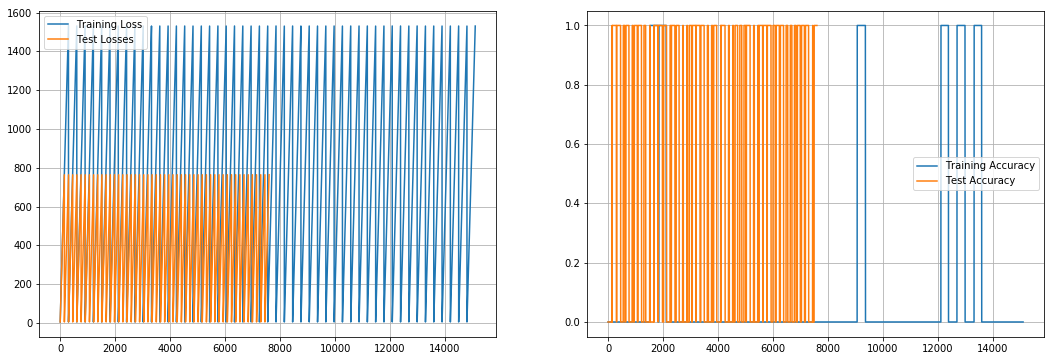

In [15]:
plot_logs_classification(lenet_mnist_logs)

In [16]:
import numpy as np
def test_model_classification(model, test_loader = barilla_test_loader):
    softmax = nn.Softmax(dim=1)
    model.eval()
    preds = []
    gts = []
    for batch in test_loader:
        x=Variable(batch["image"])
        #applichiamo la funzione softmax per avere delle probabilità
        if torch.cuda.is_available():
            x = x.cuda()
        pred = softmax(model(x)).data.cpu().numpy().copy()
        gt = batch["label"].cpu().numpy().copy()
        #print("Pred-->", pred, ", gt-->", gt)
        preds.append(pred)
        gts.append(gt)
        #print(len(preds), len(gts))
    return np.concatenate(preds),np.concatenate(gts)

In [17]:
lenet_mnist_predictions, lenet_mnist_gt = test_model_classification(net)
print ("Accuracy LeNet su DIGITS: %0.2f" % \
accuracy_score(lenet_mnist_gt,lenet_mnist_predictions.argmax(1)))

Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Front.png
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Left.png
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Front.png
Mentre creo il tutto, label vale--> 7 , name vale --> Mealsolution_Barilla_Cereali_Farro_Front.png
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Left.png
Mentre creo il tutto, label vale-->

Mentre creo il tutto, label vale--> 66 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Risoni26500g_Left.png
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Left.png
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Front.png
Mentre creo il tutto, label vale--> 69 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti51kg_Front.png
Mentre creo il tutto, label vale--> 70 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghetti5500g_Left.png
Mentre creo il tutto, label vale--> 71 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini31kg_Left.png
Mentre creo il tutto, label vale--> 72 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettini3500g_Front.png
Mentre creo il tutto, label vale--> 73 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Spaghettoni71Kg_Left.png
Mentr

Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Front.png
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Front.png
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Front.png
Mentre creo il tutto, label vale--> 135 , name vale --> Mealsolution_Voiello_PastaBase_Mezzepennerigate154_Left.png
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Front.png
Mentre creo il tutto, label vale--> 137 , name vale --> Mealsolution_Voiello_PastaBase_Pennelisce153_Front.png
Mentre creo il tutto, label vale--> 138 , name vale --> Mealsolution_Voiello_PastaBase_Penne

In [140]:
#Creazione feature dataset di training e test set
def GetInputForDataframe(dataset, net):
    feature_dataset = []
    net=net.cpu()
    for i, dataset_train in enumerate(dataset):
        print(i, "-->",dataset_train['image'].shape, dataset_train['label'])
        print(dataset_train['label'])
        x=Variable(dataset_train['image'], requires_grad=False)
        y=Variable(dataset_train['label'])
        x, y = x.cpu(), y.cpu()
        if torch.cuda.is_available():
            x, y = x.cuda(), y.cuda()
            #print("Con cuda")
        output = net(x, False)
        feature_dataset.append({"label": dataset_train['label'], "feature":output, "name": dataset_train['name']})

    #Trasformiamo il tensor in una matrice
    print(len(feature_dataset), len(feature_dataset[0]))
    feature_dataset_matrix = np.zeros((len(feature_dataset), len(feature_dataset[0]["feature"][0])))
    print(len(feature_dataset), len(feature_dataset[0]["feature"][0]))
    print(feature_dataset[0]["label"][0])
    print(feature_dataset[1]["label"][0])

    label_array = np.zeros(len(feature_dataset))
    for i in range(0, len(feature_dataset)):#302
        for j in range(0, len(feature_dataset[0]["feature"][0])):#9206
            if j == 0:#salviamo la y finale nella colonna 0 della riga x.
                #feature_dataset_matrix[j][i] = feature_dataset[j]['label'][0]
                label_array[i] = feature_dataset[i]['label'][0]
                print(i, end= " ")
            #else:
            #print( i, j, end=" ")
            feature_dataset_matrix[i][j] =feature_dataset[i]["feature"][0][j] 

    print(len(feature_dataset_matrix), len(feature_dataset_matrix[0]), len(label_array))
    print(feature_dataset[0]["feature"][0])
    return feature_dataset_matrix, labe

In [141]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_1 = KNN(n_neighbors=1)


input_for_datafram_train, label_array_train = GetInputForDataframe(barilla_train_loader, net)

df = pd.DataFrame(input_for_datafram_train)
#print(label_array[0], df.drop(0, axis = 1))
knn_1.fit(df, label_array_train)
#Prendiamo le feature di una riga di test:
feature_train = []
for i, dataset_test in enumerate(barilla_test_loader):
    #if i == 129:
    #print(dataset_test['label'])
    x=Variable(dataset_test['image'], requires_grad=False)
    y=Variable(dataset_test['label'])
    if torch.cuda.is_available():
        x, y = x.cuda(), y.cuda()
        #print("Con cuda")
    feature_train = net(x, False)
    feature_train.append(net(x, False)[0])
#Proviamo la predizione


Ho invocato len, vale--> 302
Mentre creo il tutto, label vale--> 136 , name vale --> Mealsolution_Voiello_PastaBase_Pastamista126_Right.png
0 --> torch.Size([1, 3, 256, 256]) tensor([136])
tensor([136])
Mentre creo il tutto, label vale--> 92 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipiperigate500g_Front.png
1 --> torch.Size([1, 3, 256, 256]) tensor([92])
tensor([92])
Mentre creo il tutto, label vale--> 108 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Tagliatelle500g_Front.png
2 --> torch.Size([1, 3, 256, 256]) tensor([108])
tensor([108])
Mentre creo il tutto, label vale--> 127 , name vale --> Mealsolution_Foodservice_Ambient_Pasta_emiliane_chef_Lasagneall'uovo500g_Right.png
3 --> torch.Size([1, 3, 256, 256]) tensor([127])
tensor([127])
Mentre creo il tutto, label vale--> 76 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Tempesta29500g_Front.png
4 --> torch.Size([1, 3, 256, 256]) tensor([76])
tensor([76])
Mentre creo il tut

Mentre creo il tutto, label vale--> 6 , name vale --> Mealsolution_Barilla_Cereali_Couscous500g_Left.png
44 --> torch.Size([1, 3, 256, 256]) tensor([6])
tensor([6])
Mentre creo il tutto, label vale--> 121 , name vale --> Mealsolution_Barilla_Sughi_Pestatopomodorisecchi_Right.png
45 --> torch.Size([1, 3, 256, 256]) tensor([121])
tensor([121])
Mentre creo il tutto, label vale--> 38 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Casarecce287500g_Right.png
46 --> torch.Size([1, 3, 256, 256]) tensor([38])
tensor([38])
Mentre creo il tutto, label vale--> 31 , name vale --> Mealsolution_Barilla_Pastadisemola_Pasta5Cereali_Fusilli5cereali_Front.png
47 --> torch.Size([1, 3, 256, 256]) tensor([31])
tensor([31])
Mentre creo il tutto, label vale--> 67 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati941kg_Front.png
48 --> torch.Size([1, 3, 256, 256]) tensor([67])
tensor([67])
Mentre creo il tutto, label vale--> 114 , name vale --> Mealsolution_Barilla_senza_glut

Mentre creo il tutto, label vale--> 60 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Pennetterigate72500g_Right.png
88 --> torch.Size([1, 3, 256, 256]) tensor([60])
tensor([60])
Mentre creo il tutto, label vale--> 68 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Sedanirigati94500g_Right.png
89 --> torch.Size([1, 3, 256, 256]) tensor([68])
tensor([68])
Mentre creo il tutto, label vale--> 64 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Puntine23500g_Front.png
90 --> torch.Size([1, 3, 256, 256]) tensor([64])
tensor([64])
Mentre creo il tutto, label vale--> 23 , name vale --> Mealsolution_Barilla_Pastaall'uovo_PASTAUOVO5CEREALI_EmilianeFettuccine5Cereali250g(2)_Right.png
91 --> torch.Size([1, 3, 256, 256]) tensor([23])
tensor([23])
Mentre creo il tutto, label vale--> 18 , name vale --> Mealsolution_Barilla_Legumi_Fusillidilenticchierosse250g_Right.png
92 --> torch.Size([1, 3, 256, 256]) tensor([18])
tensor([18])
Mentre creo il tutto, label vale-->

Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Right.png
131 --> torch.Size([1, 3, 256, 256]) tensor([9])
tensor([9])
Mentre creo il tutto, label vale--> 8 , name vale --> Mealsolution_Barilla_Cereali_Orzo_Front.png
132 --> torch.Size([1, 3, 256, 256]) tensor([8])
tensor([8])
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Right.png
133 --> torch.Size([1, 3, 256, 256]) tensor([5])
tensor([5])
Mentre creo il tutto, label vale--> 151 , name vale --> Mealsolution_Voiello_PastaspecialitÃ _Ziti_Right.png
134 --> torch.Size([1, 3, 256, 256]) tensor([151])
tensor([151])
Mentre creo il tutto, label vale--> 9 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Farina0manitoba1000g_Front.png
135 --> torch.Size([1, 3, 256, 256]) tensor([9])
tensor([9])
Mentre creo il tutto, label vale--> 19 , name vale --> Mealsolution_Barilla_Legumi_Legumottilenticchiececi300g_Right.png
136 --> 

Mentre creo il tutto, label vale--> 111 , name vale --> Mealsolution_Barilla_senza_glutine_SGbavettelinguine400g_Front.png
174 --> torch.Size([1, 3, 256, 256]) tensor([111])
tensor([111])
Mentre creo il tutto, label vale--> 119 , name vale --> Mealsolution_Barilla_senza_glutine_SGtortiglioni400g_Left.png
175 --> torch.Size([1, 3, 256, 256]) tensor([119])
tensor([119])
Mentre creo il tutto, label vale--> 81 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Casarecceint_Left.png
176 --> torch.Size([1, 3, 256, 256]) tensor([81])
tensor([81])
Mentre creo il tutto, label vale--> 109 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Trofie500g_Front.png
177 --> torch.Size([1, 3, 256, 256]) tensor([109])
tensor([109])
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Right.png
178 --> torch.Size([1, 3, 256, 256]) tensor([48])
tensor([48])
Mentre creo il tutto, label vale--> 125 , name vale --> Mea

tensor([84])
Mentre creo il tutto, label vale--> 118 , name vale --> Mealsolution_Barilla_senza_glutine_SGtagliatelle300g_Right.png
218 --> torch.Size([1, 3, 256, 256]) tensor([118])
tensor([118])
Mentre creo il tutto, label vale--> 98 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaspecialpack_Tortiglioni831kgconvenienza_Right.png
219 --> torch.Size([1, 3, 256, 256]) tensor([98])
tensor([98])
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Right.png
220 --> torch.Size([1, 3, 256, 256]) tensor([130])
tensor([130])
Mentre creo il tutto, label vale--> 52 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Mezzepennerigate701kg_Front.png
221 --> torch.Size([1, 3, 256, 256]) tensor([52])
tensor([52])
Mentre creo il tutto, label vale--> 105 , name vale --> Mealsolution_Barilla_Pastadisemola_PastaspecialitÃ _Ruote500g_Right.png
222 --> torch.Size([1, 3, 256, 256]) tensor([105])
tensor([105])
Mentre creo il tutto, label vale-->

Mentre creo il tutto, label vale--> 141 , name vale --> Mealsolution_Voiello_PastaBase_Rigatoni124_Right.png
261 --> torch.Size([1, 3, 256, 256]) tensor([141])
tensor([141])
Mentre creo il tutto, label vale--> 29 , name vale --> Mealsolution_Barilla_Pastaall'uovoripiena_Tortellonicrudoparmigiano250g_Left.png
262 --> torch.Size([1, 3, 256, 256]) tensor([29])
tensor([29])
Mentre creo il tutto, label vale--> 145 , name vale --> Mealsolution_Voiello_PastaBase_Tortiglioni125_Front.png
263 --> torch.Size([1, 3, 256, 256]) tensor([145])
tensor([145])
Mentre creo il tutto, label vale--> 16 , name vale --> Mealsolution_Barilla_Farinasemolapizza_Semolarimacinata1000g_Right.png
264 --> torch.Size([1, 3, 256, 256]) tensor([16])
tensor([16])
Mentre creo il tutto, label vale--> 124 , name vale --> Mealsolution_Barilla_Sughi_Ragufunghi180gx2cluster_Front.png
265 --> torch.Size([1, 3, 256, 256]) tensor([124])
tensor([124])
Mentre creo il tutto, label vale--> 147 , name vale --> Mealsolution_Voiello_Pa

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

NameError: name 'labe' is not defined

In [115]:

z = knn_1.predict(feature_test_0.cpu().detach().numpy().reshape(1, -1))
print(len(df.drop(0, axis = 1)), len(df[0]))
print(z)
print(z[0])

9216
302 302
[84.]
84.0


In [138]:
#NB: Guardare per bene i nomi, probabilmente c'è qualche errore e decommentare nei vari posti il torch.cuda.is_available.

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_1 = KNN(n_neighbors=1)
input_for_datafram_test, label_array_input = GetInputForDataframe(barilla_test_loader, net)
df = pd.DataFrame(input_for_datafram_test)
#print(label_array[0], df.drop(0, axis = 1))
knn_1.fit(df, label_array)
#Prendiamo le feature di una riga di test:
feature_test = []
for i, dataset_test in enumerate(barilla_test_loader):
    #if i == 129:
    #print(dataset_test['label'])
    x=Variable(dataset_test['image'], requires_grad=False)
    y=Variable(dataset_test['label'])
    #if torch.cuda.is_available():
        #x, y = x.cuda(), y.cuda()
        #print("Con cuda")
    feature_test_0 = net(x, False)
    feature_test.append(net(x, False)[0])
#Proviamo la predizione


Ho invocato len, vale--> 152
Mentre creo il tutto, label vale--> 0 , name vale --> Mealsolution_Barilla_Bio_Farinabiotipo21000g_Front.png
0 --> torch.Size([1, 3, 256, 256]) tensor([0])
tensor([0])
Mentre creo il tutto, label vale--> 1 , name vale --> Mealsolution_Barilla_Bio_Fusillibio500g_Front.png
1 --> torch.Size([1, 3, 256, 256]) tensor([1])
tensor([1])
Mentre creo il tutto, label vale--> 2 , name vale --> Mealsolution_Barilla_Bio_Pennerigatebio500g_Left.png
2 --> torch.Size([1, 3, 256, 256]) tensor([2])
tensor([2])
Mentre creo il tutto, label vale--> 3 , name vale --> Mealsolution_Barilla_Bio_Spaghetti5bio500g_Front.png
3 --> torch.Size([1, 3, 256, 256]) tensor([3])
tensor([3])
Mentre creo il tutto, label vale--> 4 , name vale --> Mealsolution_Barilla_Cereali_5cereali_Left.png
4 --> torch.Size([1, 3, 256, 256]) tensor([4])
tensor([4])
Mentre creo il tutto, label vale--> 5 , name vale --> Mealsolution_Barilla_Cereali_Cerealiquinoa_Left.png
5 --> torch.Size([1, 3, 256, 256]) tensor(

Mentre creo il tutto, label vale--> 44 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalle265500g_Front.png
44 --> torch.Size([1, 3, 256, 256]) tensor([44])
tensor([44])
Mentre creo il tutto, label vale--> 45 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Farfalline59500g_Front.png
45 --> torch.Size([1, 3, 256, 256]) tensor([45])
tensor([45])
Mentre creo il tutto, label vale--> 46 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli981kg_Front.png
46 --> torch.Size([1, 3, 256, 256]) tensor([46])
tensor([46])
Mentre creo il tutto, label vale--> 47 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Fusilli98500g_Front.png
47 --> torch.Size([1, 3, 256, 256]) tensor([47])
tensor([47])
Mentre creo il tutto, label vale--> 48 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastabox_Gnocchi85500g_Left.png
48 --> torch.Size([1, 3, 256, 256]) tensor([48])
tensor([48])
Mentre creo il tutto, label vale--> 49 , name vale --> Mealsolution_Bari

Mentre creo il tutto, label vale--> 87 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Spaghettiniint_Front.png
87 --> torch.Size([1, 3, 256, 256]) tensor([87])
tensor([87])
Mentre creo il tutto, label vale--> 88 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastaintegrale_Tortiglioniint_Left.png
88 --> torch.Size([1, 3, 256, 256]) tensor([88])
tensor([88])
Mentre creo il tutto, label vale--> 89 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifarfalle500g_Left.png
89 --> torch.Size([1, 3, 256, 256]) tensor([89])
tensor([89])
Mentre creo il tutto, label vale--> 90 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minifusilli500g_Front.png
90 --> torch.Size([1, 3, 256, 256]) tensor([90])
tensor([90])
Mentre creo il tutto, label vale--> 91 , name vale --> Mealsolution_Barilla_Pastadisemola_Pastapiccolini_Minipennerigate500g_Front.png
91 --> torch.Size([1, 3, 256, 256]) tensor([91])
tensor([91])
Mentre creo il tutto, label vale--

129 --> torch.Size([1, 3, 256, 256]) tensor([129])
tensor([129])
Mentre creo il tutto, label vale--> 130 , name vale --> Mealsolution_Voiello_PastaBase_Fusilli141_Front.png
130 --> torch.Size([1, 3, 256, 256]) tensor([130])
tensor([130])
Mentre creo il tutto, label vale--> 131 , name vale --> Mealsolution_Voiello_PastaBase_Fusillibucaticorti145_Left.png
131 --> torch.Size([1, 3, 256, 256]) tensor([131])
tensor([131])
Mentre creo il tutto, label vale--> 132 , name vale --> Mealsolution_Voiello_PastaBase_Granfusilli180_Front.png
132 --> torch.Size([1, 3, 256, 256]) tensor([132])
tensor([132])
Mentre creo il tutto, label vale--> 133 , name vale --> Mealsolution_Voiello_PastaBase_Mafaldecorte140_Front.png
133 --> torch.Size([1, 3, 256, 256]) tensor([133])
tensor([133])
Mentre creo il tutto, label vale--> 134 , name vale --> Mealsolution_Voiello_PastaBase_Mezzemanicherigate122_Front.png
134 --> torch.Size([1, 3, 256, 256]) tensor([134])
tensor([134])
Mentre creo il tutto, label vale--> 135 

ValueError: Found input variables with inconsistent numbers of samples: [152, 302]

In [121]:
print("Accuracy sul training set: %0.2f" % knn_1.score(df, label_array))
print("Accuracy sul test set: %0.2f" % knn_1.score(data_test.drop('C',axis=1), data_test.C))

Accuracy sul training set: 1.00


In [ ]:
from sklearn.metrics import accuracy_score
from torch.optim import SGD
from torch.autograd import Variable
#Questa è la funzione per i dataset classici.
def train_classification_special(model, lr=0.01, epochs=20, momentum=0.9, \
    train_loader=mnist_train_loader, test_loader=mnist_test_loader):
    criterion = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(),lr, momentum=momentum)
    loaders = {'train':train_loader, 'test':test_loader}
    losses = {'train':[], 'test':[]}
    accuracies = {'train':[], 'test':[]}
    if torch.cuda.is_available():
        model=model.cuda()
    for e in range(epochs):
        print("Primo ciclo for.")
        for mode in ['train', 'test']:
            print("Secondo ciclo for.")
            if mode=='train':
                model.train()
            else:
                model.eval()
            epoch_loss = 0
            epoch_acc = 0
            samples = 0
            print("Mode-->",mode)
            print("Enumerate-->", loaders[mode])
            for i, batch in enumerate(loaders[mode]):
                #trasformiamo i tensori in variabili
                x=Variable(batch[0], requires_grad=(mode=='train'))
                #print("x shape-->",x.shape)
                y=Variable(batch[1])
                if torch.cuda.is_available():
                    x, y = x.cuda(), y.cuda()
                output = model(x)
                l = criterion(output,y)
                if mode=='train':
                    l.backward()
                    optimizer.step()
                    optimizer.zero_grad()
                print("L-->",l.item())
                acc = accuracy_score(y.cpu().data,output.cpu().max(1)[1].data)
                epoch_loss+=l.data.item()*x.shape[0]
                epoch_acc+=acc*x.shape[0]
                samples+=x.shape[0]
                print ("\r[%s] Epoch %d/%d. Iteration %d/%d. Loss: %0.2f. Accuracy: %0.2f\t\t\t\t\t" % \
                (mode, e+1, epochs, i, len(loaders[mode]), epoch_loss/samples, epoch_acc/samples),
                epoch_loss/samples,
                epoch_acc/samples,
                losses[mode].append(epoch_loss))
                accuracies[mode].append(epoch_acc)
            print("Fine secondo ciclo for")
        print("\r[%s] Epoch %d/%d. Iteration %d/%d. Loss: %0.2f. Accuracy: %0.2f\t\t\t\t\t" % \
        (mode, e+1, epochs, i, len(loaders[mode]), epoch_loss, epoch_acc))

    print("Ho finito.")
    #restituiamo il modello e i vari log
    return model, (losses, accuracies)

In [ ]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Created by: BoyuanJiang
# College of Information Science & Electronic Engineering,ZheJiang University
# Email: ginger188@gmail.com
# Copyright (c) 2017

# @Time    :17-8-27 21:25
# @FILE    :matching_networks.py
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

import torch
import torch.nn as nn
import math
import numpy as np
import torch.nn.functional as F
from torch.autograd import Variable


def convLayer(in_channels, out_channels, keep_prob=0.0):
    """3*3 convolution with padding,ever time call it the output size become half"""
    cnn_seq = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, 1, 1),
        nn.ReLU(True),
        nn.BatchNorm2d(out_channels),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(keep_prob)
    )
    return cnn_seq


class Classifier(nn.Module):
    def __init__(self, layer_size=64, num_channels=1, keep_prob=1.0, image_size=28):
        super(Classifier, self).__init__()
        """
        Build a CNN to produce embeddings
        :param layer_size:64(default)
        :param num_channels:
        :param keep_prob:
        :param image_size:
        """
        self.layer1 = convLayer(num_channels, layer_size, keep_prob)
        self.layer2 = convLayer(layer_size, layer_size, keep_prob)
        self.layer3 = convLayer(layer_size, layer_size, keep_prob)
        self.layer4 = convLayer(layer_size, layer_size, keep_prob)

        finalSize = int(math.floor(image_size / (2 * 2 * 2 * 2)))
        self.outSize = finalSize * finalSize * layer_size

    def forward(self, image_input):
        """
        Use CNN defined above
        :param image_input:
        :return:
        """
        x = self.layer1(image_input)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = x.view(x.size()[0], -1)
        return x


class AttentionalClassify(nn.Module):
    def __init__(self):
        super(AttentionalClassify, self).__init__()

    def forward(self, similarities, support_set_y):
        """
        Products pdfs over the support set classes for the target set image.
        :param similarities: A tensor with cosine similarites of size[batch_size,sequence_length]
        :param support_set_y:[batch_size,sequence_length,classes_num]
        :return: Softmax pdf shape[batch_size,classes_num]
        """
        softmax = nn.Softmax()
        softmax_similarities = softmax(similarities)
        preds = softmax_similarities.unsqueeze(1).bmm(support_set_y).squeeze()
        return preds


class DistanceNetwork(nn.Module):
    """
    This model calculates the cosine distance between each of the support set embeddings and the target image embeddings.
    """

    def __init__(self):
        super(DistanceNetwork, self).__init__()

    def forward(self, support_set, input_image):
        """
        forward implement
        :param support_set:the embeddings of the support set images.shape[sequence_length,batch_size,64]
        :param input_image: the embedding of the target image,shape[batch_size,64]
        :return:shape[batch_size,sequence_length]
        """
        eps = 1e-10
        similarities = []
        for support_image in support_set:
            sum_support = torch.sum(torch.pow(support_image, 2), 1)
            support_manitude = sum_support.clamp(eps, float("inf")).rsqrt()
            dot_product = input_image.unsqueeze(1).bmm(support_image.unsqueeze(2)).squeeze()
            cosine_similarity = dot_product * support_manitude
            similarities.append(cosine_similarity)
        similarities = torch.stack(similarities)
        return similarities.t()


class BidirectionalLSTM(nn.Module):
    def __init__(self, layer_size, batch_size, vector_dim,use_cuda):
        super(BidirectionalLSTM, self).__init__()
        """
        Initial a muti-layer Bidirectional LSTM
        :param layer_size: a list of each layer'size
        :param batch_size: 
        :param vector_dim: 
        """
        self.batch_size = batch_size
        self.hidden_size = layer_size[0]
        self.vector_dim = vector_dim
        self.num_layer = len(layer_size)
        self.use_cuda = use_cuda
        self.lstm = nn.LSTM(input_size=self.vector_dim, num_layers=self.num_layer, hidden_size=self.hidden_size,
                            bidirectional=True)
        self.hidden = self.init_hidden(self.use_cuda)

    def init_hidden(self,use_cuda):
        if use_cuda:
            return (Variable(torch.zeros(self.lstm.num_layers * 2, self.batch_size, self.lstm.hidden_size),requires_grad=False).cuda(),
                    Variable(torch.zeros(self.lstm.num_layers * 2, self.batch_size, self.lstm.hidden_size),requires_grad=False).cuda())
        else:
            return (Variable(torch.zeros(self.lstm.num_layers * 2, self.batch_size, self.lstm.hidden_size),requires_grad=False),
                    Variable(torch.zeros(self.lstm.num_layers * 2, self.batch_size, self.lstm.hidden_size),requires_grad=False))

    def repackage_hidden(self,h):
        """Wraps hidden states in new Variables, to detach them from their history."""
        if type(h) == Variable:
            return Variable(h.data)
        else:
            return tuple(self.repackage_hidden(v) for v in h)

    def forward(self, inputs):
        # self.hidden = self.init_hidden(self.use_cuda)
        self.hidden = self.repackage_hidden(self.hidden)
        output, self.hidden = self.lstm(inputs, self.hidden)
        return output


class MatchingNetwork(nn.Module):
    def __init__(self, keep_prob=0.0, batch_size=32, num_channels=1, learning_rate=1e-3, fce=False, num_classes_per_set=20, \
                 num_samples_per_class=1, image_size=28, use_cuda=True):
        """
        This is our main network
        :param keep_prob: dropout rate
        :param batch_size:
        :param num_channels:
        :param learning_rate:
        :param fce: Flag indicating whether to use full context embeddings(i.e. apply an LSTM on the CNN embeddings)
        :param num_classes_per_set:
        :param num_samples_per_class:
        :param image_size:
        """
        super(MatchingNetwork, self).__init__()
        self.batch_size = batch_size
        self.keep_prob = keep_prob
        self.num_channels = num_channels
        self.learning_rate = learning_rate
        self.fce = fce
        self.num_classes_per_set = num_classes_per_set
        self.num_samples_per_class = num_samples_per_class
        self.image_size = image_size
        self.g = Classifier(layer_size=64, num_channels=num_channels, keep_prob=keep_prob, image_size=image_size)
        self.dn = DistanceNetwork()
        self.classify = AttentionalClassify()
        if self.fce:
            self.lstm = BidirectionalLSTM(layer_size=[32], batch_size=self.batch_size, vector_dim=self.g.outSize,use_cuda=use_cuda)

    def forward(self, support_set_images, support_set_y_one_hot, target_image, target_y):
        """
        Main process of the network
        :param support_set_images: shape[batch_size,sequence_length,num_channels,image_size,image_size]
        :param support_set_y_one_hot: shape[batch_size,sequence_length,num_classes_per_set]
        :param target_image: shape[batch_size,num_channels,image_size,image_size]
        :param target_y:
        :return:
        """
        # produce embeddings for support set images
        encoded_images = []
        for i in np.arange(support_set_images.size(1)):
            gen_encode = self.g(support_set_images[:, i, :, :])
            encoded_images.append(gen_encode)

        # produce embeddings for target images
        gen_encode = self.g(target_image)
        encoded_images.append(gen_encode)
        output = torch.stack(encoded_images)

        # use fce?
        if self.fce:
            outputs = self.lstm(output)

        # get similarities between support set embeddings and target
        similarites = self.dn(support_set=output[:-1], input_image=output[-1])

        # produce predictions for target probabilities
        preds = self.classify(similarites, support_set_y=support_set_y_one_hot)

        # calculate the accuracy
        values, indices = preds.max(1)
        accuracy = torch.mean((indices.squeeze() == target_y).float())
        crossentropy_loss = F.cross_entropy(preds, target_y.long())

        return accuracy, crossentropy_loss


In [ ]:
matching_network = MatchingNetwork()
lenet_mnist_predictions, lenet_mnist_gt = train_classification(matching_network)
print ("Accuracy LeNet su DIGITS: %0.2f" % \
accuracy_score(lenet_mnist_gt,lenet_mnist_predictions.argmax(1)))